In [1]:
import pickle
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [32]:
# Controls appearance of seaborn plots. Options: paper, notebook, talk, or poster
SEABORN_CONTEXT = 'talk' 
SEABORN_PALETTE = sns.color_palette("bright")

sns.set_context(SEABORN_CONTEXT)

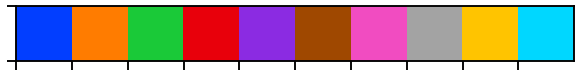

In [33]:
sns.palplot(SEABORN_PALETTE)

In [34]:
df_population = pd.read_csv('PEP_2018_PEPANNRES_with_ann.csv', encoding='latin1')
df_population = df_population.groupby('State', as_index=False)['Population'].sum()
df_population = df_population.rename(columns={"State": "state", "Population": "population"})
df_population['state'] = df_population['state'].apply(lambda state: state.strip())
df_population

state  population
0                Alabama     4887871
1                 Alaska      737438
2                Arizona     7171646
3               Arkansas     3013825
4             California    39557045
5               Colorado     5695564
6            Connecticut     3572665
7               Delaware      967171
8   District of Columbia      702455
9                Florida    21299325
10               Georgia    10519475
11                Hawaii     1420491
12                 Idaho     1754208
13              Illinois    12741080
14               Indiana     6691878
15                  Iowa     3156145
16                Kansas     2911505
17              Kentucky     4468402
18             Louisiana     4659978
19                 Maine     1338404
20              Maryland     6042718
21         Massachusetts     6902149
22              Michigan     9995915
23             Minnesota     5611179
24           Mississippi     2986530
25              Missouri     6126452
26               Montana     1062305
27              Nebraska     1929268
28                Nevada     3034392
29         New Hampshire     1356458
30            New Jersey     8908520
31            New Mexico     2095428
32              New York    19542209
33        North Carolina    10383620
34          North Dakota      760077
35                  Ohio    11689442
36              Oklahoma     3943079
37                Oregon     4190713
38          Pennsylvania    12807060
39          Rhode Island     1057315
40        South Carolina     5084127
41          South Dakota      882235
42             Tennessee     6770010
43                 Texas    28701845
44                  Utah     3161105
45               Vermont      626299
46              Virginia     8330345
47            Washington     7535591
48         West Virginia     1805832
49             Wisconsin     5813568
50               Wyoming      577737

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df = df.loc[df['fips'].notnull()]
df['fips'] = df['fips'].astype(int)
df


date      county       state   fips  cases  deaths
0      2020-01-21   Snohomish  Washington  53061      1       0
1      2020-01-22   Snohomish  Washington  53061      1       0
2      2020-01-23   Snohomish  Washington  53061      1       0
3      2020-01-24        Cook    Illinois  17031      1       0
4      2020-01-24   Snohomish  Washington  53061      1       0
...           ...         ...         ...    ...    ...     ...
21794  2020-03-30    Sheridan     Wyoming  56033      8       0
21795  2020-03-30    Sublette     Wyoming  56035      1       0
21796  2020-03-30  Sweetwater     Wyoming  56037      2       0
21797  2020-03-30       Teton     Wyoming  56039     17       0
21798  2020-03-30    Washakie     Wyoming  56043      1       0

[21464 rows x 6 columns]

In [36]:
most_recent_date = df['date'].sort_values().unique()[-1]
most_recent_date

'2020-03-30'

In [37]:
df = df.loc[df['date'] == most_recent_date].sort_values('cases', ascending=False).head(60)
df

date                county                 state   fips  cases  \
20977  2020-03-30           Westchester              New York  36119   9326   
20950  2020-03-30                Nassau              New York  36059   7344   
20969  2020-03-30               Suffolk              New York  36103   5791   
20180  2020-03-30                  Cook              Illinois  17031   3727   
20632  2020-03-30                 Wayne              Michigan  26163   3195   
20962  2020-03-30              Rockland              New York  36087   2511   
20884  2020-03-30                Bergen            New Jersey  34003   2482   
19860  2020-03-30           Los Angeles            California   6037   2474   
21691  2020-03-30                  King            Washington  53033   2332   
19988  2020-03-30            Miami-Dade               Florida  12086   1700   
20889  2020-03-30                 Essex            New Jersey  34013   1564   
20493  2020-03-30               Orleans             Louisiana  22071   1480   
19944  2020-03-30             Fairfield           Connecticut   9001   1445   
20956  2020-03-30                Orange              New York  36071   1435   
20616  2020-03-30               Oakland              Michigan  26125   1391   
20891  2020-03-30                Hudson            New Jersey  34017   1314   
20902  2020-03-30                 Union            New Jersey  34039   1213   
20563  2020-03-30             Middlesex         Massachusetts  25017   1141   
19962  2020-03-30               Broward               Florida  12011   1137   
21703  2020-03-30             Snohomish            Washington  53061   1126   
20894  2020-03-30             Middlesex            New Jersey  34023   1123   
20567  2020-03-30               Suffolk         Massachusetts  25025   1115   
20898  2020-03-30               Passaic            New Jersey  34031   1091   
21260  2020-03-30          Philadelphia          Pennsylvania  42101   1072   
20895  2020-03-30              Monmouth            New Jersey  34025   1030   
20897  2020-03-30                 Ocean            New Jersey  34029    874   
19881  2020-03-30           Santa Clara            California   6085    848   
20483  2020-03-30             Jefferson             Louisiana  22051    838   
20267  2020-03-30                Marion               Indiana  18097    804   
20866  2020-03-30                 Clark                Nevada  32003    753   
20606  2020-03-30                Macomb              Michigan  26099    728   
20896  2020-03-30                Morris            New Jersey  34027    720   
19785  2020-03-30              Maricopa               Arizona   4013    690   
21763  2020-03-30             Milwaukee             Wisconsin  55079    663   
20559  2020-03-30                 Essex         Massachusetts  25009    653   
20565  2020-03-30               Norfolk         Massachusetts  25021    628   
19875  2020-03-30             San Diego            California   6073    603   
21483  2020-03-30                Harris                 Texas  48201    563   
21459  2020-03-30                Dallas                 Texas  48113    549   
21255  2020-03-30            Montgomery          Pennsylvania  42091    540   
20063  2020-03-30                Fulton               Georgia  13121    503   
19956  2020-03-30  District of Columbia  District of Columbia  11001    495   
21091  2020-03-30              Cuyahoga                  Ohio  39035    493   
19907  2020-03-30                Denver              Colorado   8031    465   
19869  2020-03-30                Orange            California   6059    464   
19994  2020-03-30            Palm Beach               Florida  12099    462   
21370  2020-03-30              Davidson             Tennessee  47037    443   
20936  2020-03-30                  Erie              New York  36029    443   
21416  2020-03-30                Shelby             Tennessee  47157    396   
20935  2020-03-30              Dutchess              New York  

In [38]:
# df_hospitals.loc[df_hospitals['fips'] == 'NOT AVAILABLE']

In [39]:
df_hospitals = pd.read_csv('us-hospitals.csv')
df_hospitals = df_hospitals.rename(columns={"COUNTYFIPS": "fips", "STATE": "state", "BEDS": "beds"})
df_hospitals = df_hospitals.loc[(df_hospitals.beds != -999) & (df_hospitals['fips'] != 'NOT AVAILABLE')]
df_hospitals['fips'] = df_hospitals['fips'].astype(int)
df_hospitals

X          Y  OBJECTID        ID  \
0     -83.387732  39.348667      3001  12645123   
1     -81.919907  40.565095      3002  17244654   
2     -82.450635  40.048302      3003   2543055   
3     -83.755531  40.369542      3004   5843311   
4     -82.224713  41.295065      3005   5544074   
...          ...        ...       ...       ...   
7570  -89.634245  44.931130      7571   6254403   
7571  -87.954473  42.859866      7572   6653132   
7572 -117.566294  34.103714      7573  24091730   
7573 -117.071712  32.617494      7574  34491911   
7574 -122.405762  37.756576      7575  39094110   

                                                   NAME  \
0                       ADENA GREENFIELD MEDICAL CENTER   
1                                     POMERENE HOSPITAL   
2                             LICKING MEMORIAL HOSPITAL   
3                                   MARY RUTAN HOSPITAL   
4                                  MERCY ALLEN HOSPITAL   
...                                                 ...   
7570                          NORTH CENTRAL HEALTH CARE   
7571          MIDWEST ORTHOPEDIC SPECIALTY HOSPITAL LLC   
7572                            KINDRED HOSPITAL RANCHO   
7573       PARADISE VALLEY HSP D/P APH BAYVIEW BEH HLTH   
7574  PRISCILLA CHAN & MARK ZUCKERBERG SAN FRANCISCO...   

                      ADDRESS              CITY state    ZIP           ZIP4  \
0         550 MIRABEAU STREET        GREENFIELD    OH  45123  NOT AVAILABLE   
1            981 WOOSTER ROAD       MILLERSBURG    OH  44654  NOT AVAILABLE   
2       1320 WEST MAIN STREET            NEWARK    OH  43055  NOT AVAILABLE   
3           205 PALMER AVENUE     BELLEFONTAINE    OH  43311  NOT AVAILABLE   
4      200 WEST LORAIN STREET           OBERLIN    OH  44074  NOT AVAILABLE   
...                       ...               ...   ...    ...            ...   
7570         1100 LAKEVIEW DR            WAUSAU    WI  54403  NOT AVAILABLE   
7571  10101 SOUTH 27TH STREET          FRANKLIN    WI  53132  NOT AVAILABLE   
7572   10841 WHITE OAK AVENUE  RANCHO CUCAMONGA    CA  91730  NOT AVAILABLE   
7573          330 MOSS STREET       CHULA VISTA    CA  91911  NOT AVAILABLE   
7574      1001 POTRERO AVENUE     SAN FRANCISCO    CA  94110  NOT AVAILABLE   

      ...                  VAL_DATE  \
0     ...  2014-02-10T00:00:00.000Z   
1     ...  2014-01-31T00:00:00.000Z   
2     ...  2014-02-10T00:00:00.000Z   
3     ...  2014-02-10T00:00:00.000Z   
4     ...  2014-02-10T00:00:00.000Z   
...   ...                       ...   
7570  ...  2014-02-10T00:00:00.000Z   
7571  ...  2014-01-13T00:00:00.000Z   
7572  ...  2014-02-10T00:00:00.000Z   
7573  ...  2014-02-10T00:00:00.000Z   
7574  ...  2014-02-10T00:00:00.000Z   

                                                WEBSITE       STATE_ID  \
0     http://www.adena.org/locations/detail.dT/adena...           1200   
1                       http://www.pomerenehospital.org           1202   
2                               http://www.lmhealth.org           1213   
3                              http://www.maryrutan.org           1214   
4     http://www.mercyonline.org/mercy_allen_hospita...           1219   
...                                                 ...            ...   
7570                              http://www.norcen.org            206   
7571                             http://www.mymosh.com/           1070   
7572                            http://www.khrancho.com  NOT AVAILABLE   
7573                                      NOT AVAILABLE  NOT AVAILABLE   
7574                             https://sfgh.ucsf.edu/  NOT AVAILABLE   

                            ALT_NAME ST_FIPS               OWNER TTL_STAFF  \
0                      NOT AVAILABLE      39          NON-PROFIT      -999   
1                      NOT AVAILABLE      39  GOVERNMENT - LOCAL      -999   
2                      NOT AVAILABLE      39          NON-PROFIT      -999   
3                      NOT AVAILABLE      39          NON-PROFIT      -999

In [40]:
df_hospitals.columns

Index(['X', 'Y', 'OBJECTID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'state', 'ZIP',
       'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY', 'fips',
       'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC',
       'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'STATE_ID',
       'ALT_NAME', 'ST_FIPS', 'OWNER', 'TTL_STAFF', 'beds', 'TRAUMA',
       'HELIPAD'],
      dtype='object')

In [41]:
beds_per_county = df_hospitals.groupby('fips', as_index=False)['beds'].sum().sort_values(by='beds', ascending=False)
beds_per_county_50 = beds_per_county.head(50)
beds_per_county

fips   beds
158    6037  30371
474   17031  18259
2142  48201  15996
1506  36061  11052
291   12086  10243
...     ...    ...
1322  30071      6
1542  37015      6
1968  46077      6
890   22007      6
2206  48381      4

[2545 rows x 2 columns]

In [42]:
# for state in beds_per_state['state'].values: print(f"'{state}' : '{state}'")

In [43]:
state_dict = {
    'CA' : 'California',
    'TX' : 'Texas',
    'FL' : 'Florida',
    'NY' : 'New York',
    'OH' : 'Ohio',
    'PA' : 'Pennsylvania',
    'IL' : 'Illinois',
    'NJ' : 'New Jersey',
    'GA' : 'Georgia',
    'NC' : 'North Carolina',
    'MI' : 'Michigan',
    'TN' : 'Tennessee',
    'MO' : 'Missouri',
    'VA' : 'Virginia',
    'MA' : 'Massachusetts',
    'IN' : 'Indiana',
    'WI' : 'Wisconsin',
    'AL' : 'Alabama',
    'KY' : 'Kentucky',
    'LA' : 'Louisiana',
    'WA' : 'Washington',
    'MN' : 'Minnesota',
    'AZ' : 'Arizona',
    'OK' : 'Oklahoma',
    'SC' : 'South Carolina',
    'MS' : 'Mississippi',
    'IA' : 'Iowa',
    'MD' : 'Maryland',
    'CO' : 'Colorado',
    'AR' : 'Arkansas',
    'KS' : 'Kansas',
    'CT' : 'Connecticut',
    'WV' : 'West Virginia',
    'NV' : 'Nevada',
    'OR' : 'Oregon',
    'NE' : 'Nebraska',
    'PR' : 'Puerto Rico',
    'UT' : 'Utah',
    'NM' : 'New Mexico',
    'ME' : 'Maine',
    'DC' : 'District of Columbia',
    'MT' : 'Montana',
    'RI' : 'Rhode Island',
    'ND' : 'North Dakota',
    'ID' : 'Idaho',
    'SD' : 'South Dakota',
    'NH' : 'New Hampshire',
    'HI' : 'Hawaii',
    'DE' : 'Delaware',
    'WY' : 'Wyoming',
    'AK' : 'Alaska',
    'VT' : 'Vermont'
}

In [44]:
beds_per_state = df_hospitals.groupby('state', as_index=False)['beds'].sum().sort_values(by='beds', ascending=False)
beds_per_state['state'] = beds_per_state['state'].apply(lambda abbrev: state_dict.get(abbrev))
beds_per_state

state    beds
4             California  104034
44                 Texas   91310
9                Florida   72088
34              New York   57083
35                  Ohio   49177
38          Pennsylvania   46167
14              Illinois   35811
31            New Jersey   31359
10               Georgia   30778
27        North Carolina   27175
22              Michigan   26632
43             Tennessee   25551
24              Missouri   24026
46              Virginia   22196
19         Massachusetts   20882
15               Indiana   19415
49             Wisconsin   19131
1                Alabama   19000
17              Kentucky   18497
18             Louisiana   18413
48            Washington   15873
23             Minnesota   15778
3                Arizona   15452
36              Oklahoma   15177
41        South Carolina   15056
25           Mississippi   15020
12                  Iowa   13785
20              Maryland   13557
5               Colorado   11899
2               Arkansas   11699
16                Kansas   11261
6            Connecticut    9451
50         West Virginia    7772
33                Nevada    7771
37                Oregon    7624
29              Nebraska    7394
39           Puerto Rico    6334
45                  Utah    6110
32            New Mexico    5132
21                 Maine    4470
7   District of Columbia    4304
26               Montana    4126
40          Rhode Island    3985
28          North Dakota    3878
13                 Idaho    3802
42          South Dakota    3407
30         New Hampshire    3398
11                Hawaii    3365
8               Delaware    2780
51               Wyoming    1829
0                 Alaska    1813
47               Vermont    1468

In [45]:
df_states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df_states['date'] = pd.to_datetime(df_states['date'])
df_states = df_states.loc[df_states['date'] > '2020-03-04']
df_states = df_states.merge(df_population, how='left', on='state')
df_states = df_states.merge(beds_per_state, how='left', on='state')
df_states['cases_per_100k_people'] = df_states['cases'] / (df_states['population']/100_000)
df_states['beds_per_100k_people'] = df_states['beds'] / (df_states['population']/100_000)
df_states


date          state  fips  cases  deaths  population      beds  \
0    2020-03-05        Arizona     4      2       0   7171646.0   15452.0   
1    2020-03-05     California     6     67       1  39557045.0  104034.0   
2    2020-03-05       Colorado     8      2       0   5695564.0   11899.0   
3    2020-03-05        Florida    12      4       0  21299325.0   72088.0   
4    2020-03-05        Georgia    13      2       0  10519475.0   30778.0   
...         ...            ...   ...    ...     ...         ...       ...   
1248 2020-03-30       Virginia    51   1021      26   8330345.0   22196.0   
1249 2020-03-30     Washington    53   5179     221   7535591.0   15873.0   
1250 2020-03-30  West Virginia    54    145       1   1805832.0    7772.0   
1251 2020-03-30      Wisconsin    55   1267      20   5813568.0   19131.0   
1252 2020-03-30        Wyoming    56     95       0    577737.0    1829.0   

      cases_per_100k_people  beds_per_100k_people  
0                  0.027888            215.459603  
1                  0.169376            262.997400  
2                  0.035115            208.916975  
3                  0.018780            338.452040  
4                  0.019012            292.581141  
...                     ...                   ...  
1248              12.256395            266.447548  
1249              68.727191            210.640413  
1250               8.029540            430.383336  
1251              21.793845            329.075019  
1252              16.443468            316.580036  

[1253 rows x 9 columns]

In [46]:
df_hospitals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6915 entries, 0 to 7574
Data columns (total 34 columns):
X             6915 non-null float64
Y             6915 non-null float64
OBJECTID      6915 non-null int64
ID            6915 non-null int64
NAME          6915 non-null object
ADDRESS       6915 non-null object
CITY          6915 non-null object
state         6915 non-null object
ZIP           6915 non-null int64
ZIP4          6915 non-null object
TELEPHONE     6915 non-null object
TYPE          6915 non-null object
STATUS        6915 non-null object
POPULATION    6915 non-null int64
COUNTY        6915 non-null object
fips          6915 non-null int64
COUNTRY       6915 non-null object
LATITUDE      6915 non-null float64
LONGITUDE     6915 non-null float64
NAICS_CODE    6915 non-null int64
NAICS_DESC    6915 non-null object
SOURCE        6915 non-null object
SOURCEDATE    6915 non-null object
VAL_METHOD    6915 non-null object
VAL_DATE      6915 non-null object
WEBSITE       6915 n

In [47]:
df_merged = df.merge(beds_per_county, how='left', on='fips').sort_values(by='cases', ascending=False)
df_merged_50 = df_merged.head(50)
df_merged_50

date                county                 state   fips  cases  \
0   2020-03-30           Westchester              New York  36119   9326   
1   2020-03-30                Nassau              New York  36059   7344   
2   2020-03-30               Suffolk              New York  36103   5791   
3   2020-03-30                  Cook              Illinois  17031   3727   
4   2020-03-30                 Wayne              Michigan  26163   3195   
5   2020-03-30              Rockland              New York  36087   2511   
6   2020-03-30                Bergen            New Jersey  34003   2482   
7   2020-03-30           Los Angeles            California   6037   2474   
8   2020-03-30                  King            Washington  53033   2332   
9   2020-03-30            Miami-Dade               Florida  12086   1700   
10  2020-03-30                 Essex            New Jersey  34013   1564   
11  2020-03-30               Orleans             Louisiana  22071   1480   
12  2020-03-30             Fairfield           Connecticut   9001   1445   
13  2020-03-30                Orange              New York  36071   1435   
14  2020-03-30               Oakland              Michigan  26125   1391   
15  2020-03-30                Hudson            New Jersey  34017   1314   
16  2020-03-30                 Union            New Jersey  34039   1213   
17  2020-03-30             Middlesex         Massachusetts  25017   1141   
18  2020-03-30               Broward               Florida  12011   1137   
19  2020-03-30             Snohomish            Washington  53061   1126   
20  2020-03-30             Middlesex            New Jersey  34023   1123   
21  2020-03-30               Suffolk         Massachusetts  25025   1115   
22  2020-03-30               Passaic            New Jersey  34031   1091   
23  2020-03-30          Philadelphia          Pennsylvania  42101   1072   
24  2020-03-30              Monmouth            New Jersey  34025   1030   
25  2020-03-30                 Ocean            New Jersey  34029    874   
26  2020-03-30           Santa Clara            California   6085    848   
27  2020-03-30             Jefferson             Louisiana  22051    838   
28  2020-03-30                Marion               Indiana  18097    804   
29  2020-03-30                 Clark                Nevada  32003    753   
30  2020-03-30                Macomb              Michigan  26099    728   
31  2020-03-30                Morris            New Jersey  34027    720   
32  2020-03-30              Maricopa               Arizona   4013    690   
33  2020-03-30             Milwaukee             Wisconsin  55079    663   
34  2020-03-30                 Essex         Massachusetts  25009    653   
35  2020-03-30               Norfolk         Massachusetts  25021    628   
36  2020-03-30             San Diego            California   6073    603   
37  2020-03-30                Harris                 Texas  48201    563   
38  2020-03-30                Dallas                 Texas  48113    549   
39  2020-03-30            Montgomery          Pennsylvania  42091    540   
40  2020-03-30                Fulton               Georgia  13121    503   
41  2020-03-30  District of Columbia  District of Columbia  11001    495   
42  2020-03-30              Cuyahoga                  Ohio  39035    493   
43  2020-03-30                Denver              Colorado   8031    465   
44  2020-03-30                Orange            California   6059    464   
45  2020-03-30            Palm Beach               Florida  12099    462   
46  2020-03-30              Davidson             Tennessee  47037    443   
47  2020-03-30                  Erie              New York  36029    443   
48  2020-03-30                Shelby             Tennessee  47157    396   
49  2020-03-30              Dutchess              New York  36027    392   

    deaths   beds  
0       19   3235  
1       48   4343  
2       44   3583  
3       44  18259  
4       83   6079  
5        8   

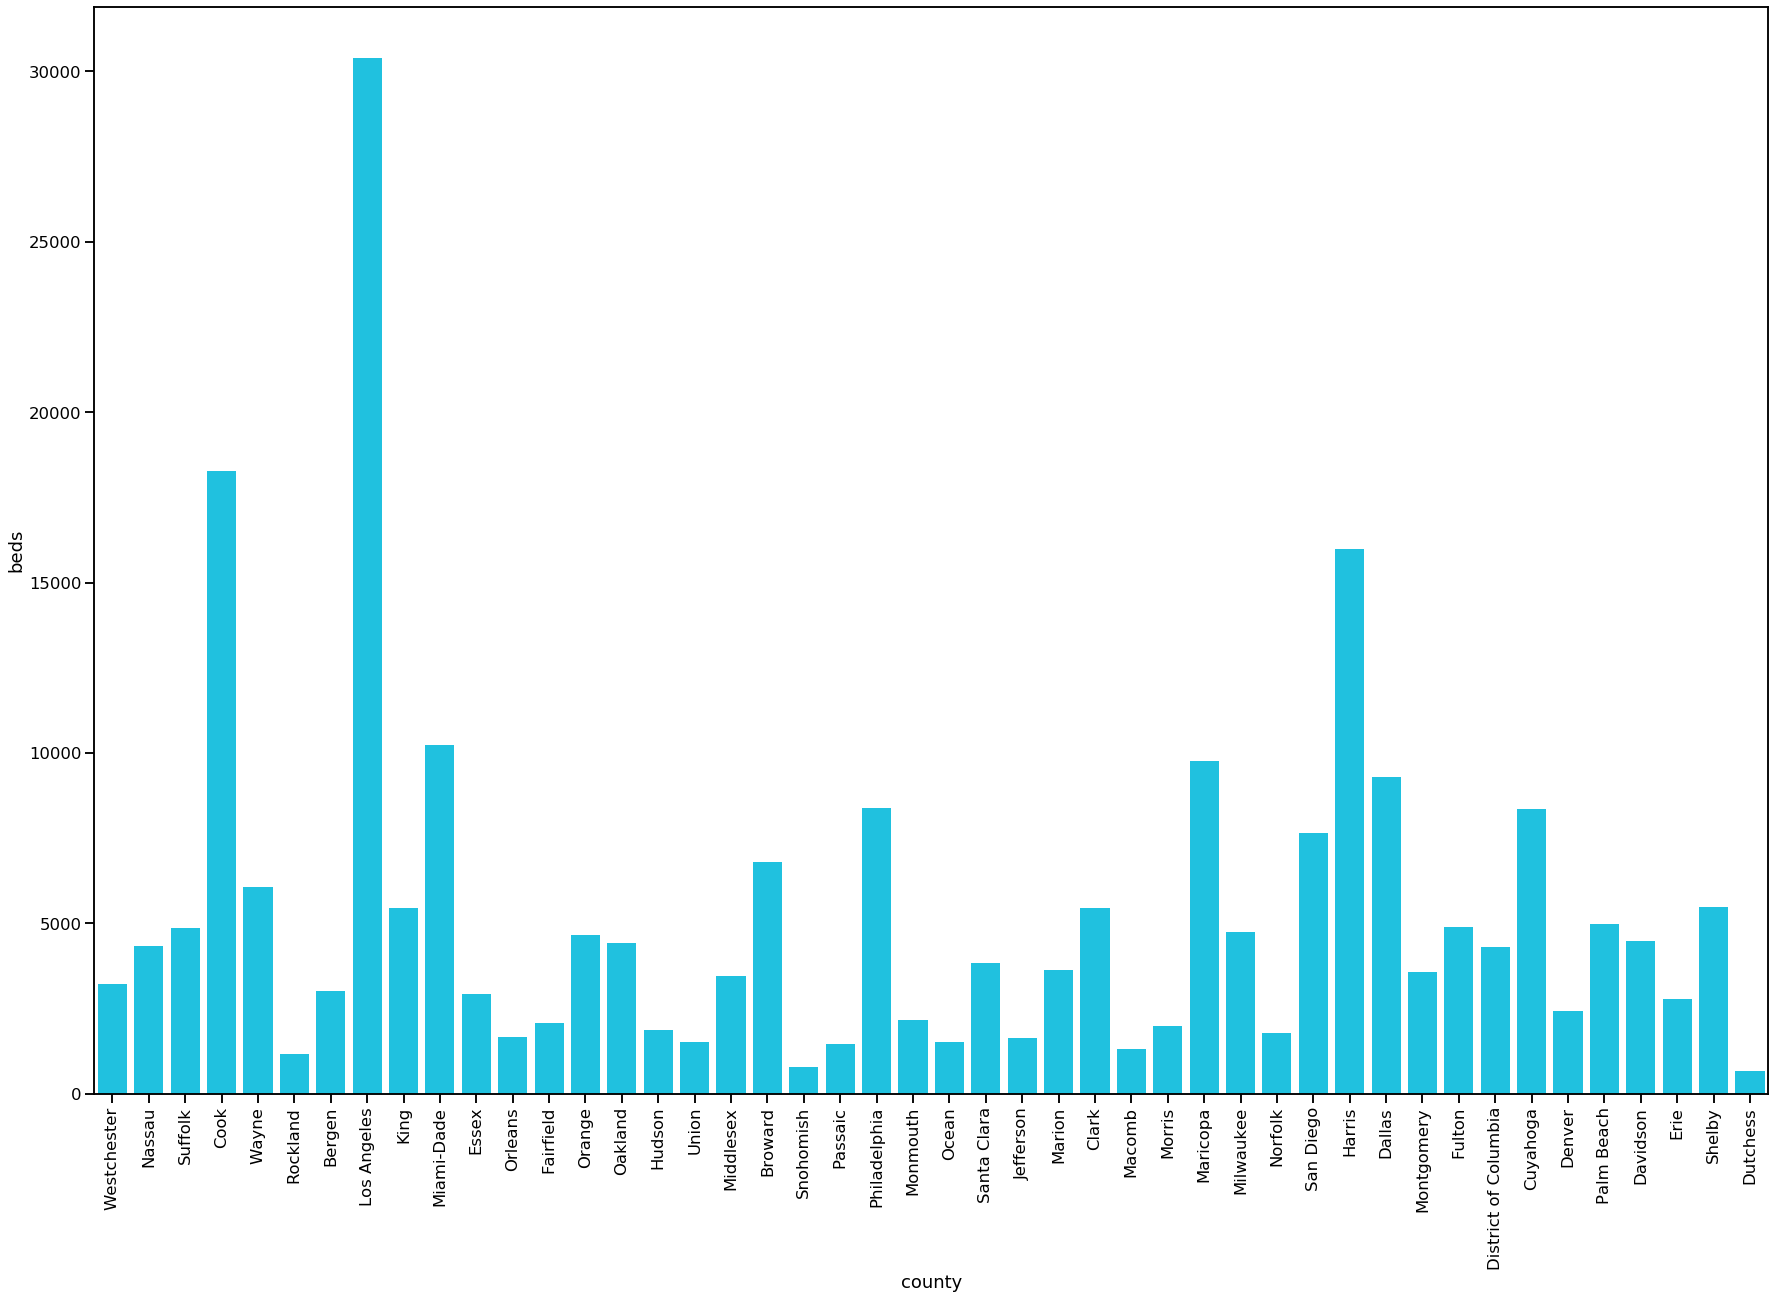

In [48]:
plt.figure(figsize=(30,20))
sns.barplot(x=df_merged_50['county'], y=df_merged_50['beds'], color=SEABORN_PALETTE[9], ci=False)
plt.xticks(rotation=90);

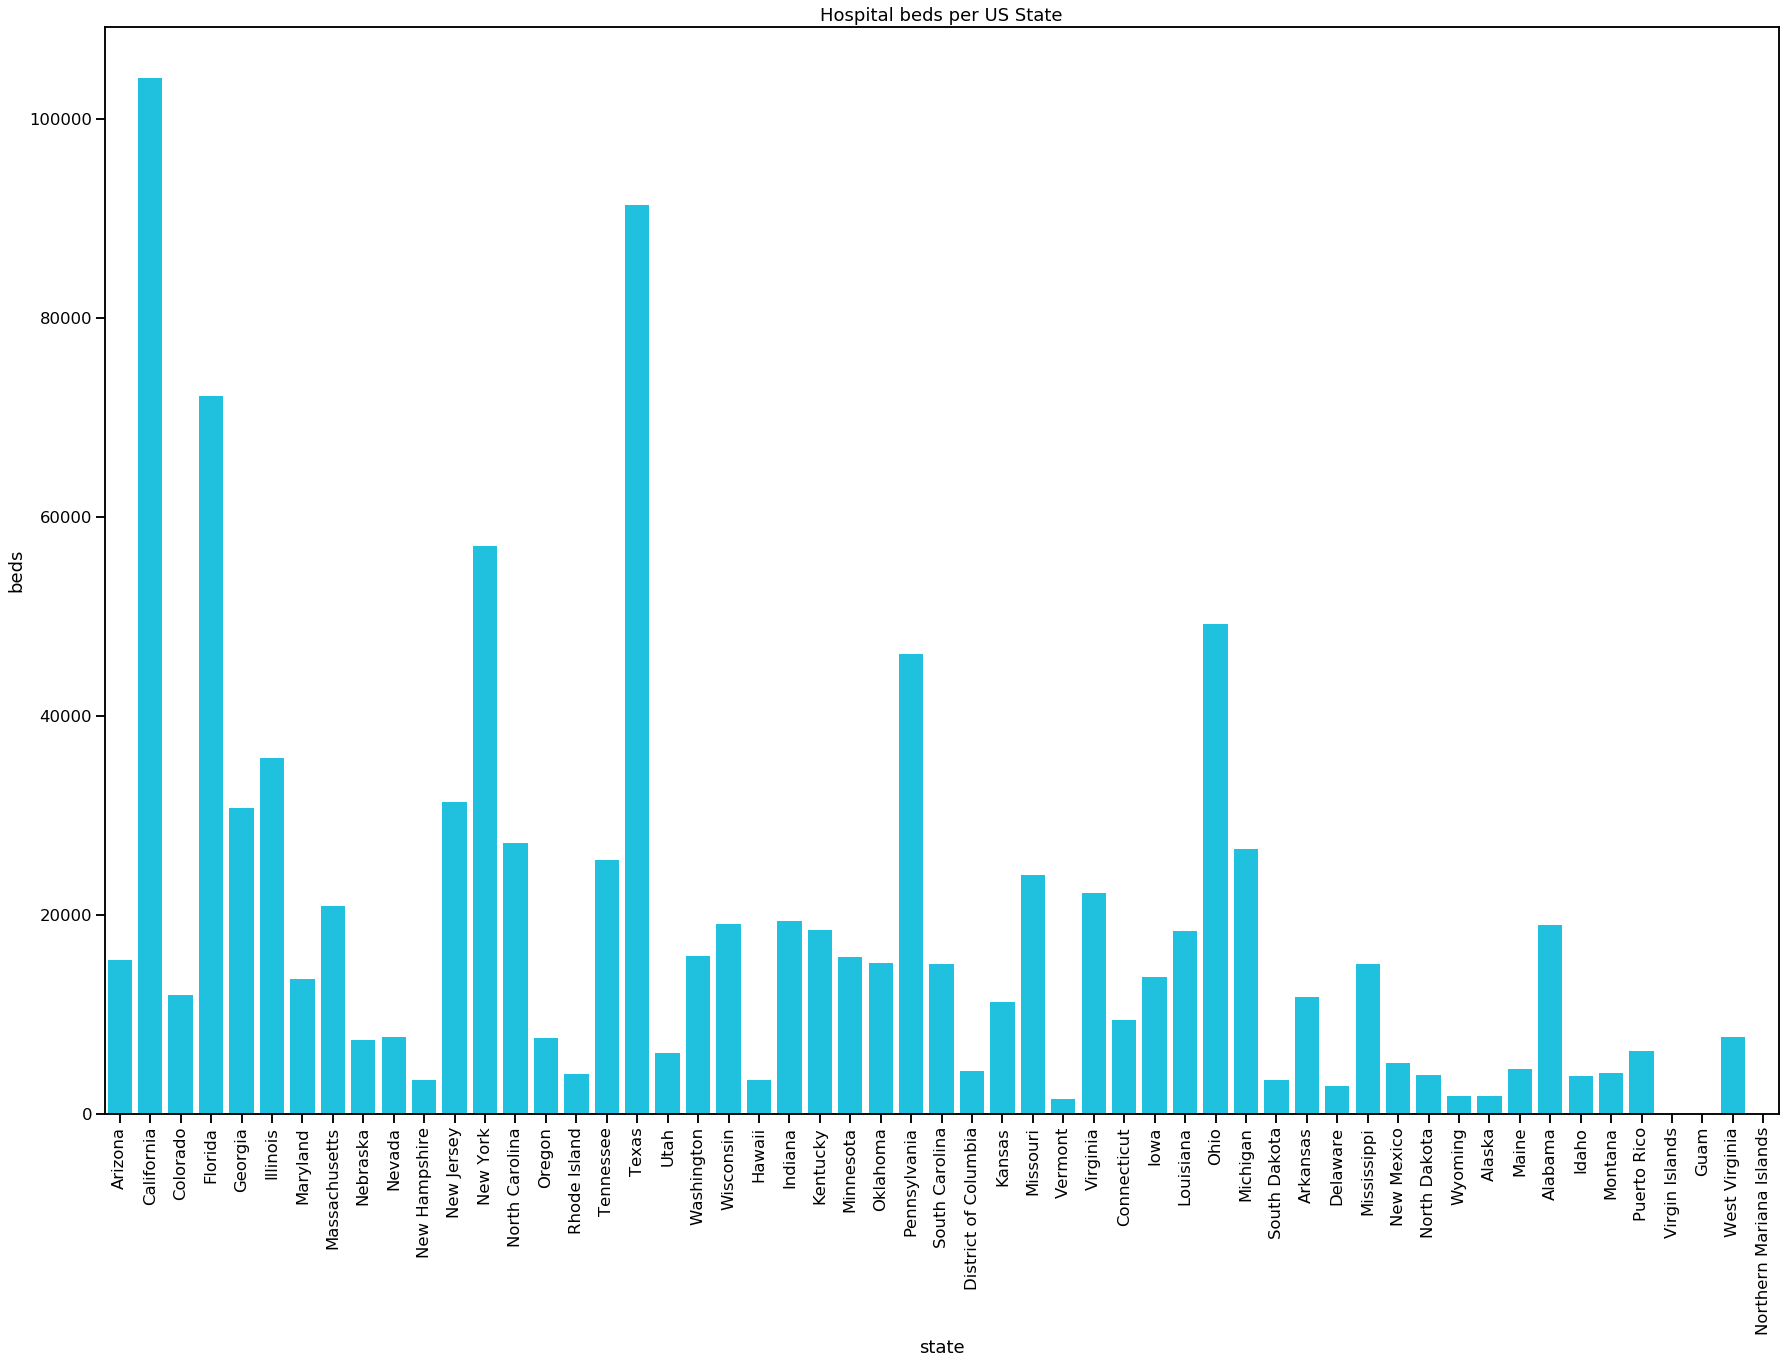

In [49]:
plt.figure(figsize=(30,20))
sns.barplot(x=df_states['state'], y=df_states['beds'], color=SEABORN_PALETTE[9], ci=False)
plt.title('Hospital beds per US State')
plt.xticks(rotation=90);

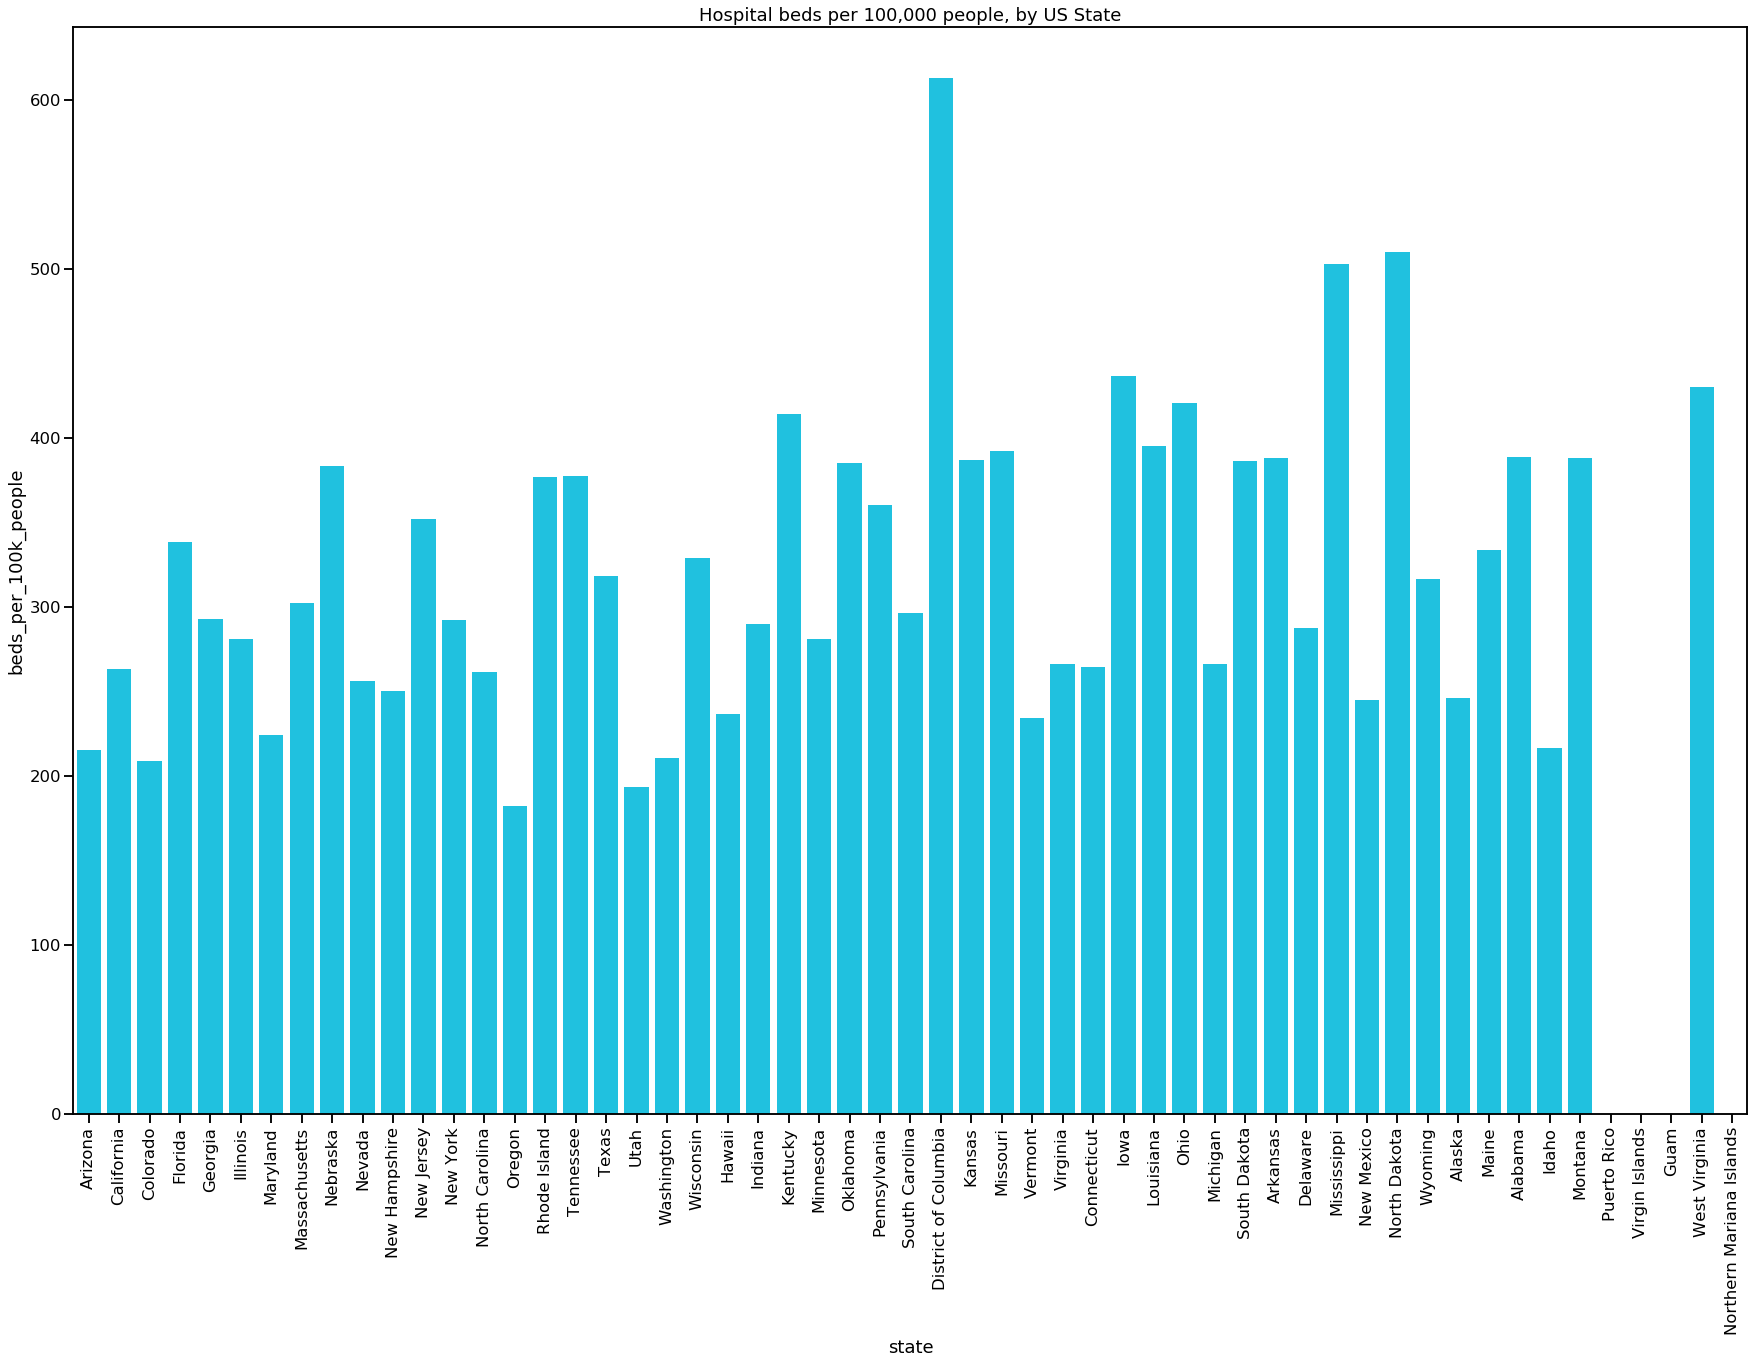

In [53]:
plt.figure(figsize=(30,20))
sns.barplot(x=df_states['state'], y=df_states['beds_per_100k_people'], color=SEABORN_PALETTE[9], ci=False)
plt.title('Hospital beds per 100,000 people, by US State')
plt.xticks(rotation=90);

In [54]:
# df_ny = df_states.loc[df_states['state'] == 'New York']
# df_nj = df_states.loc[df_states['state'] == 'New Jersey']

In [55]:
df_states_latest = df_states.loc[df_states['date'] == most_recent_date].sort_values(by='cases', ascending=False)
df_states_latest

date                     state  fips  cases  deaths  population  \
1231 2020-03-30                  New York    36  67174    1224  19542209.0   
1229 2020-03-30                New Jersey    34  16636     199   8908520.0   
1202 2020-03-30                California     6   7421     146  39557045.0   
1221 2020-03-30                  Michigan    26   6508     197   9995915.0   
1220 2020-03-30             Massachusetts    25   5752      61   6902149.0   
1207 2020-03-30                   Florida    12   5694      71  21299325.0   
1249 2020-03-30                Washington    53   5179     221   7535591.0   
1212 2020-03-30                  Illinois    17   5070      84  12741080.0   
1238 2020-03-30              Pennsylvania    42   4156      48  12807060.0   
1217 2020-03-30                 Louisiana    22   4025     186   4659978.0   
1244 2020-03-30                     Texas    48   3043      46  28701845.0   
1208 2020-03-30                   Georgia    13   3032     102  10519475.0   
1203 2020-03-30                  Colorado     8   2628      51   5695564.0   
1204 2020-03-30               Connecticut     9   2571      36   3572665.0   
1235 2020-03-30                      Ohio    39   1933      40  11689442.0   
1243 2020-03-30                 Tennessee    47   1834      13   6770010.0   
1213 2020-03-30                   Indiana    18   1788      35   6691878.0   
1219 2020-03-30                  Maryland    24   1414      15   6042718.0   
1232 2020-03-30            North Carolina    37   1304       6  10383620.0   
1251 2020-03-30                 Wisconsin    55   1267      20   5813568.0   
1200 2020-03-30                   Arizona     4   1169      20   7171646.0   
1224 2020-03-30                  Missouri    29   1050      13   6126452.0   
1227 2020-03-30                    Nevada    32   1044      18   3034392.0   
1248 2020-03-30                  Virginia    51   1021      26   8330345.0   
1198 2020-03-30                   Alabama     1    947      11   4887871.0   
1241 2020-03-30            South Carolina    45    925      18   5084127.0   
1223 2020-03-30               Mississippi    28    848      16   2986530.0   
1245 2020-03-30                      Utah    49    806       4   3161105.0   
1237 2020-03-30                    Oregon    41    606      16   4190713.0   
1222 2020-03-30                 Minnesota    27    576      10   5611179.0   
1201 2020-03-30                  Arkansas     5    508       7   3013825.0   
1206 2020-03-30      District of Columbia    11    495       9    702455.0   
1236 2020-03-30                  Oklahoma    40    481      17   3943079.0   
1216 2020-03-30                  Kentucky    21    480      11   4468402.0   
1214 2020-03-30                      Iowa    19    424       6   3156145.0   
1211 2020-03-30                     Idaho    16    415       7   1754208.0   
1240 2020-03-30              Rhode Island    44    408       4   1057315.0   
1215 2020-03-30                    Kansas    20    373       9   2911505.0   
1228 2020-03-30             New Hampshire    33    314       3   1356458.0   
1230 2020-03-30                New Mexico    35    281       4   2095428.0   
1218 2020-03-30                     Maine    23    275       3   1338404.0   
1205 2020-03-30                  Delaware    10    264       7    967171.0   
1246 2020-03-30                   Vermont    50    256      12    626299.0   
1210 2020-03-30                    Hawaii    15    204       0   1420491.0   
1226 2020-03-30                  Nebraska    31    185       3   1929268.0   
1225 2020-03-30                   Montana    30    177       4   1062305.0   
1239 2020-03-30               Puerto Rico    72    174       6         NaN   
1250 2020-03-30             West Virginia    54    145       1   1805832.0   
1199 2020-03-30                    Alaska     2    119       2    737438.0   
1233 2020-03-30              North Dakota    38    109       3    760077.0   
1242 2020-03-30              Sout

In [56]:
group_size = 10
state_groups = []

# Initialize empty arrays for groups of states
for i in np.arange(0, len(df_states_latest['state']), group_size): 
    state_groups.append([])
    
for i, state in enumerate(df_states_latest['state']):
    state_groups[i // group_size].append(state)

state_groups

[['New York',
  'New Jersey',
  'California',
  'Michigan',
  'Massachusetts',
  'Florida',
  'Washington',
  'Illinois',
  'Pennsylvania',
  'Louisiana'],
 ['Texas',
  'Georgia',
  'Colorado',
  'Connecticut',
  'Ohio',
  'Tennessee',
  'Indiana',
  'Maryland',
  'North Carolina',
  'Wisconsin'],
 ['Arizona',
  'Missouri',
  'Nevada',
  'Virginia',
  'Alabama',
  'South Carolina',
  'Mississippi',
  'Utah',
  'Oregon',
  'Minnesota'],
 ['Arkansas',
  'District of Columbia',
  'Oklahoma',
  'Kentucky',
  'Iowa',
  'Idaho',
  'Rhode Island',
  'Kansas',
  'New Hampshire',
  'New Mexico'],
 ['Maine',
  'Delaware',
  'Vermont',
  'Hawaii',
  'Nebraska',
  'Montana',
  'Puerto Rico',
  'West Virginia',
  'Alaska',
  'North Dakota'],
 ['South Dakota',
  'Wyoming',
  'Guam',
  'Virgin Islands',
  'Northern Mariana Islands']]

In [57]:
# states_0 = df_states.loc[df_states['state'].isin(state_groups[0])]

# plt.figure(figsize=(30,20))
# sns.lineplot(x=states_0['date'], y=states_0['cases'], hue=states_0['state'], marker="o", dashes=False, ci=False)
# plt.xticks(rotation=90);
# plt.tight_layout()
# plt.show()

/Users/megarock/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


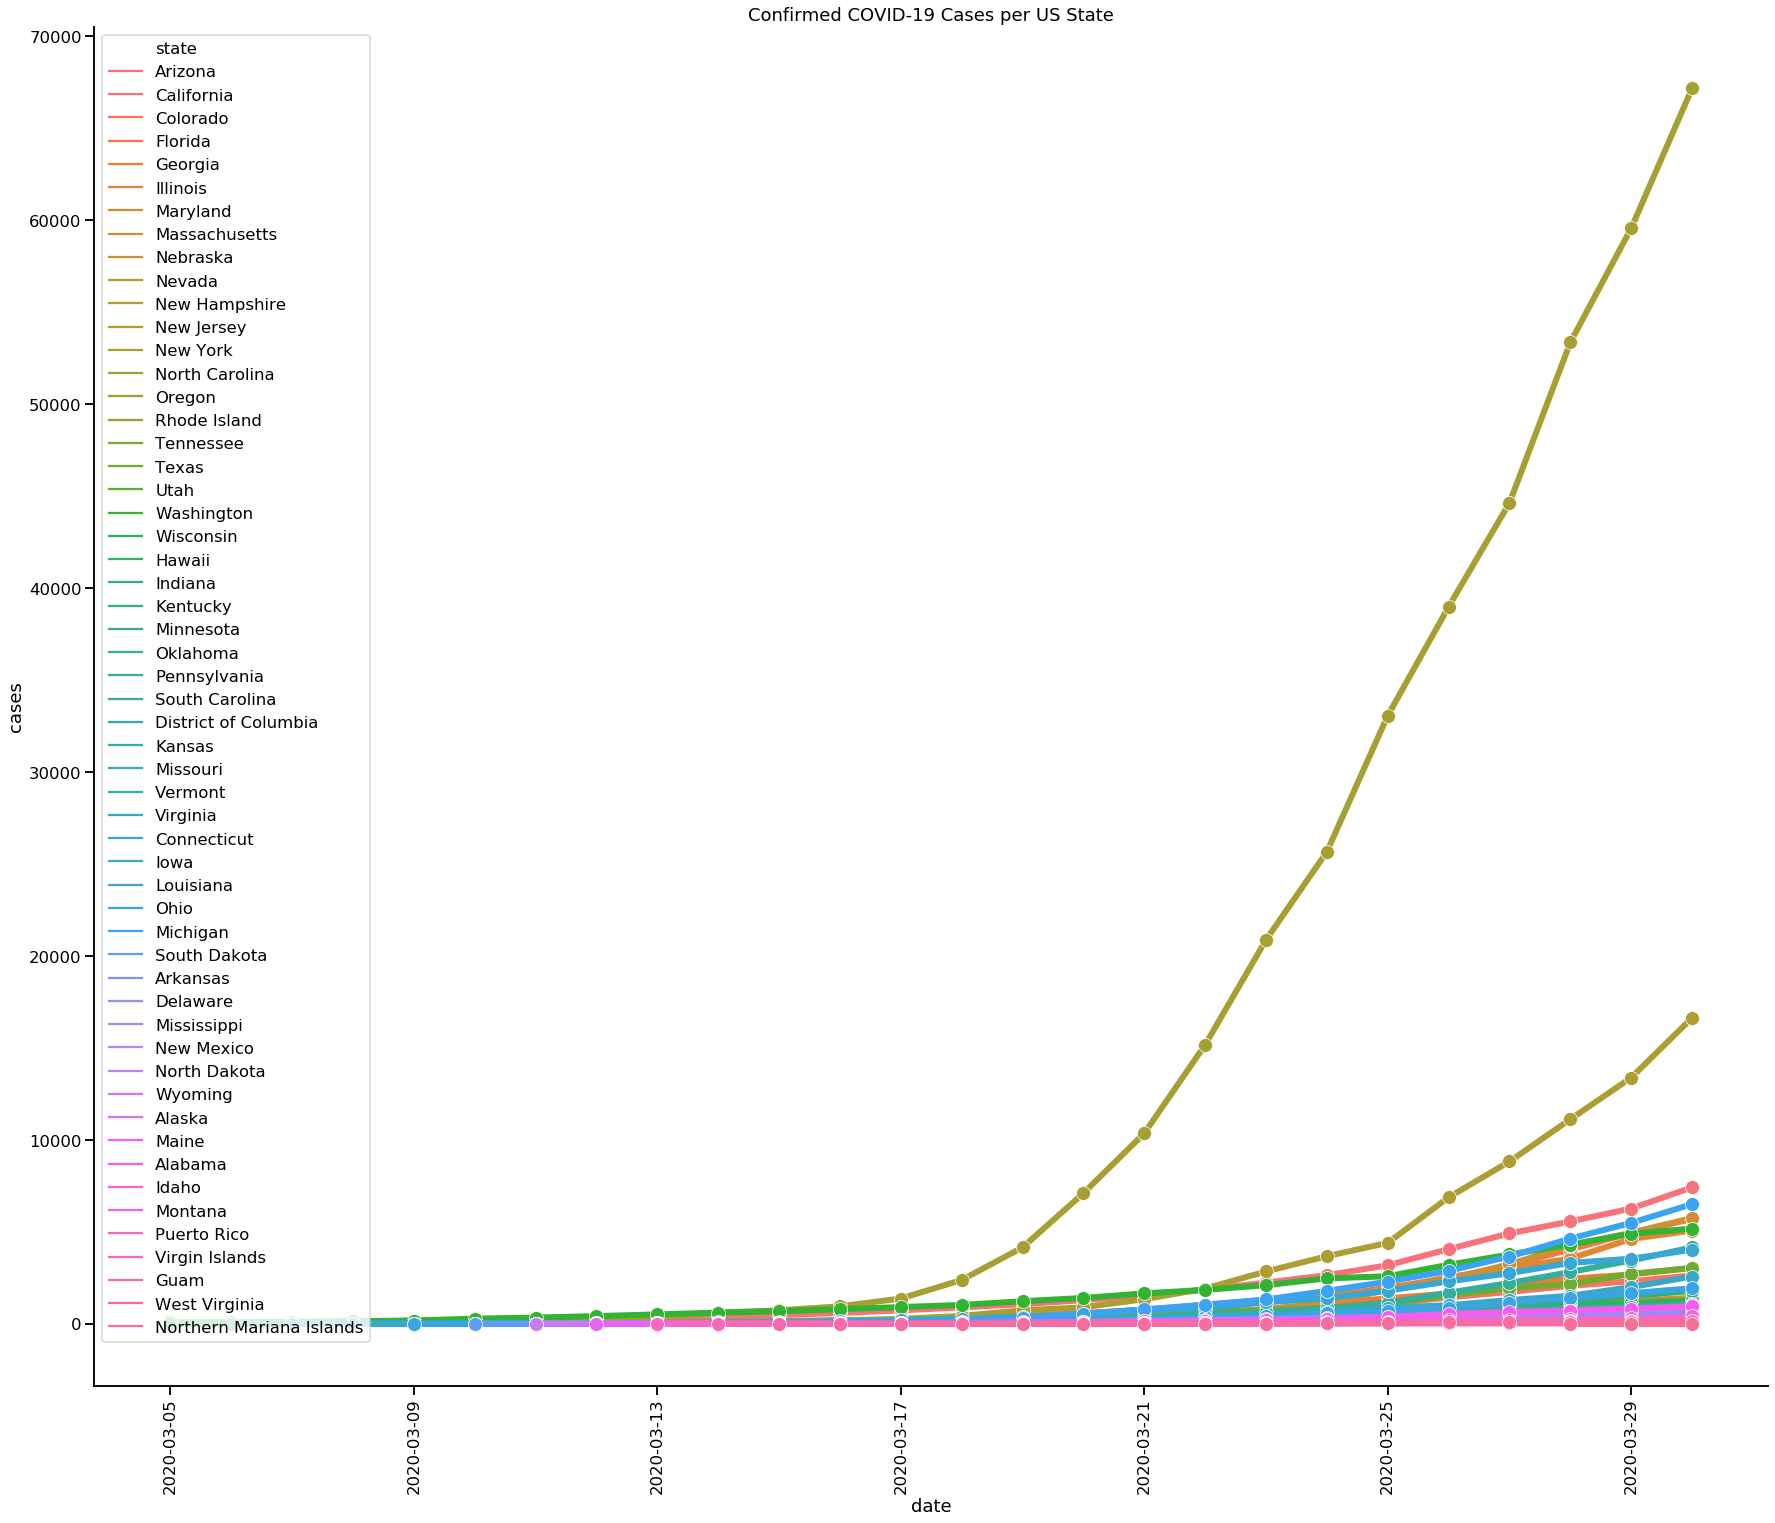

In [58]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df_states['date'], y=df_states['cases'], hue=df_states['state'], linewidth=6, markersize=14, marker='o', ci=False)
plt.title(f'Confirmed COVID-19 Cases per US State')
plt.xticks(rotation=90);
sns.despine()

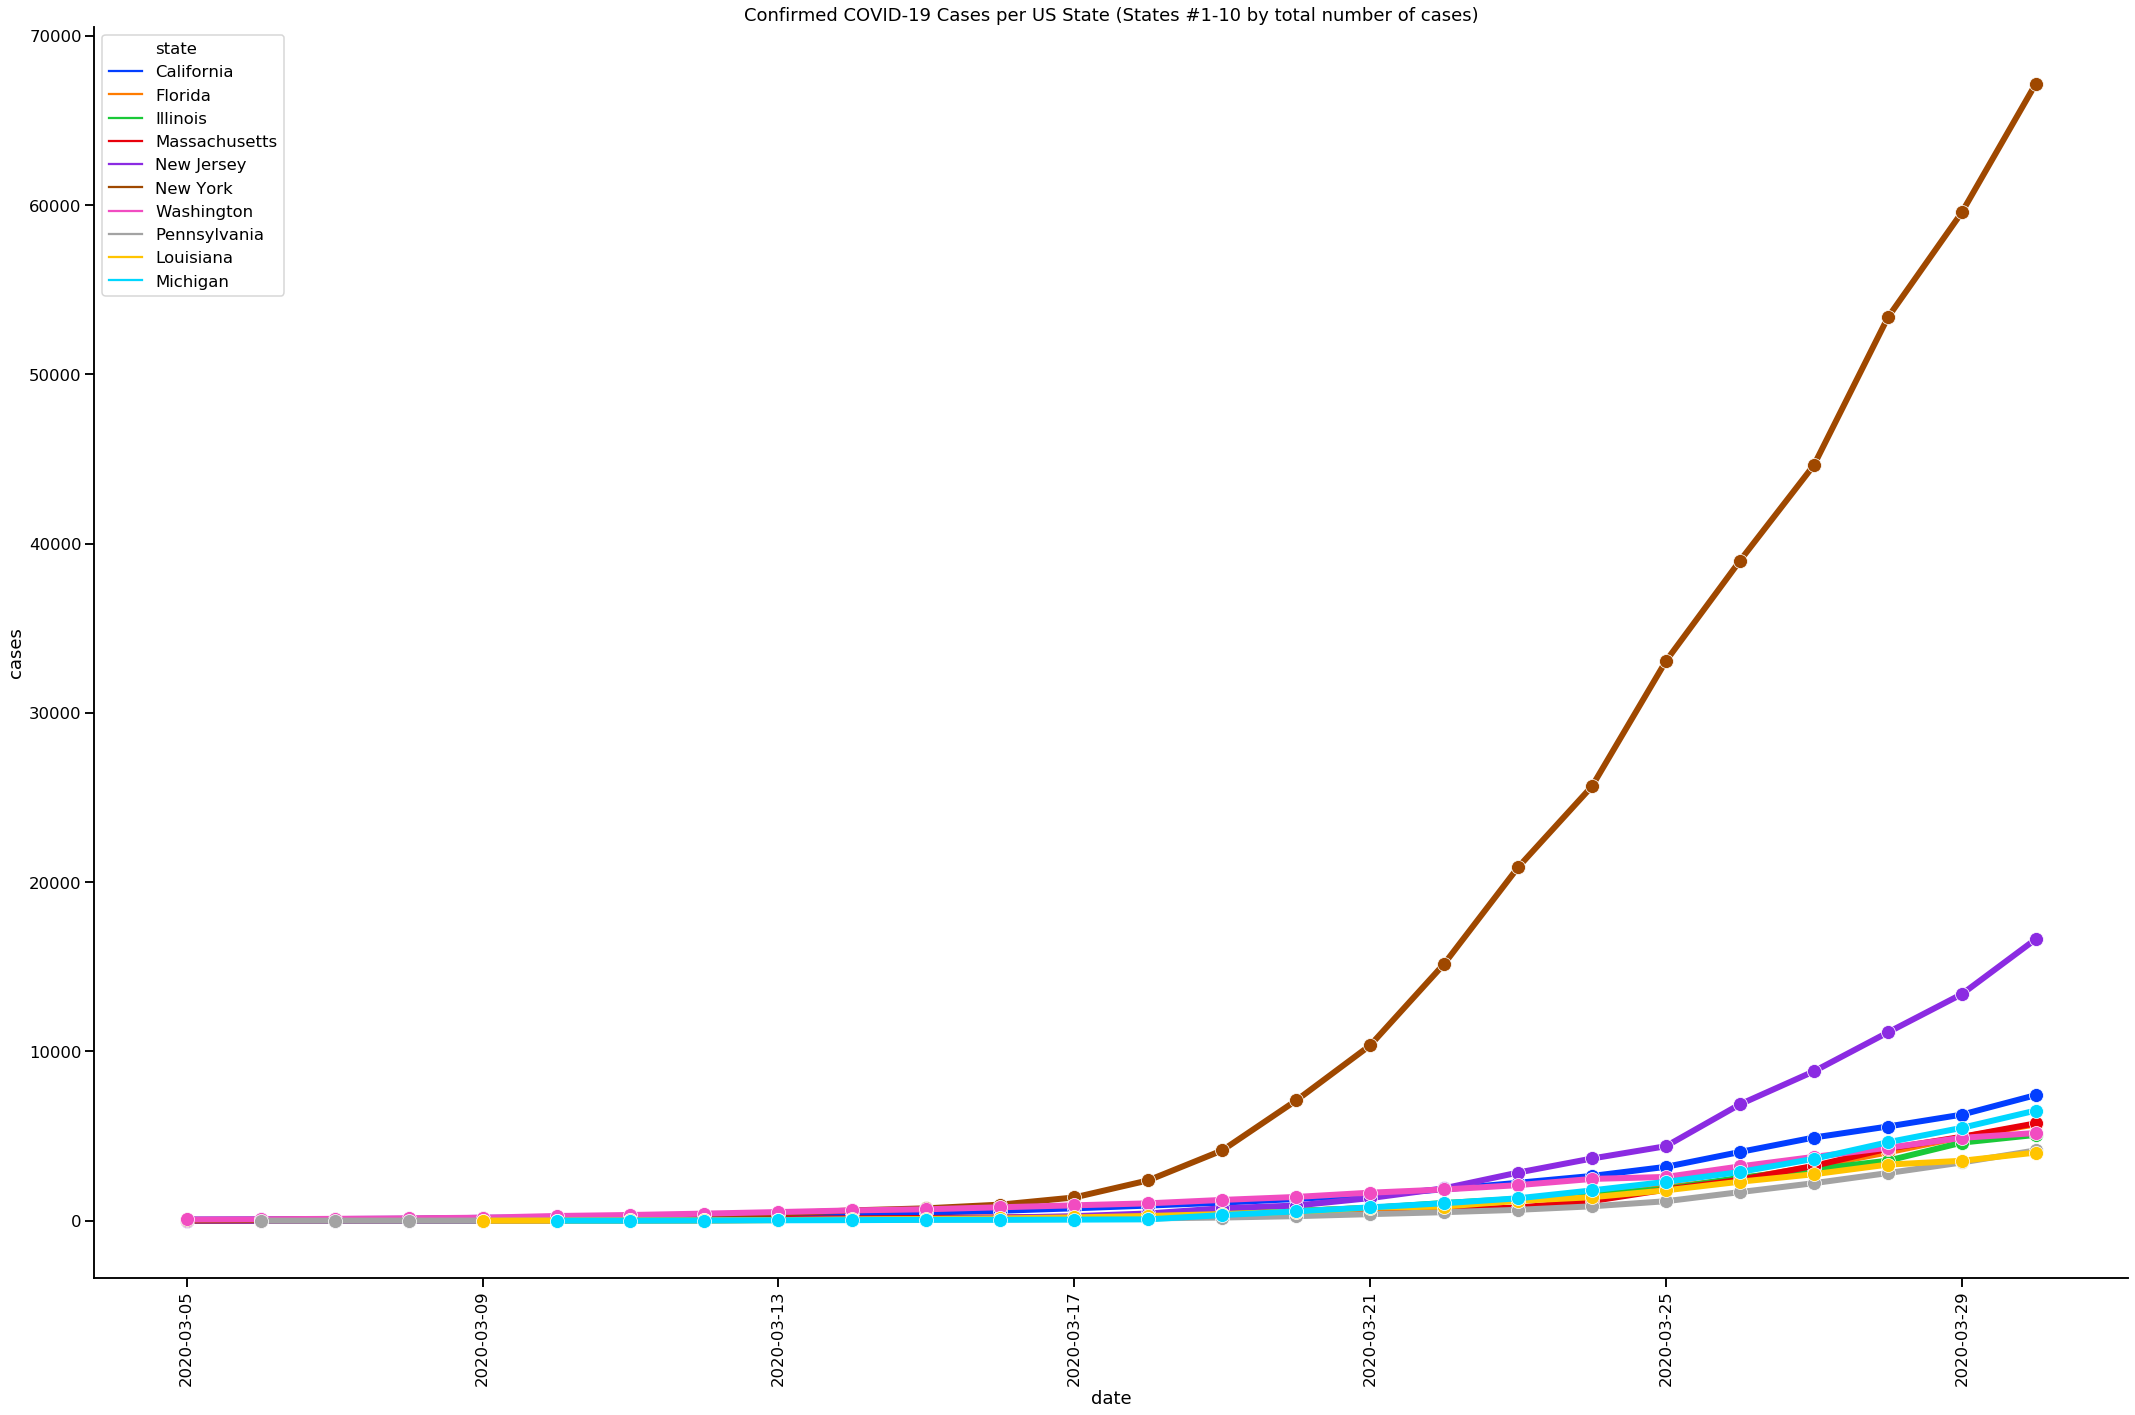

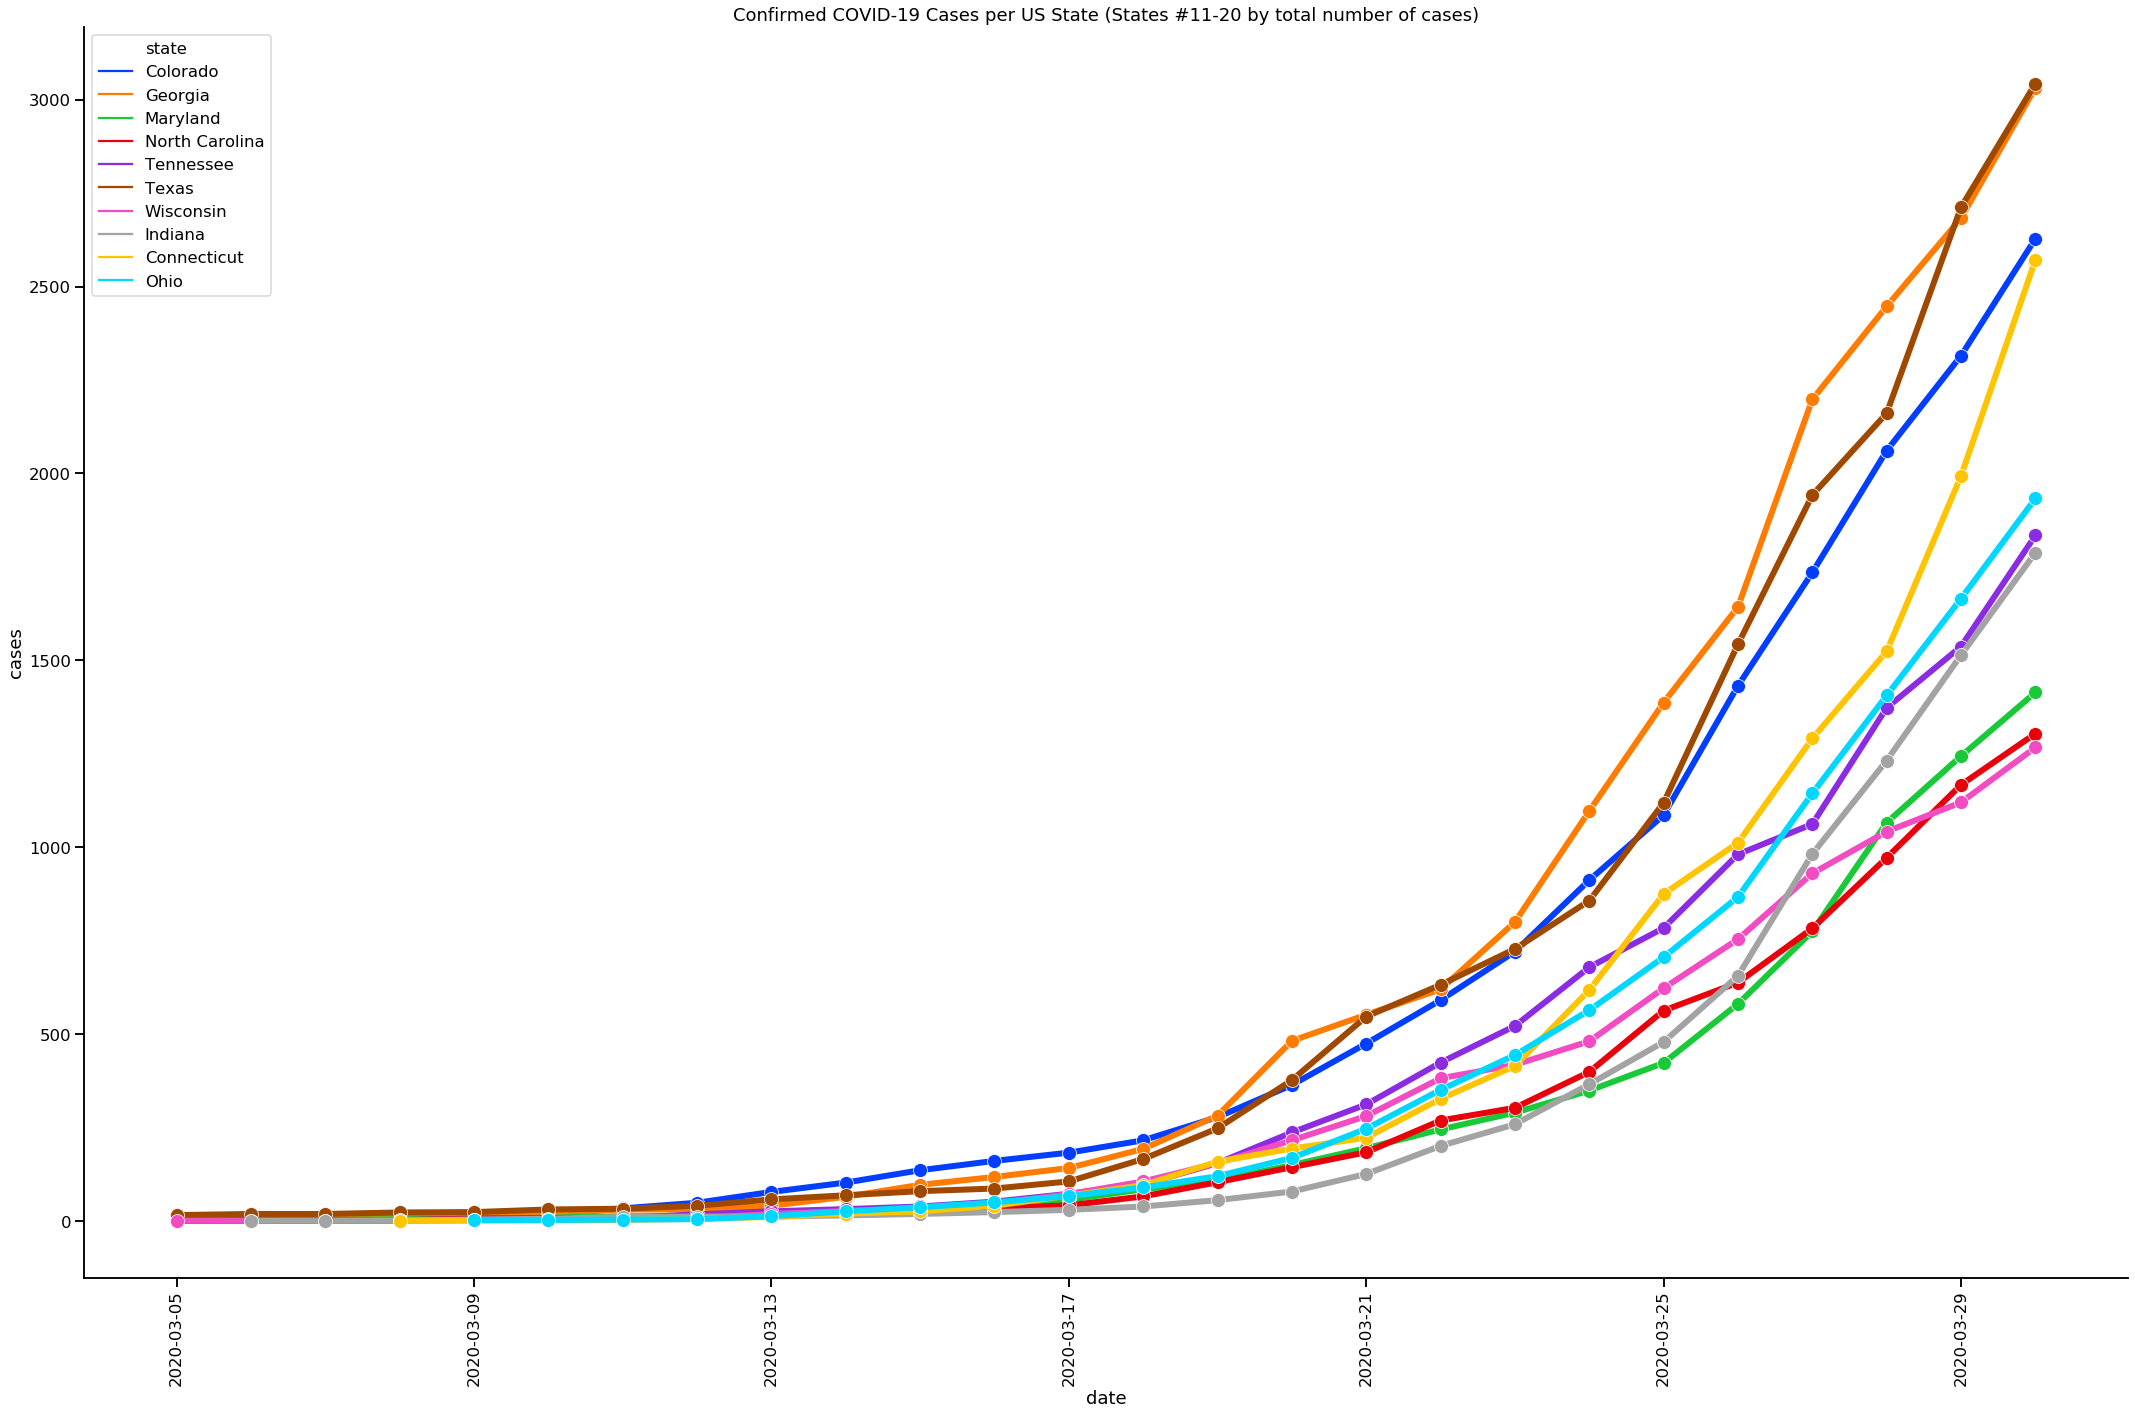

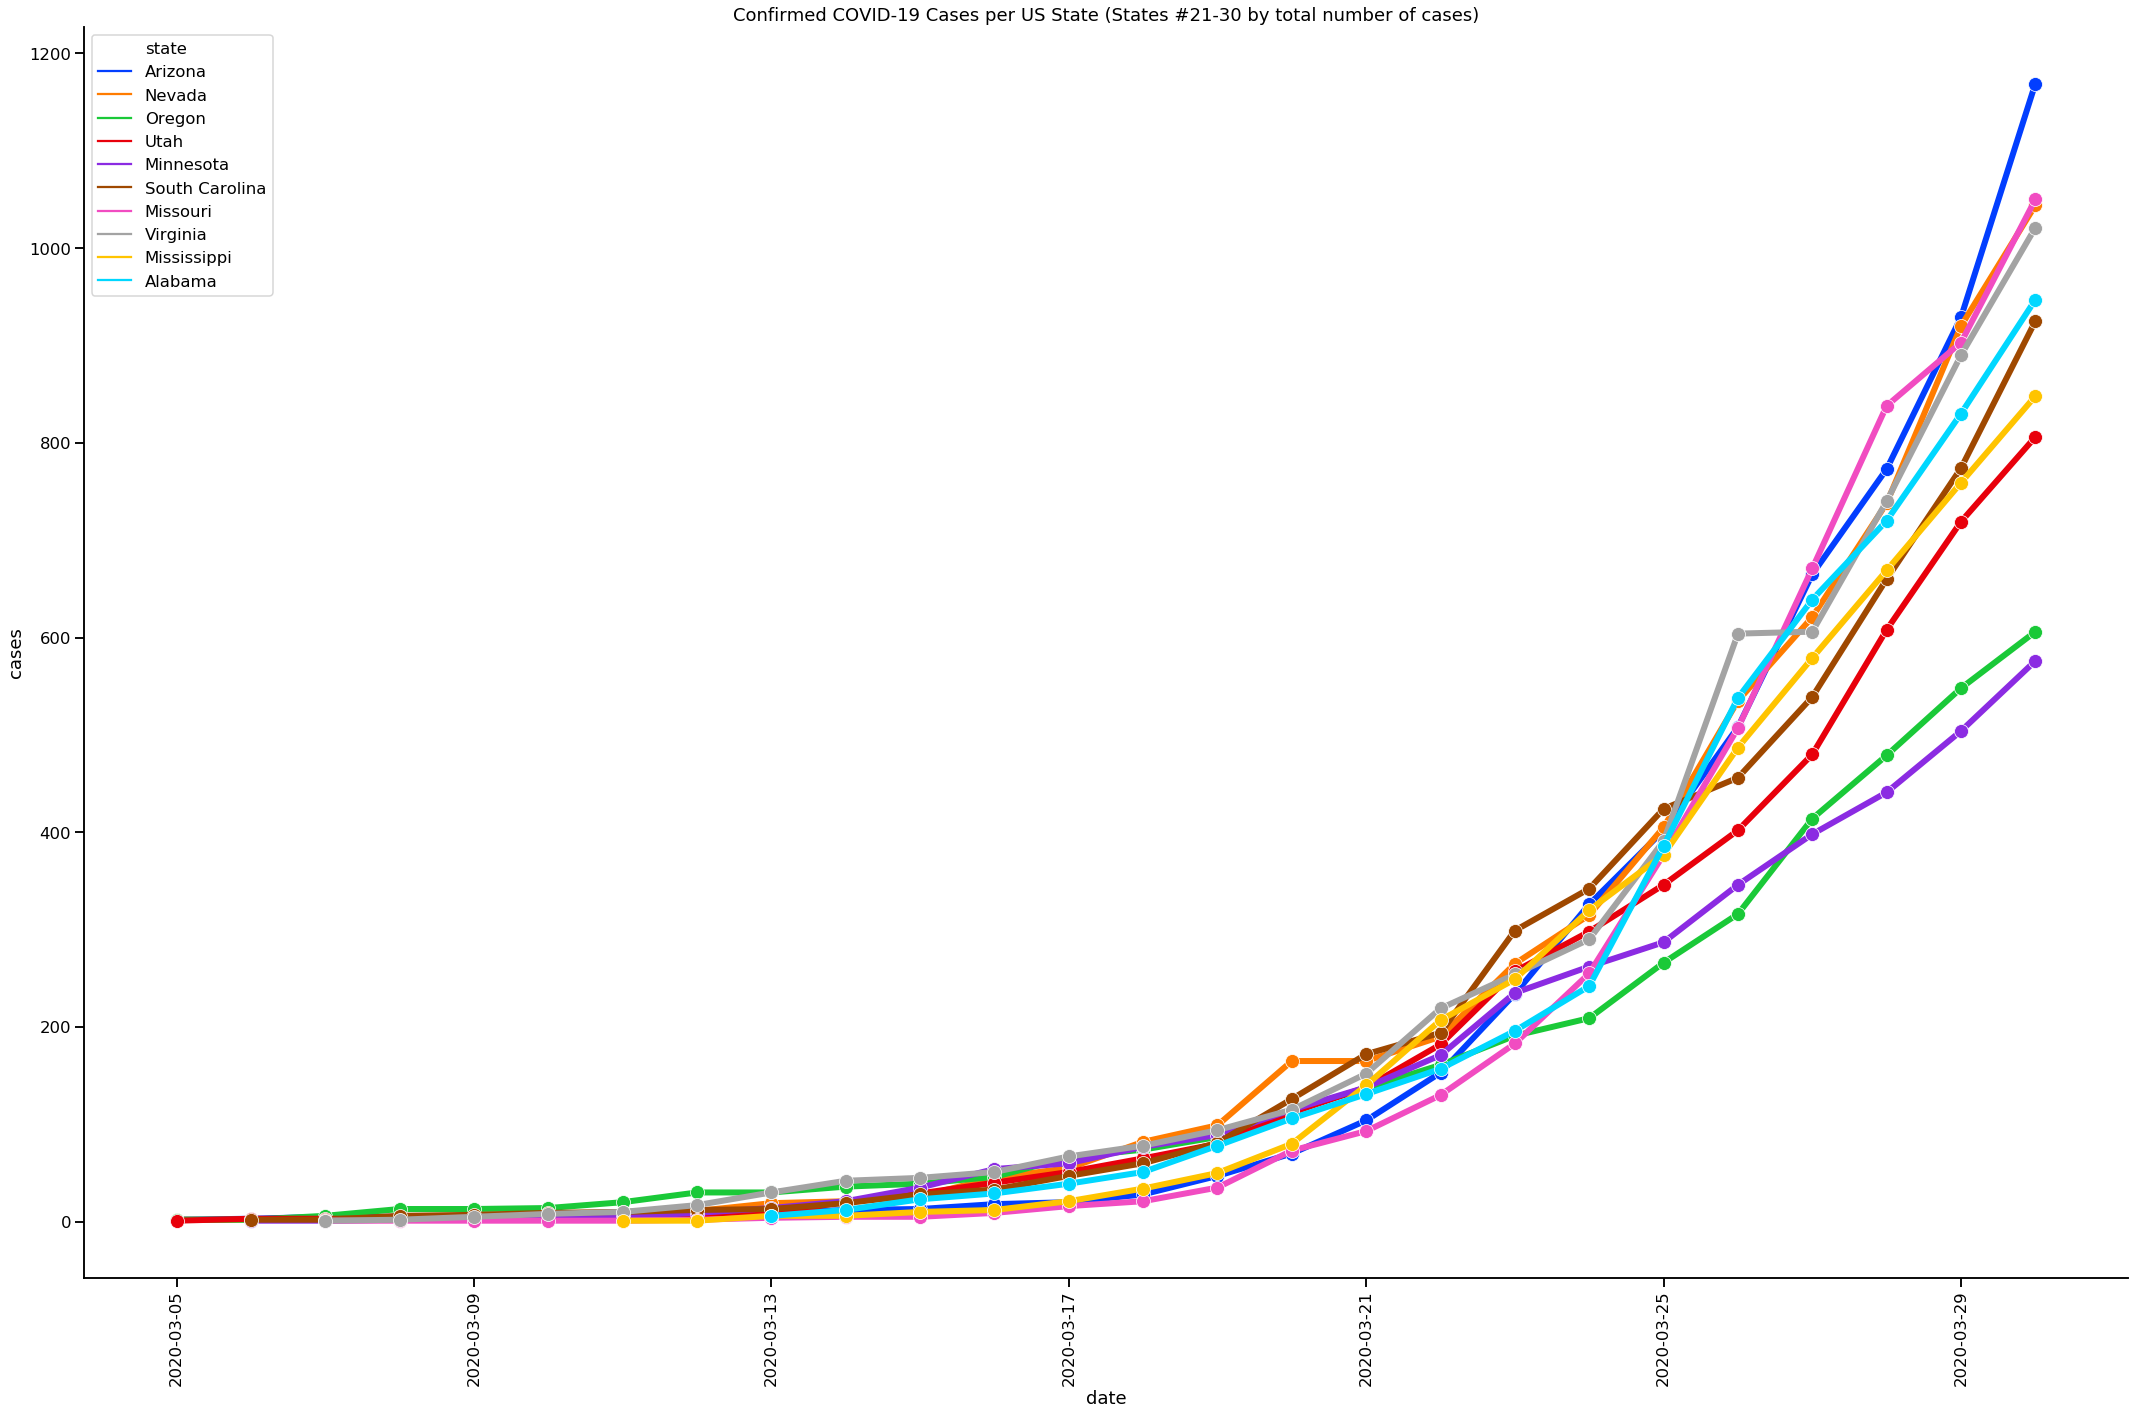

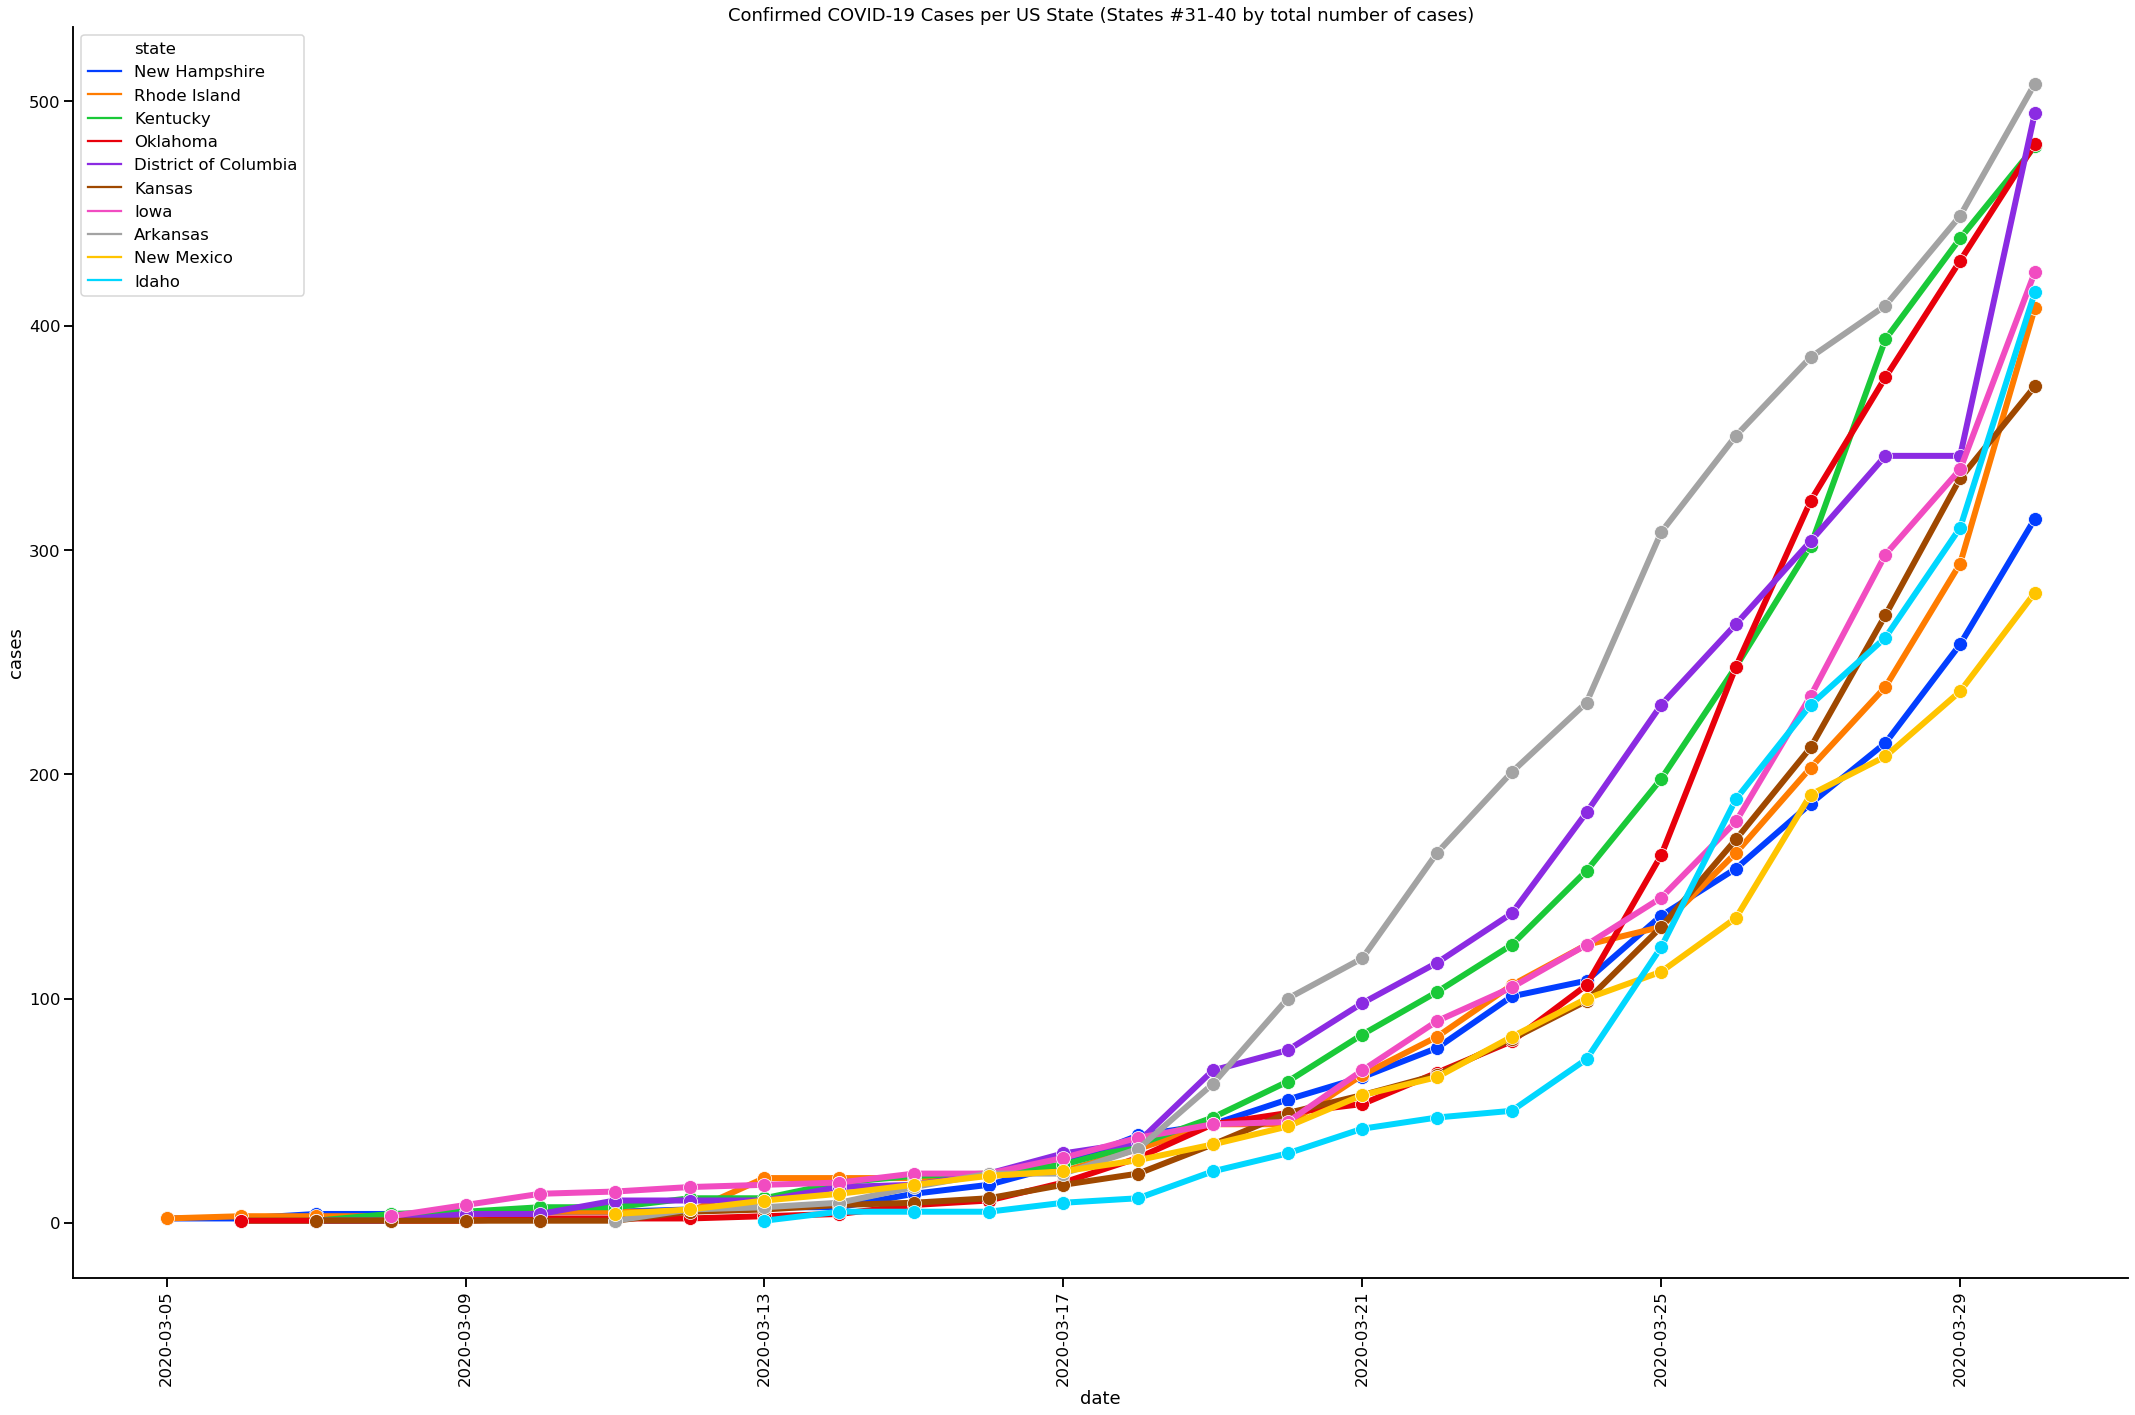

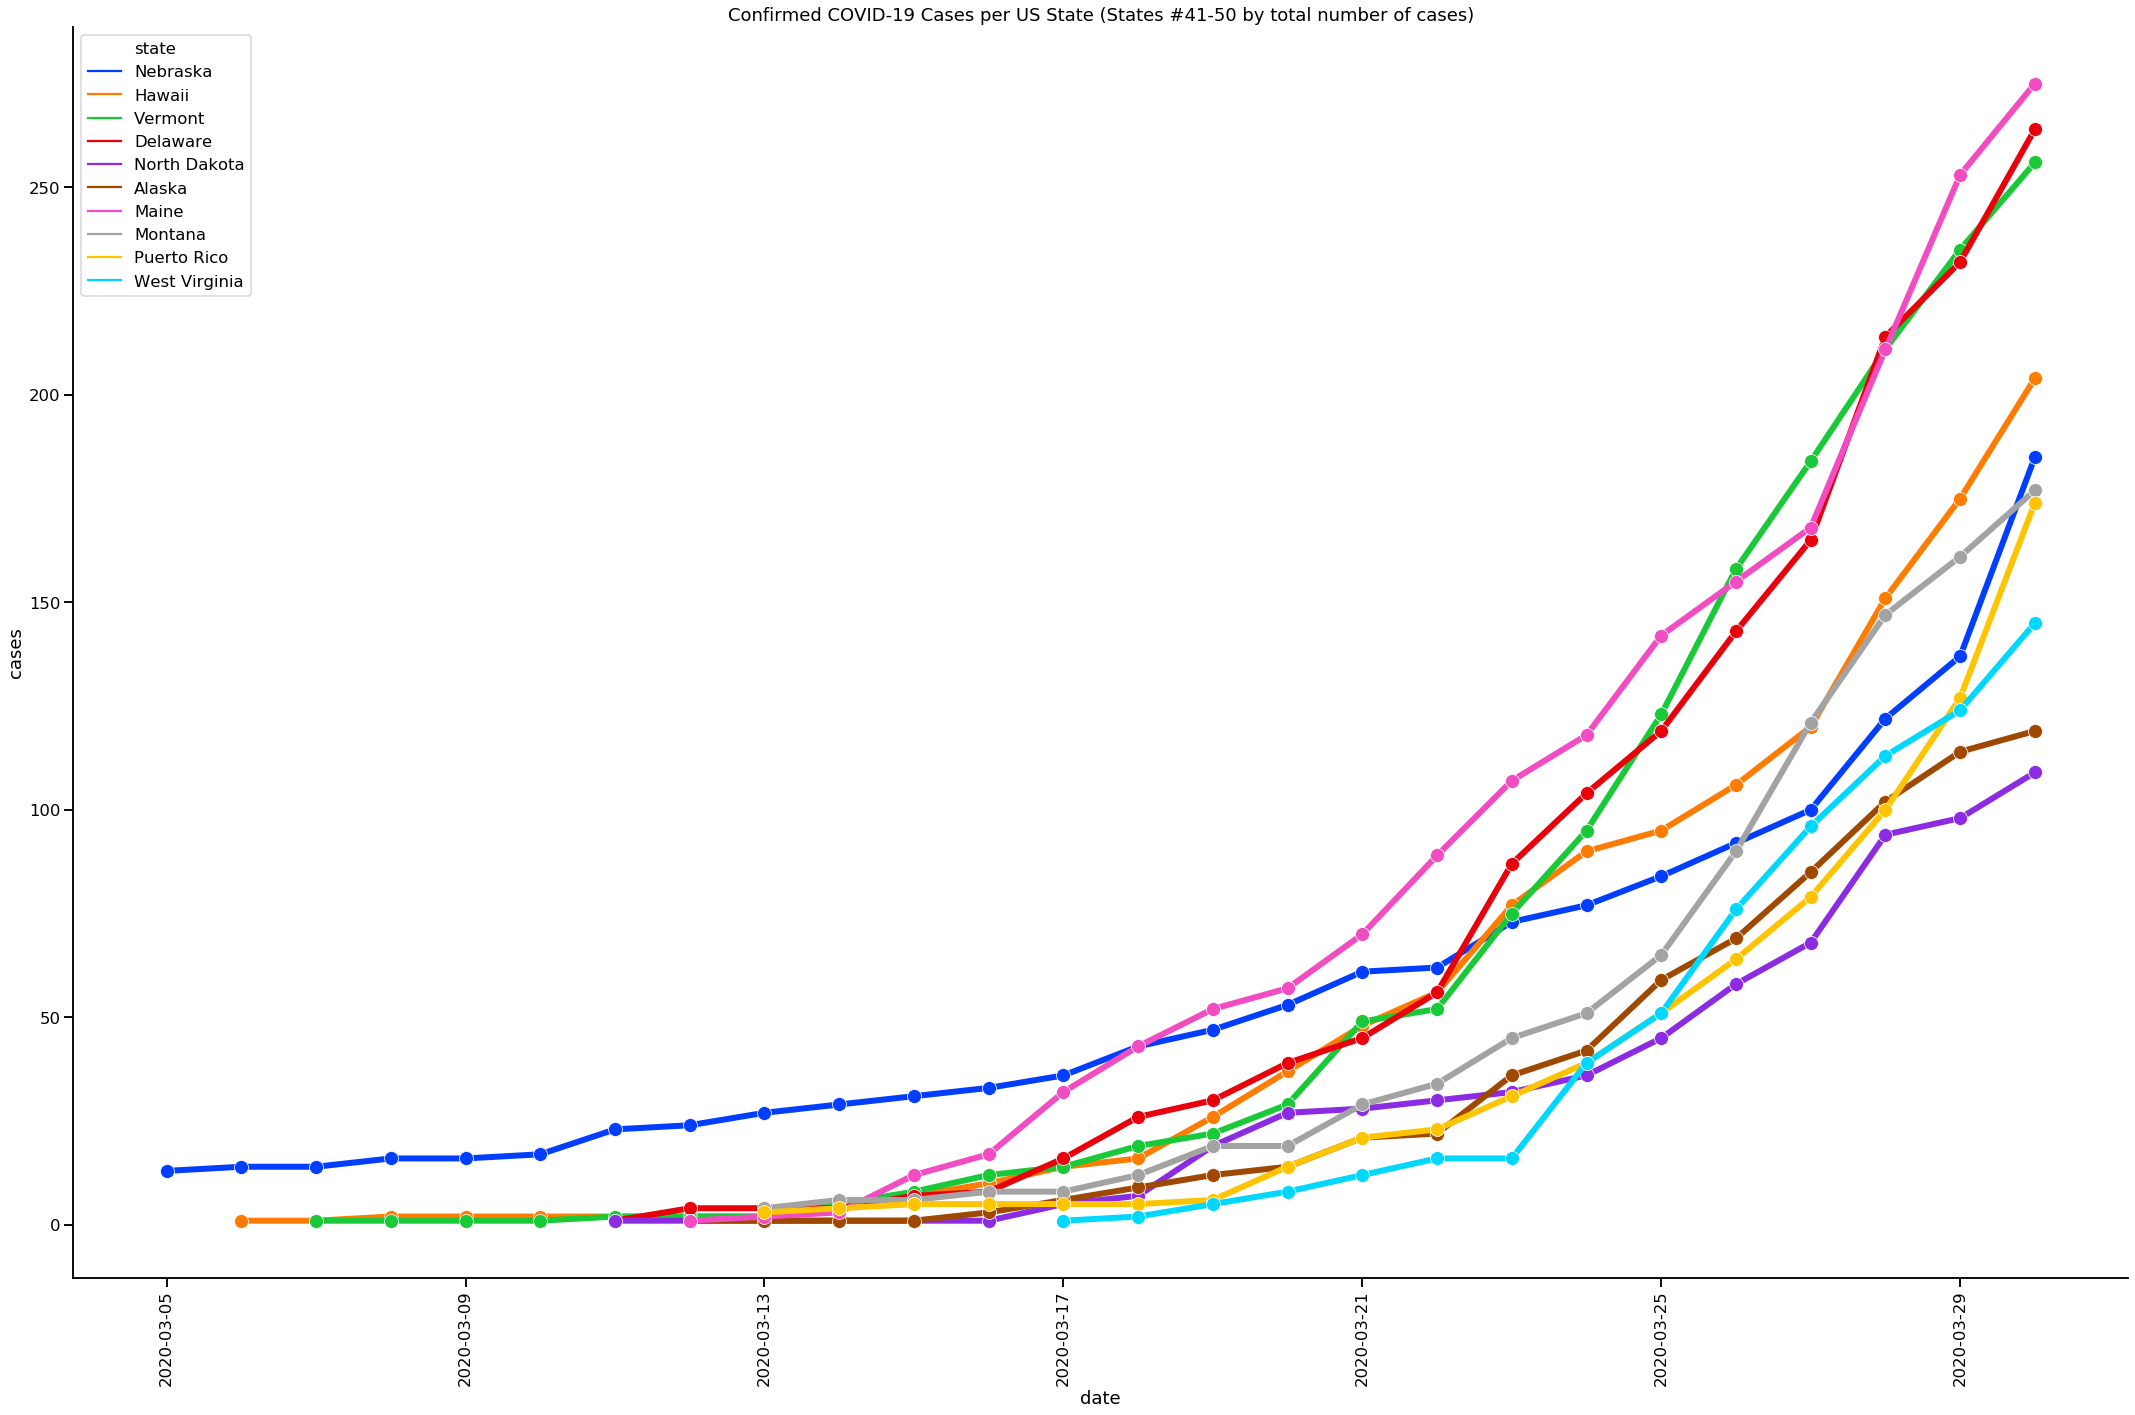

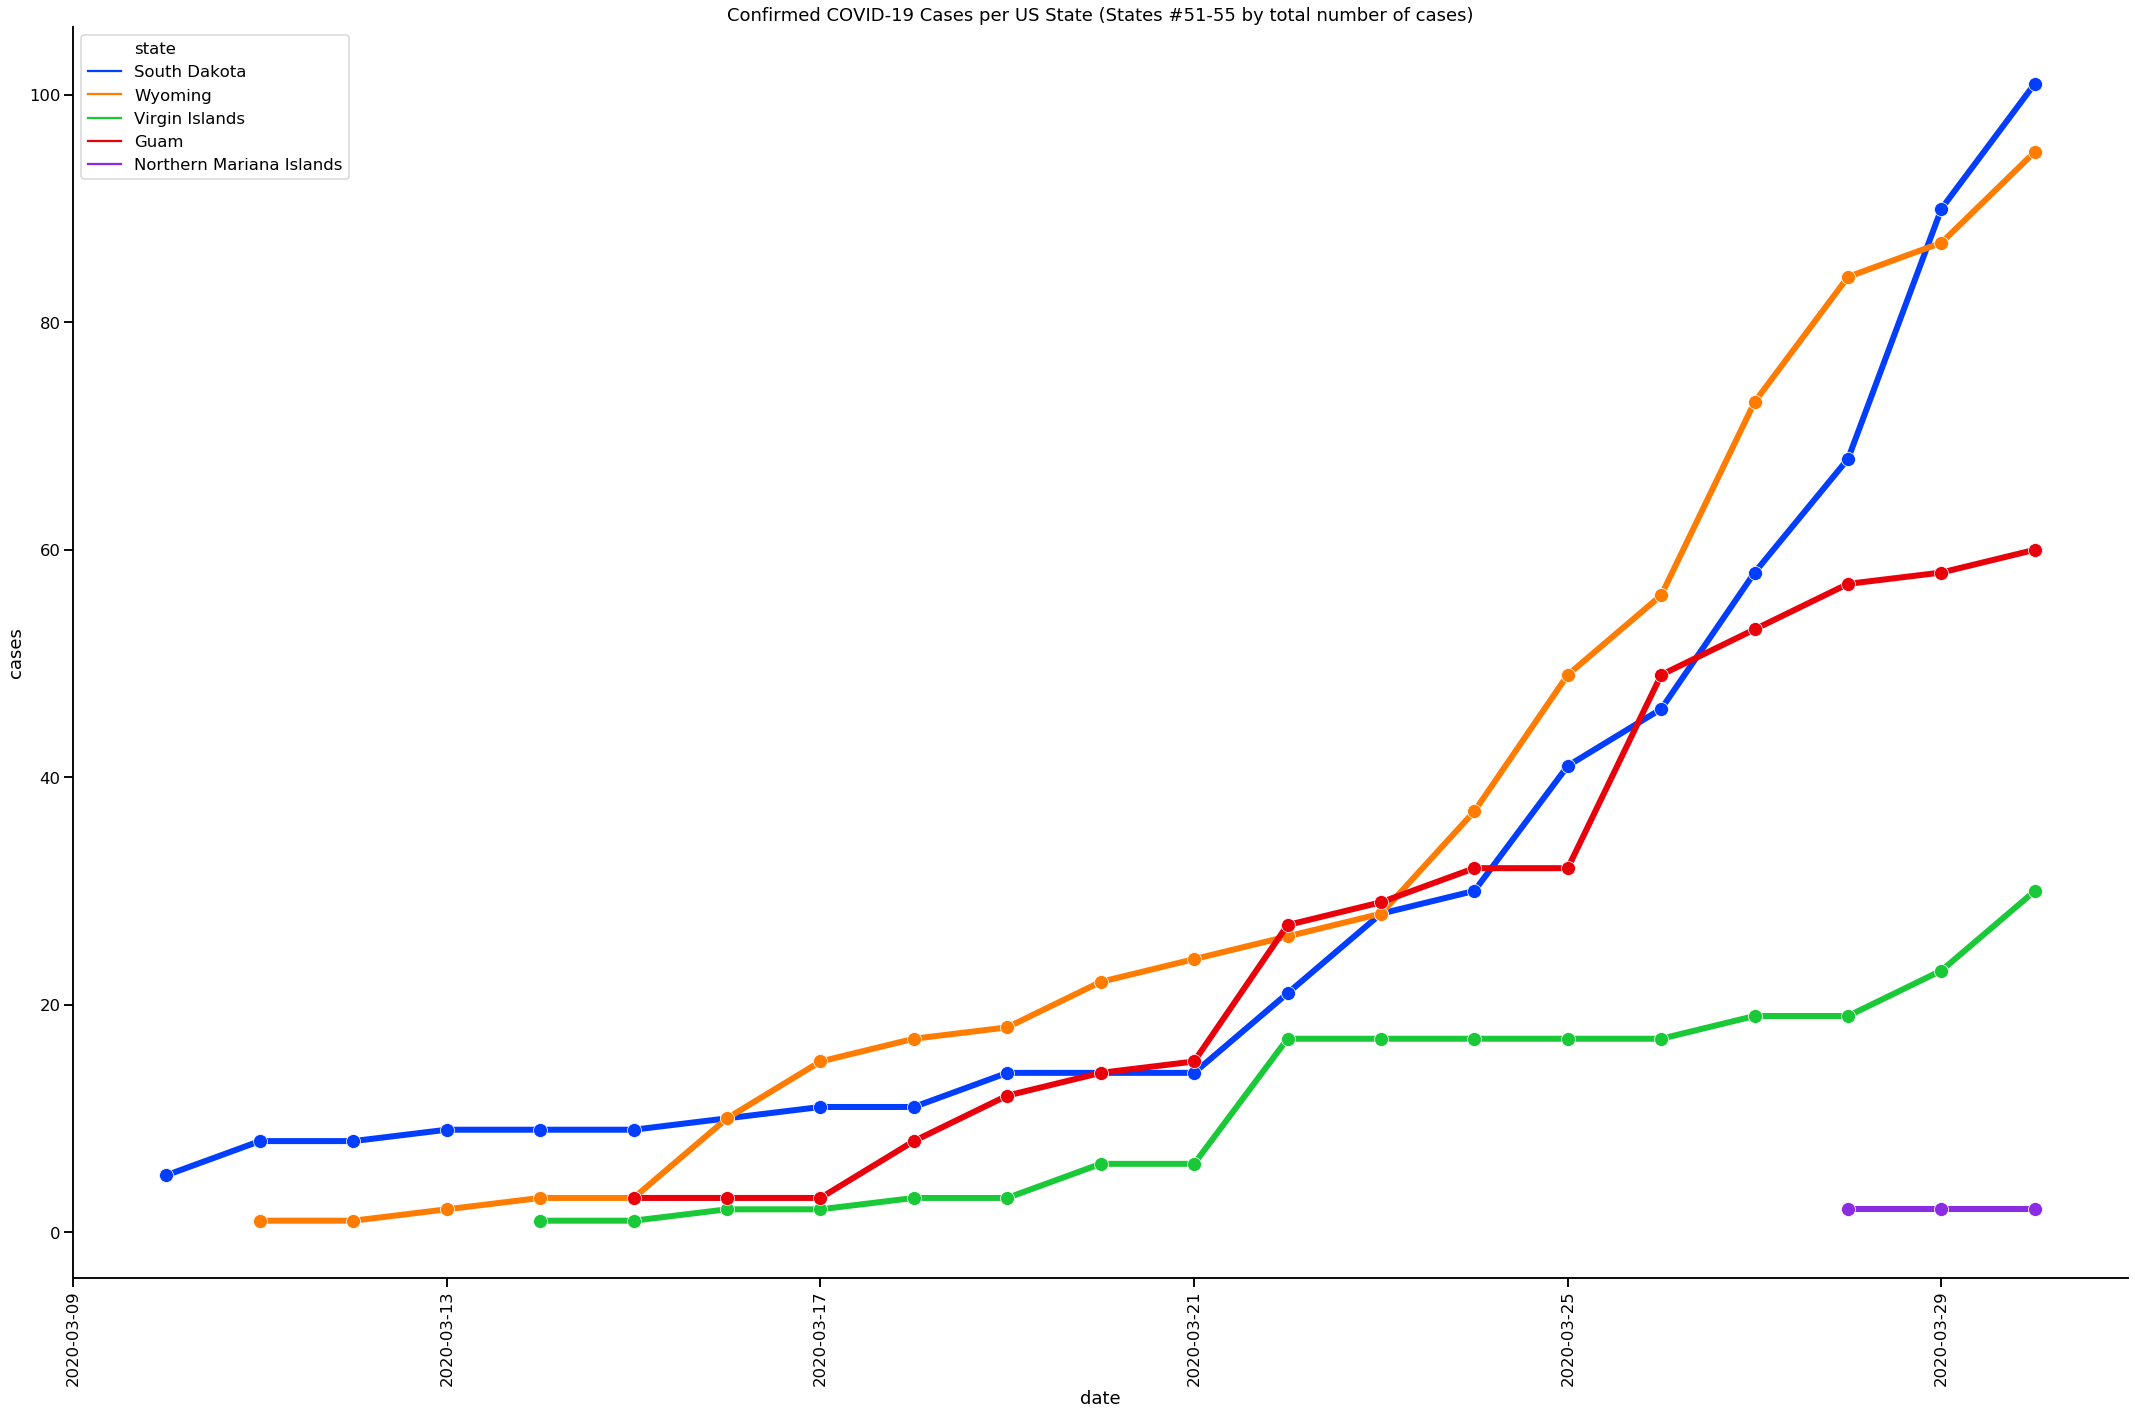

In [59]:
for i, group in enumerate(state_groups):
    states_to_plot = df_states.loc[df_states['state'].isin(group)]
    
    plt.figure(figsize=(30,20))
    sns.lineplot(x=states_to_plot['date'], y=states_to_plot['cases'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False, palette=SEABORN_PALETTE[:len(group)])
    plt.xticks(rotation=90);
    plt.title(f'Confirmed COVID-19 Cases per US State (States #{i*group_size+1}-{i*group_size+len(group)} by total number of cases)')
    sns.despine()
    plt.tight_layout()
    plt.show()

In [60]:
states_2_thru_10 = state_groups[0].copy()
states_3_thru_10 = state_groups[0].copy()

del(states_2_thru_10[0])
del(states_3_thru_10[0:2])

print(state_groups[0])
print(states_2_thru_10)
print(states_3_thru_10)

['New York', 'New Jersey', 'California', 'Michigan', 'Massachusetts', 'Florida', 'Washington', 'Illinois', 'Pennsylvania', 'Louisiana']
['New Jersey', 'California', 'Michigan', 'Massachusetts', 'Florida', 'Washington', 'Illinois', 'Pennsylvania', 'Louisiana']
['California', 'Michigan', 'Massachusetts', 'Florida', 'Washington', 'Illinois', 'Pennsylvania', 'Louisiana']


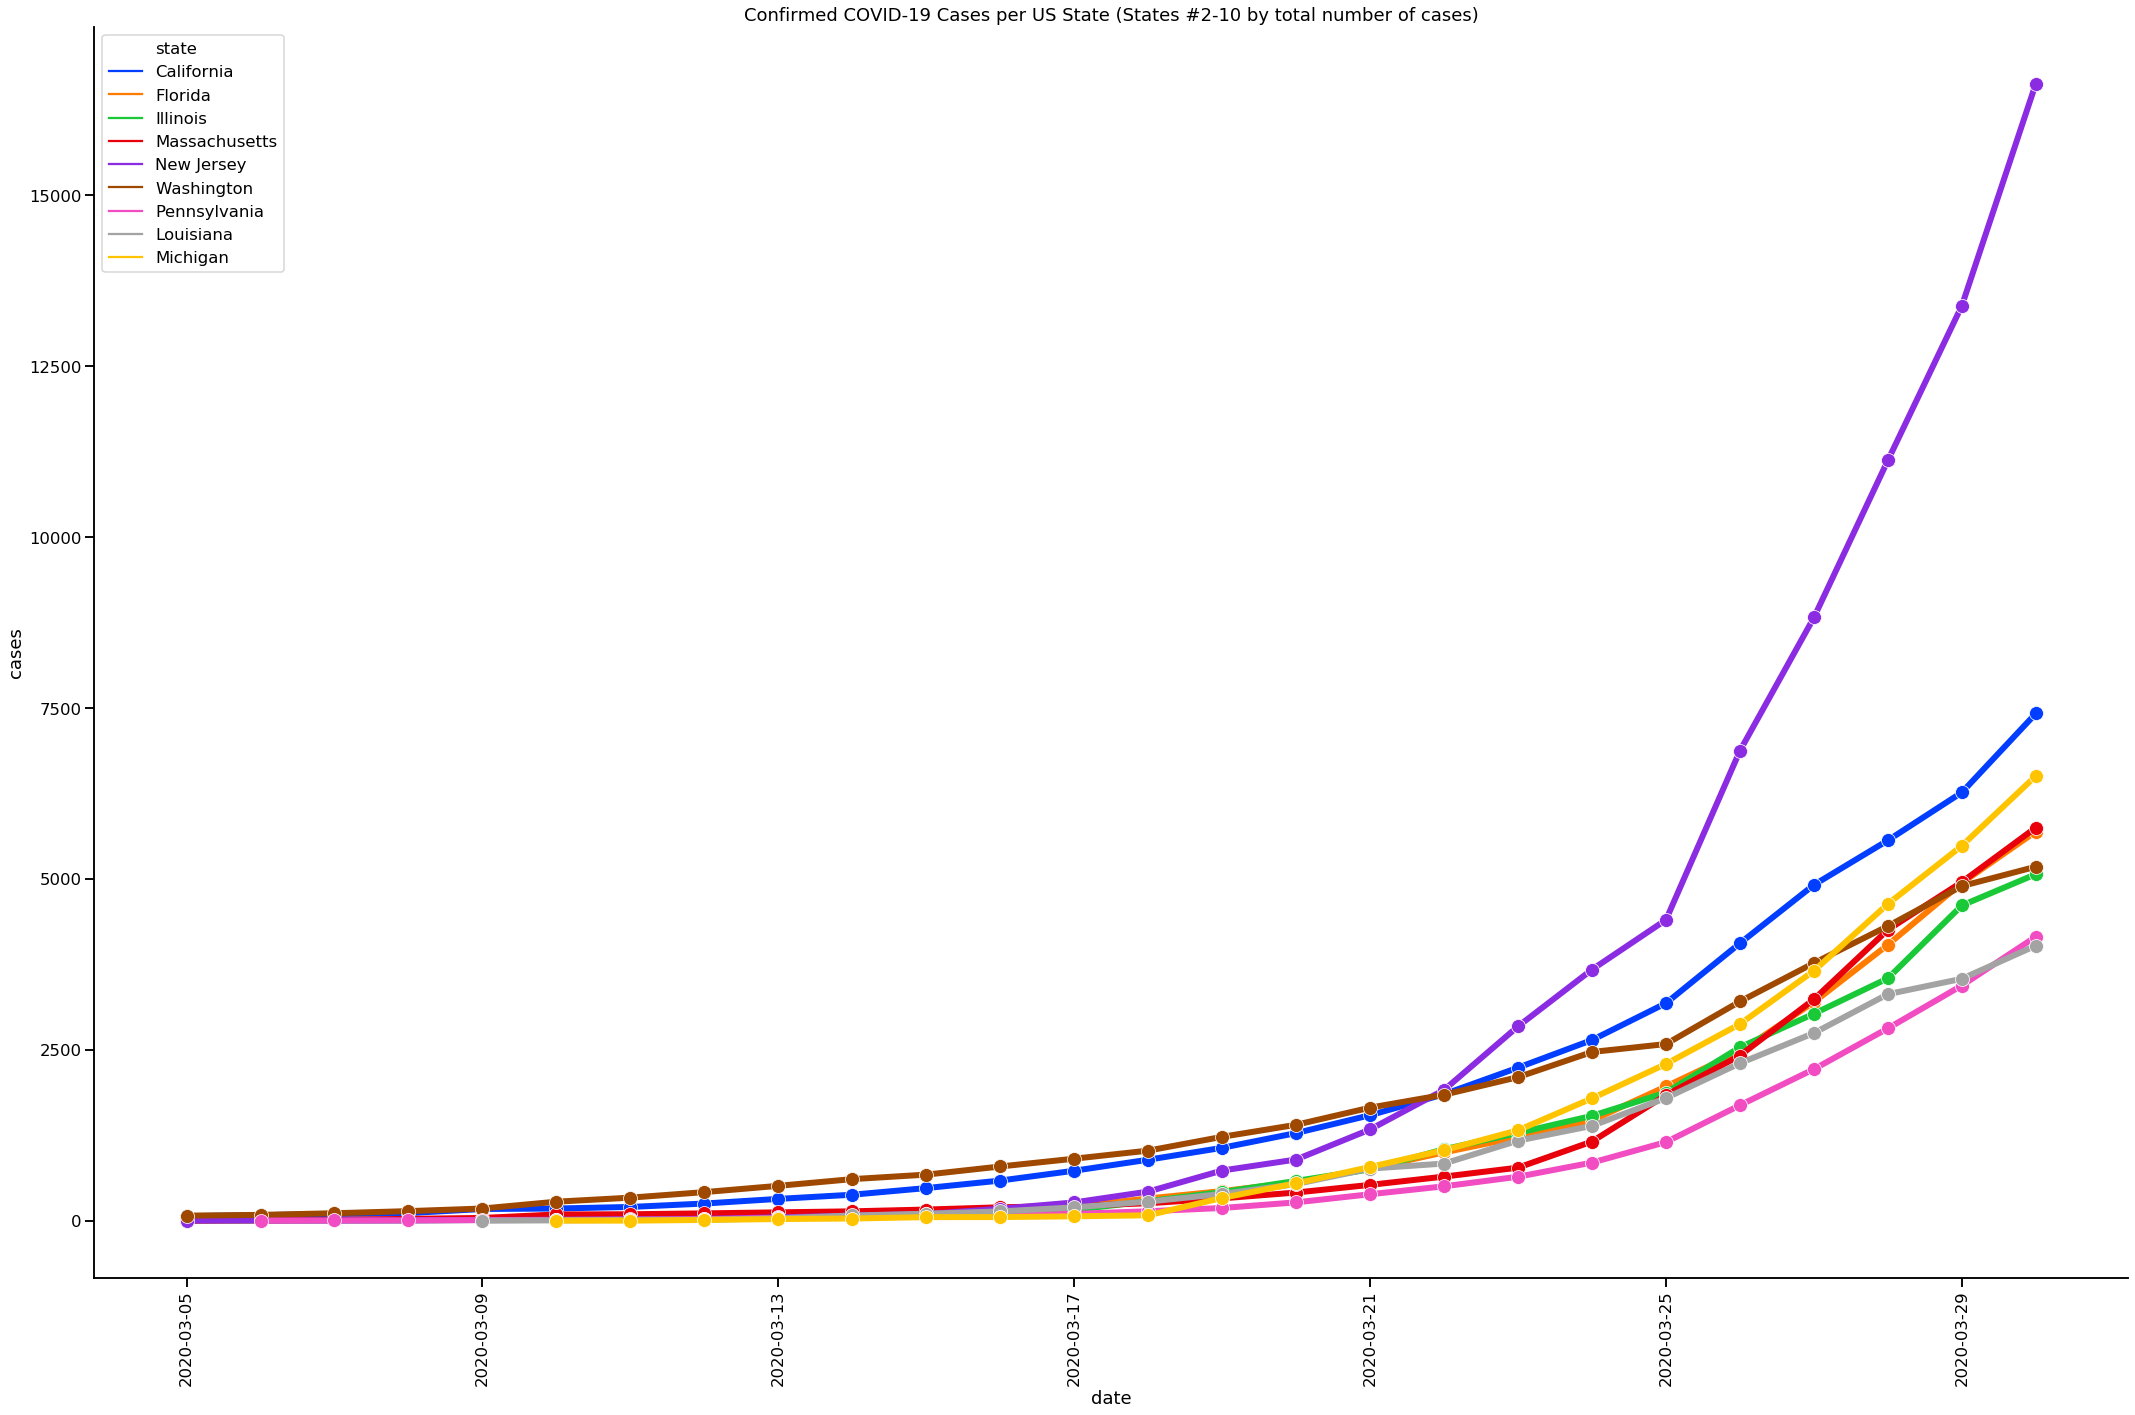

In [61]:
states_to_plot = df_states.loc[df_states['state'].isin(states_2_thru_10)]

plt.figure(figsize=(30,20))
sns.lineplot(x=states_to_plot['date'], y=states_to_plot['cases'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False, palette=SEABORN_PALETTE[:len(states_2_thru_10)])
plt.xticks(rotation=90);
plt.title(f'Confirmed COVID-19 Cases per US State (States #2-10 by total number of cases)')
plt.tight_layout()
sns.despine()
plt.show()

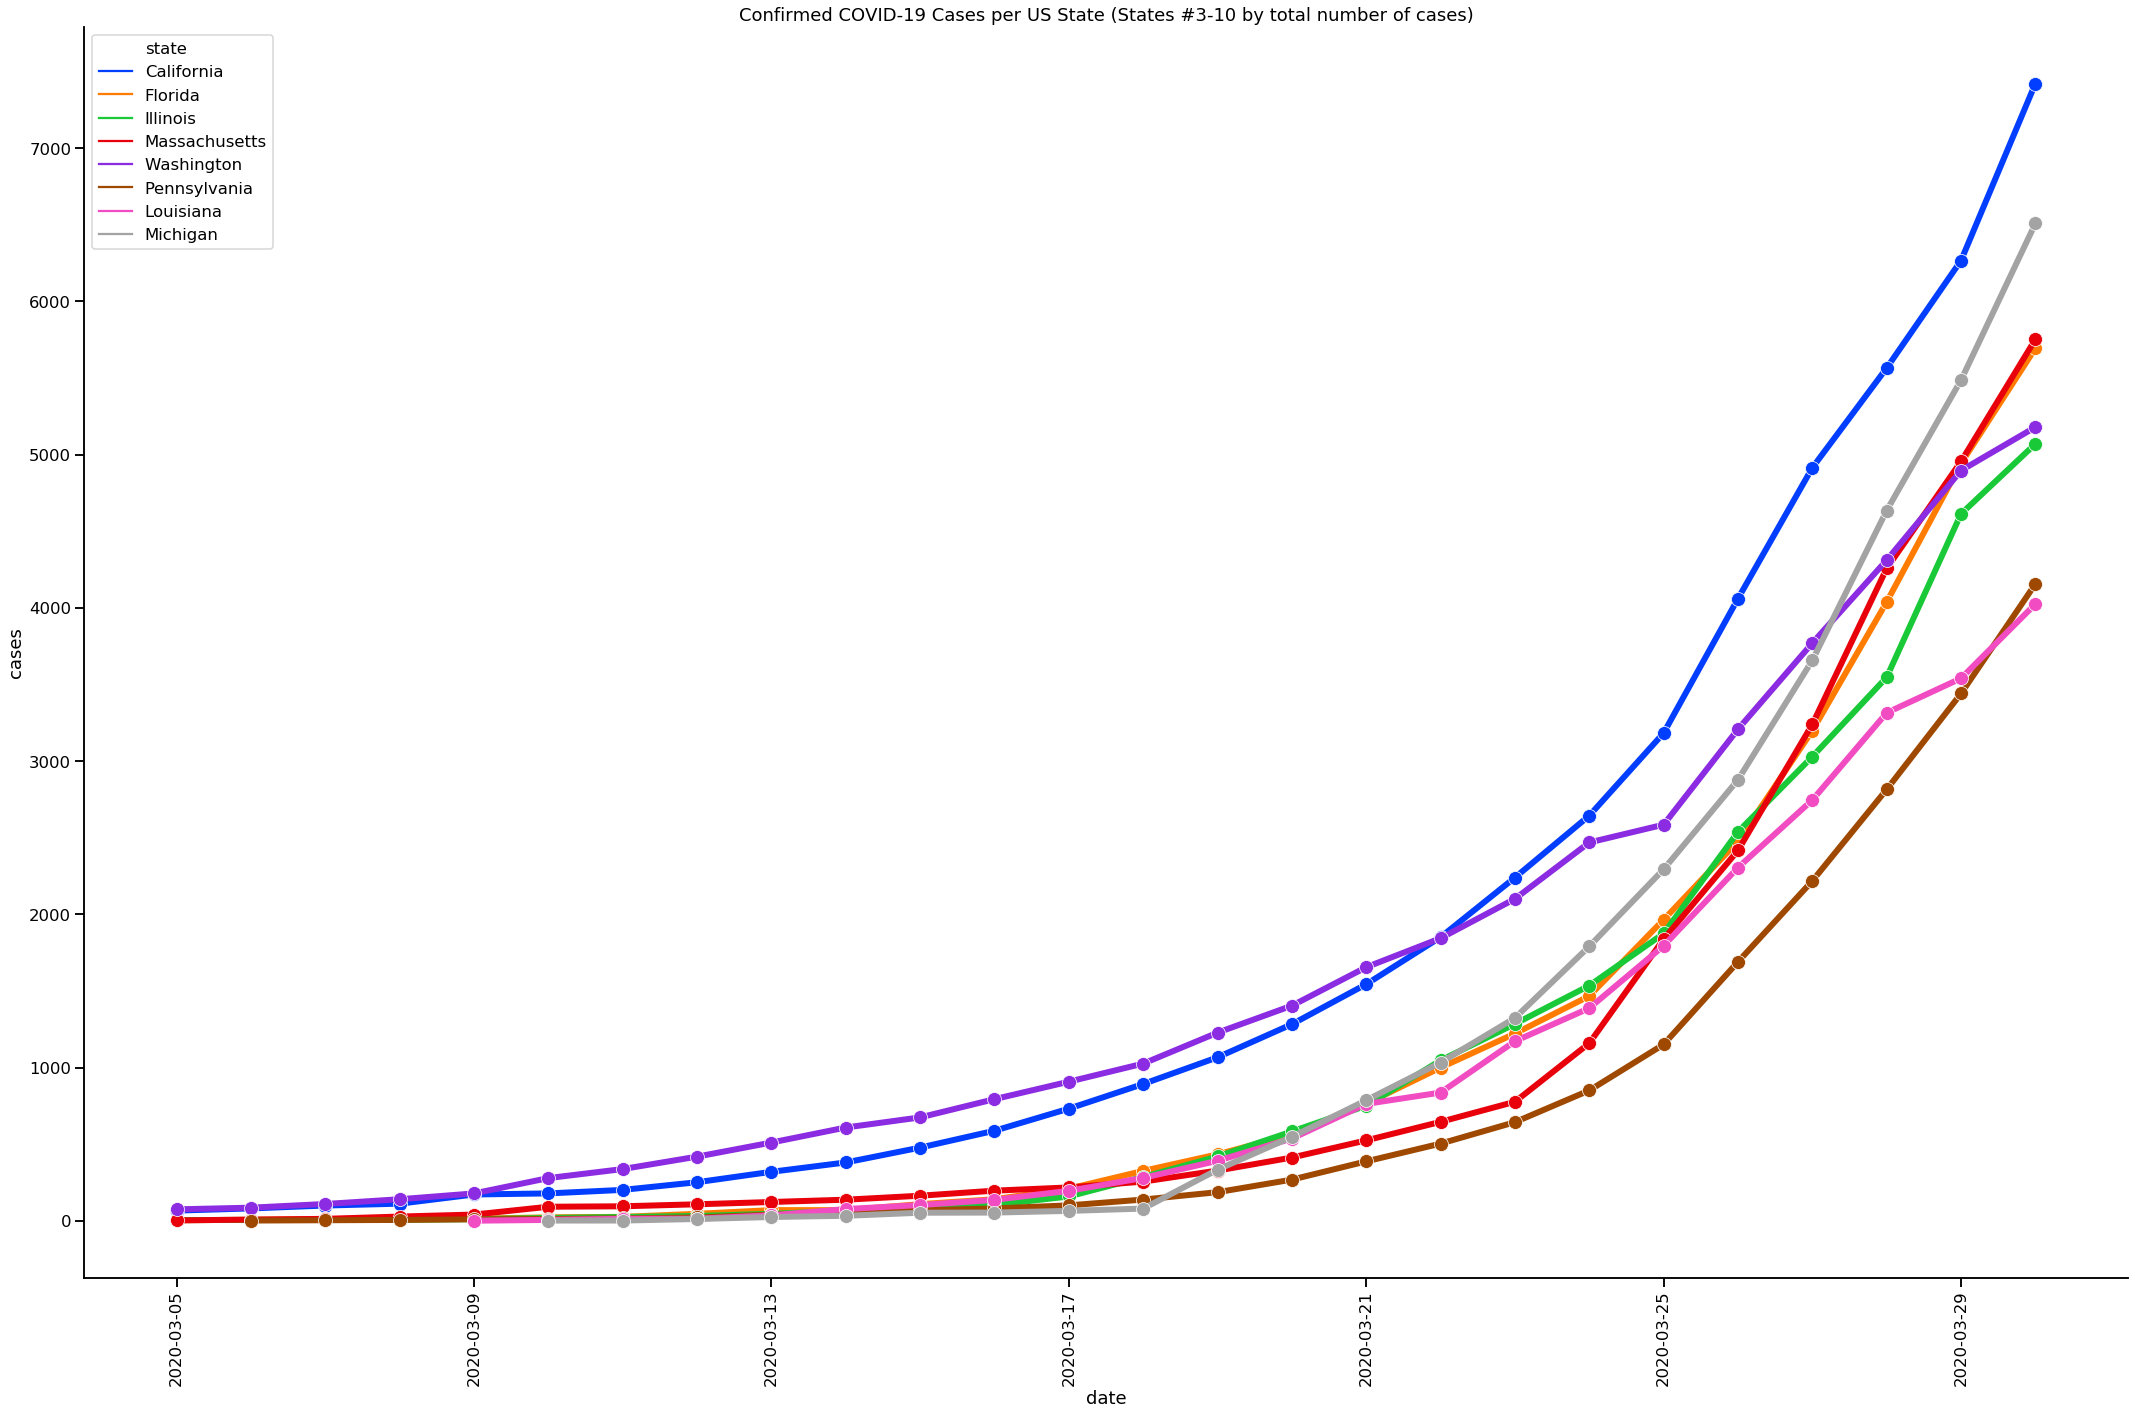

In [62]:
states_to_plot = df_states.loc[df_states['state'].isin(states_3_thru_10)]

plt.figure(figsize=(30,20))
sns.lineplot(x=states_to_plot['date'], y=states_to_plot['cases'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False, palette=SEABORN_PALETTE[:len(states_3_thru_10)])
plt.xticks(rotation=90);
plt.title(f'Confirmed COVID-19 Cases per US State (States #3-10 by total number of cases)')
plt.tight_layout()
sns.despine()
plt.show()

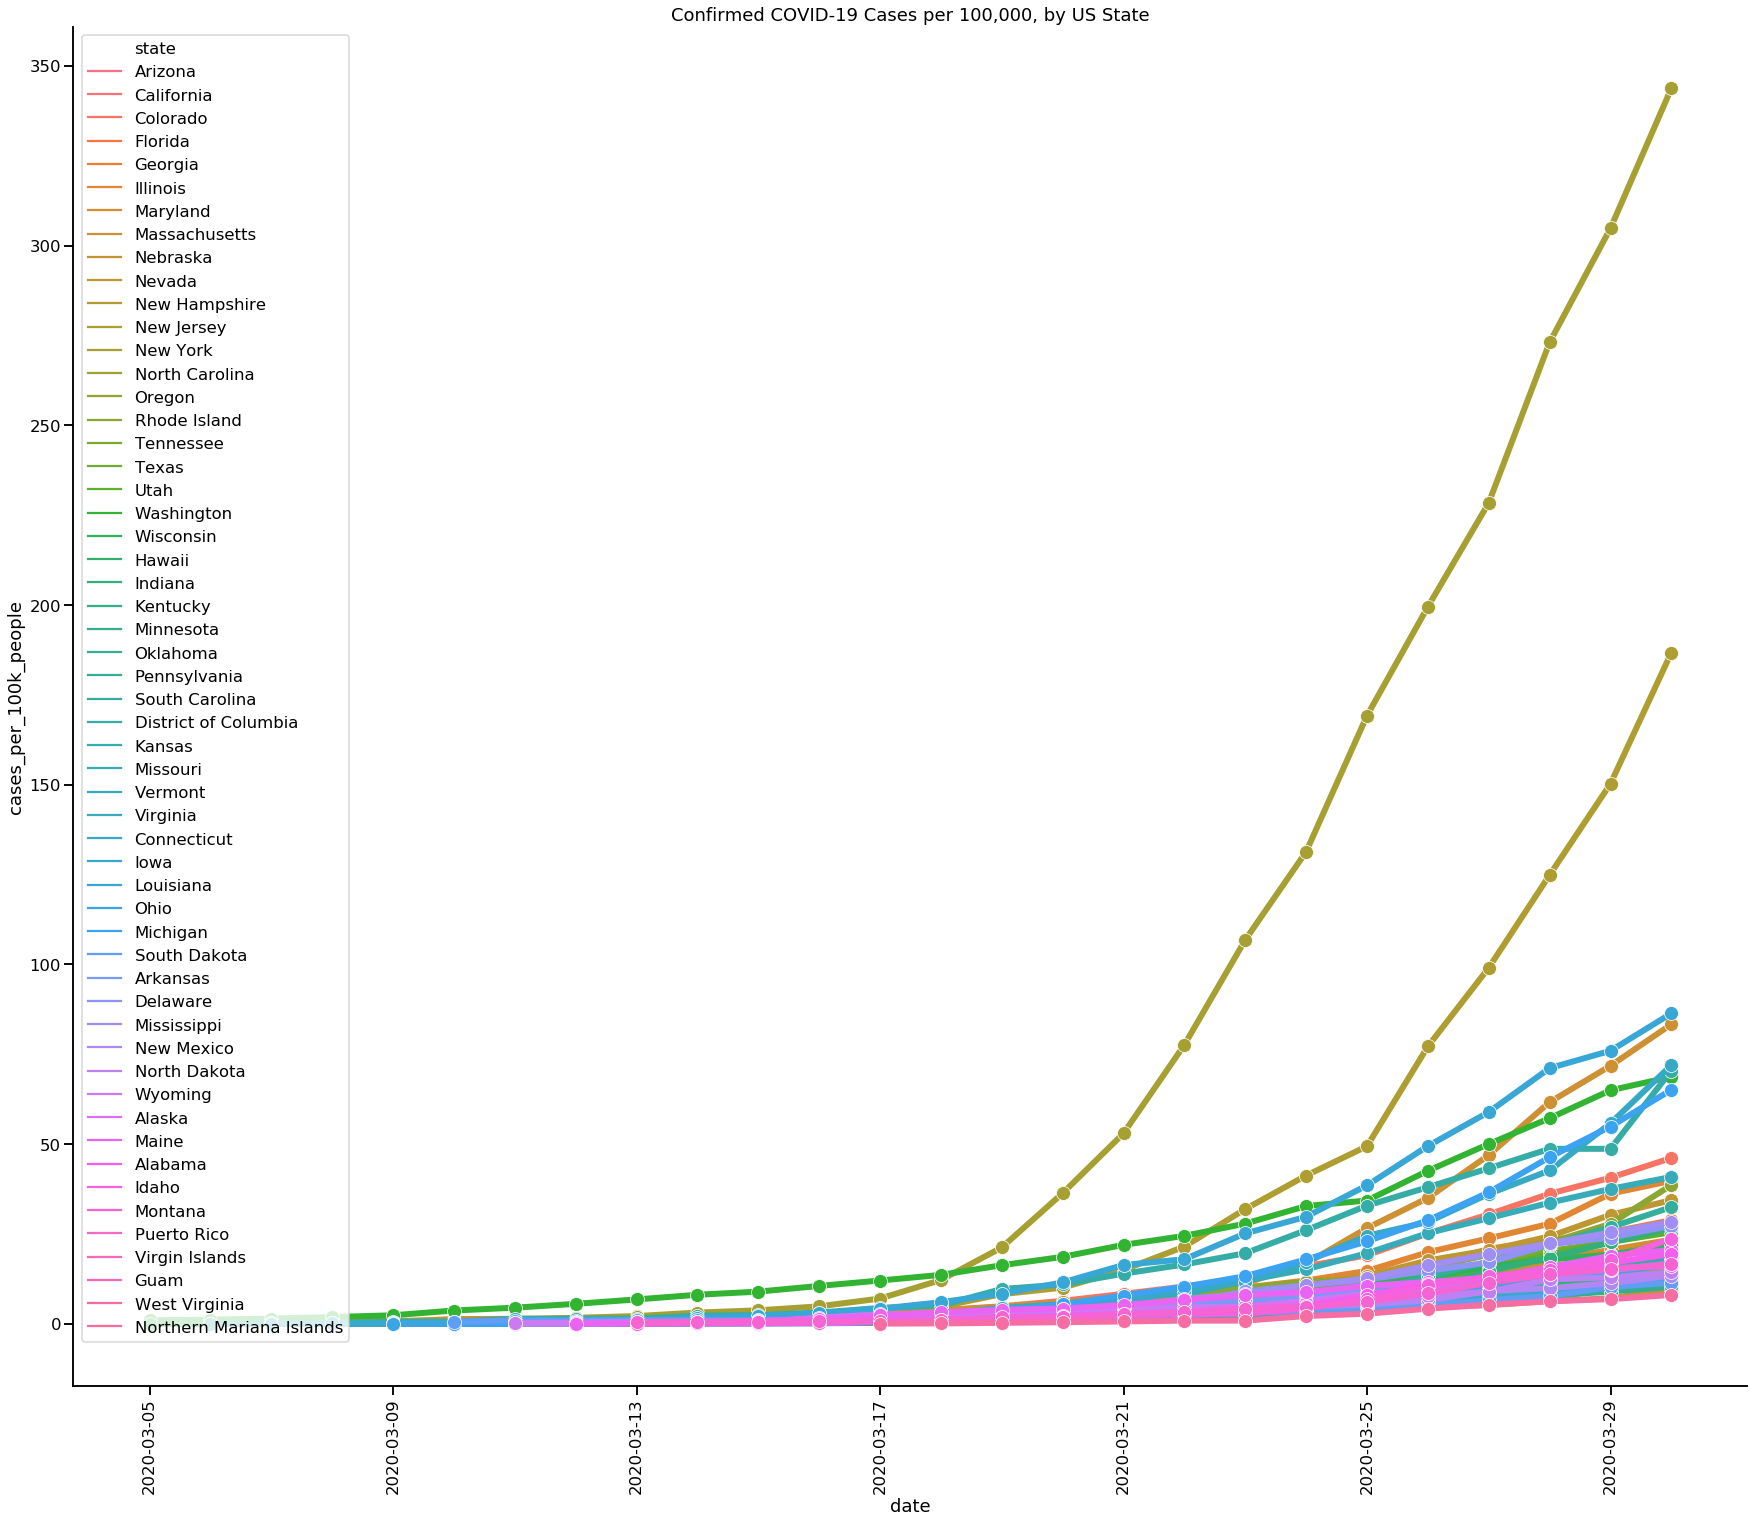

In [67]:
plt.figure(figsize=(30,25))
sns.lineplot(x=df_states['date'], y=df_states['cases_per_100k_people'], hue=df_states['state'], linewidth=6, markersize=14, marker='o', ci=False)
plt.title(f'Confirmed COVID-19 Cases per 100,000, by US State')
plt.xticks(rotation=90);
sns.despine()

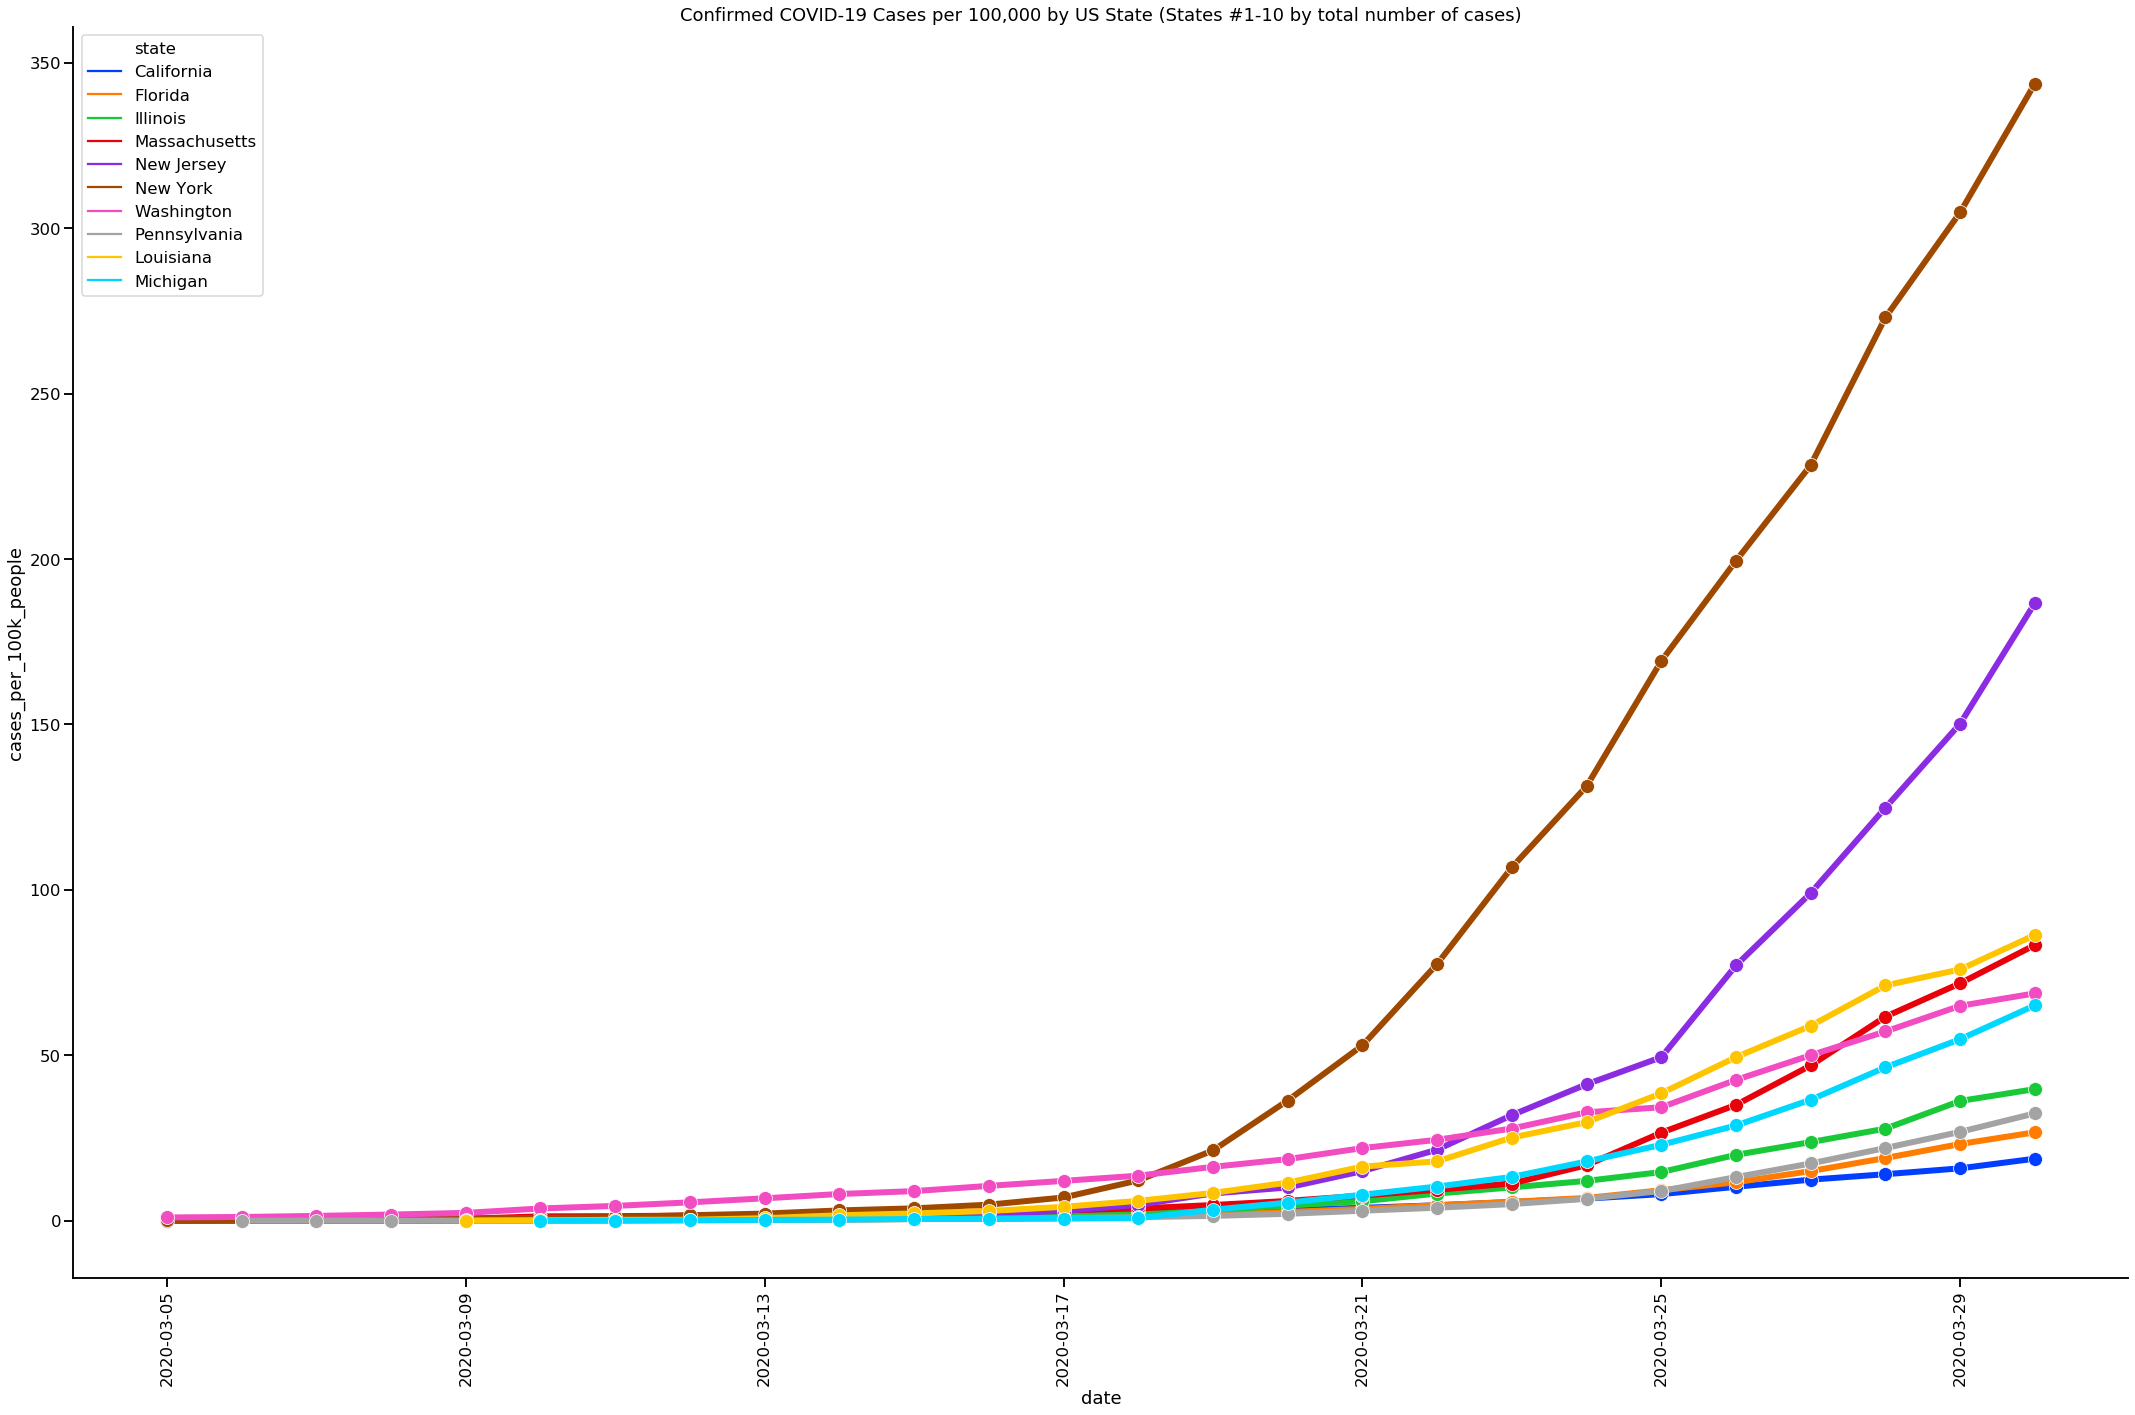

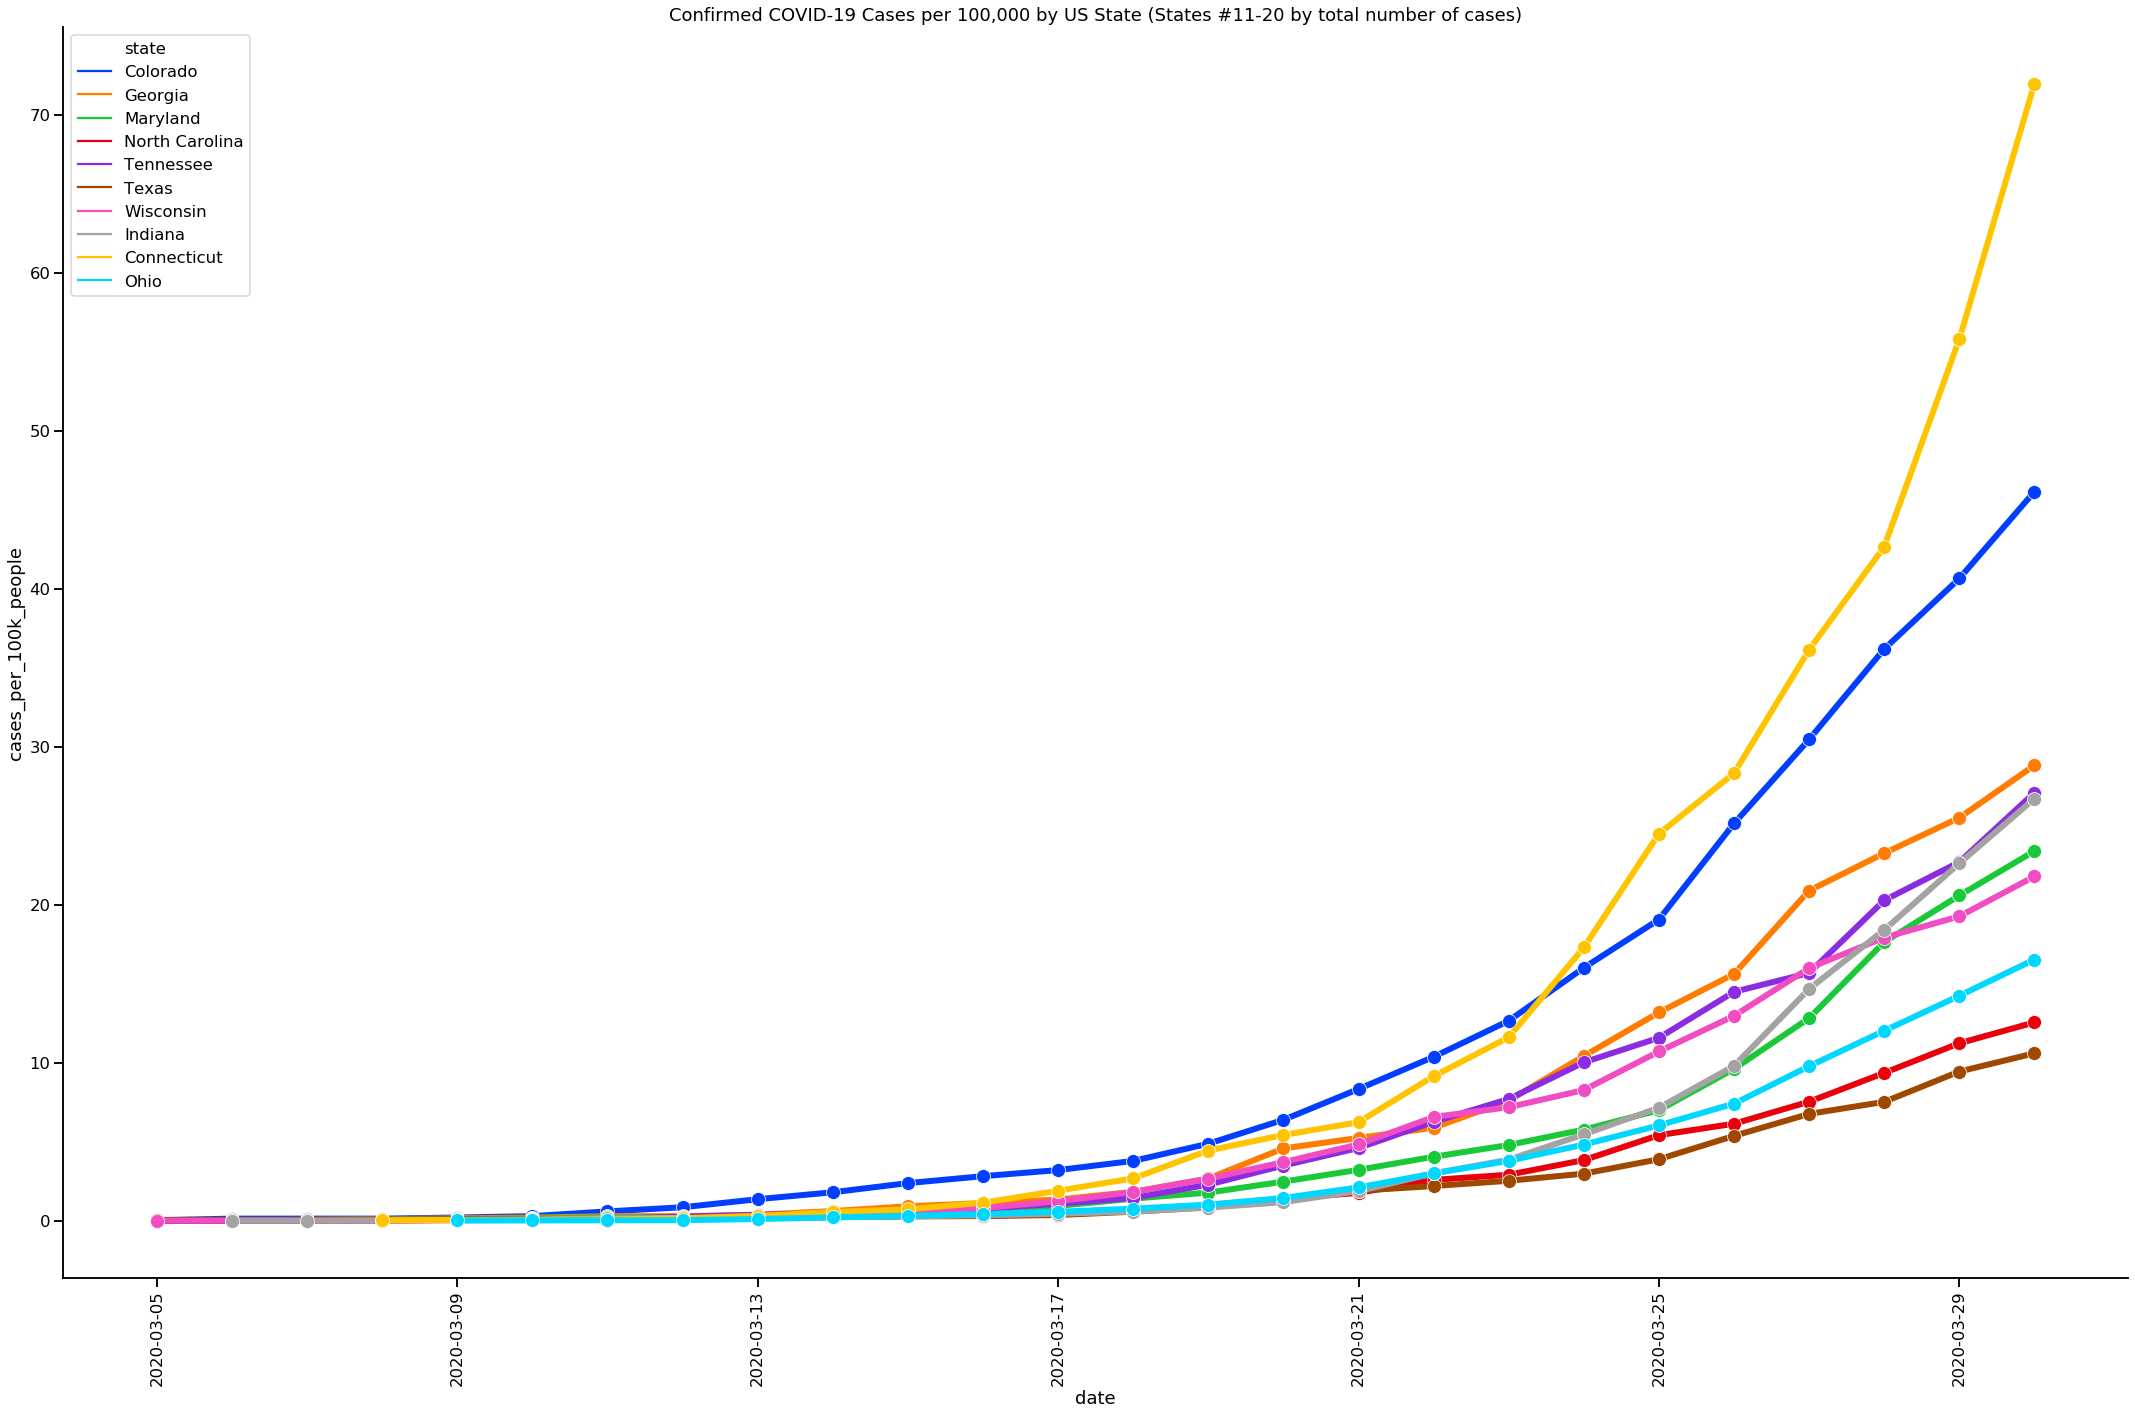

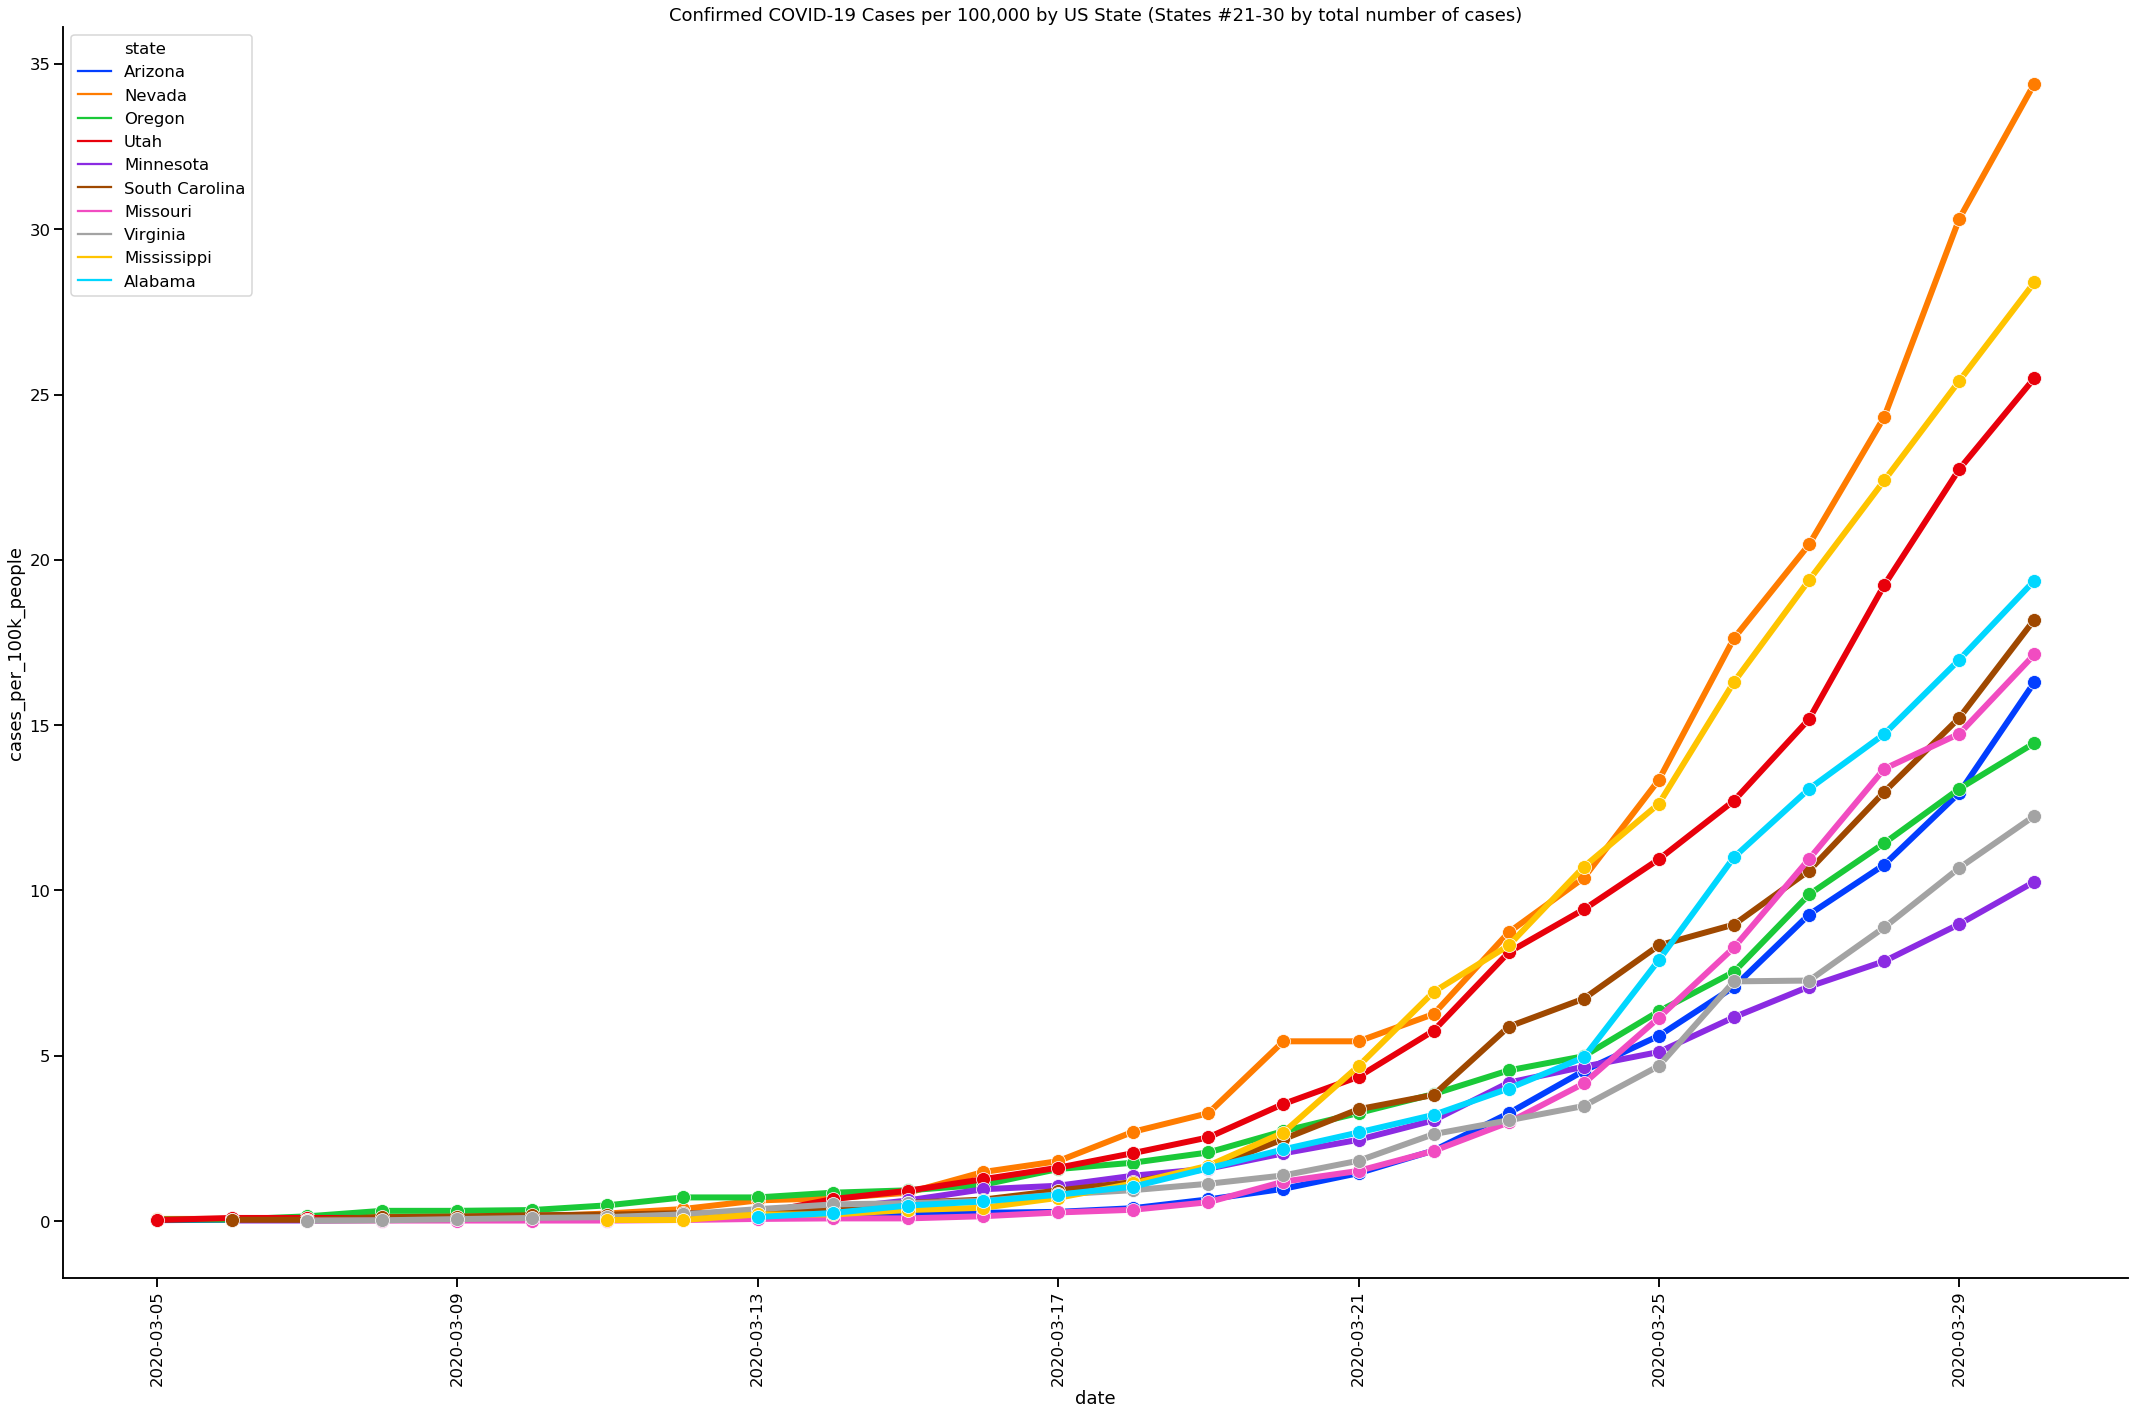

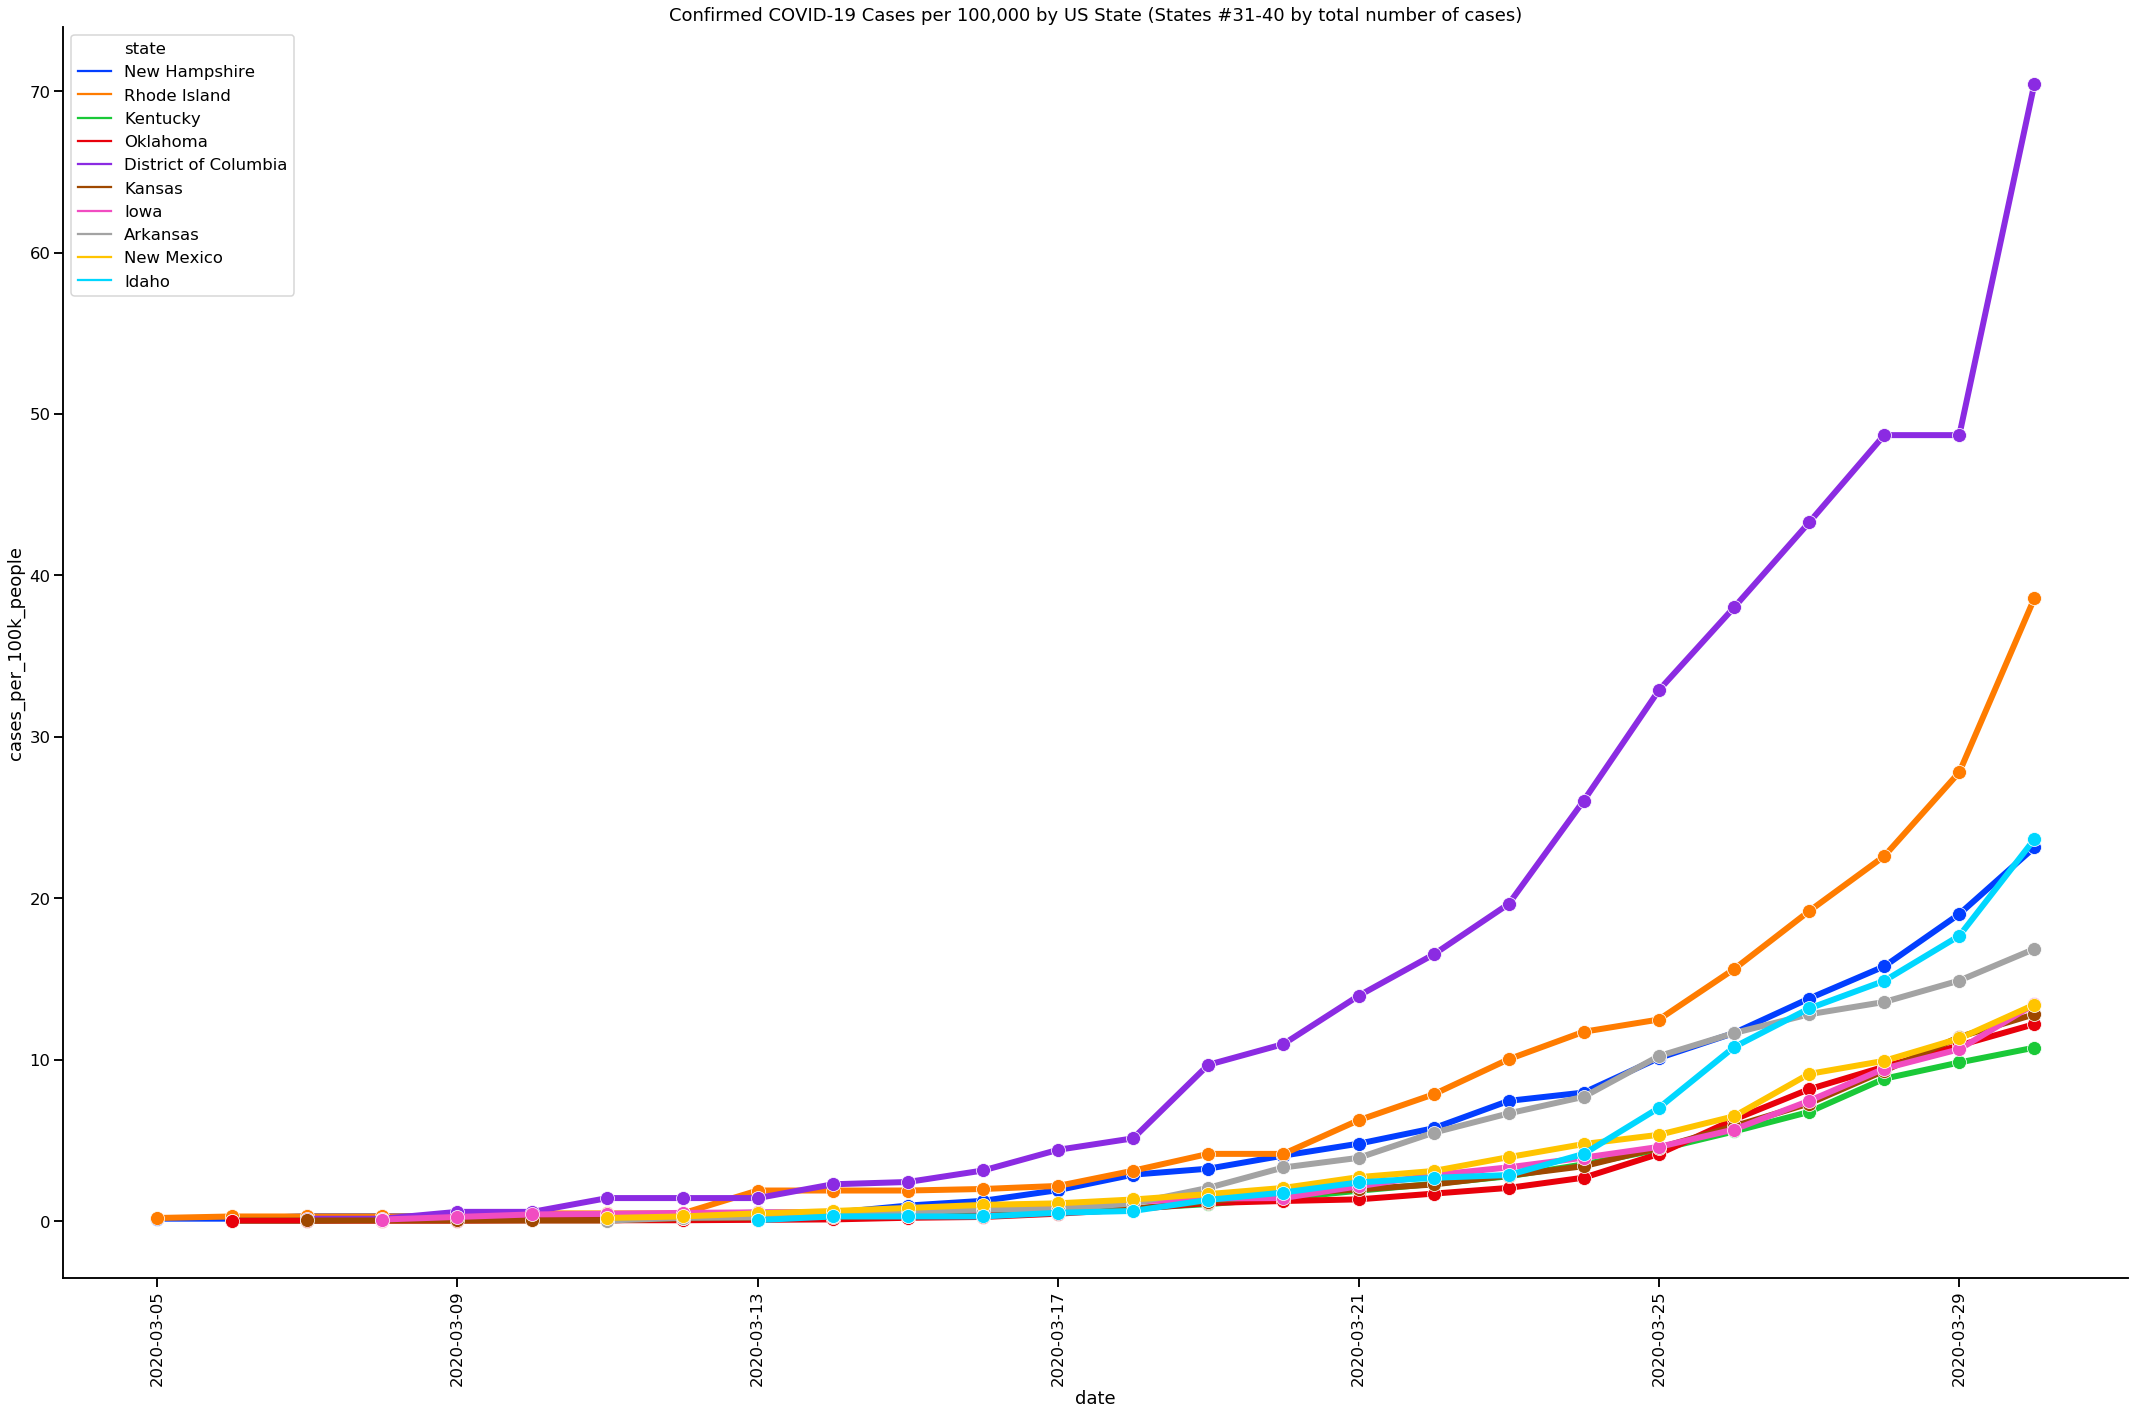

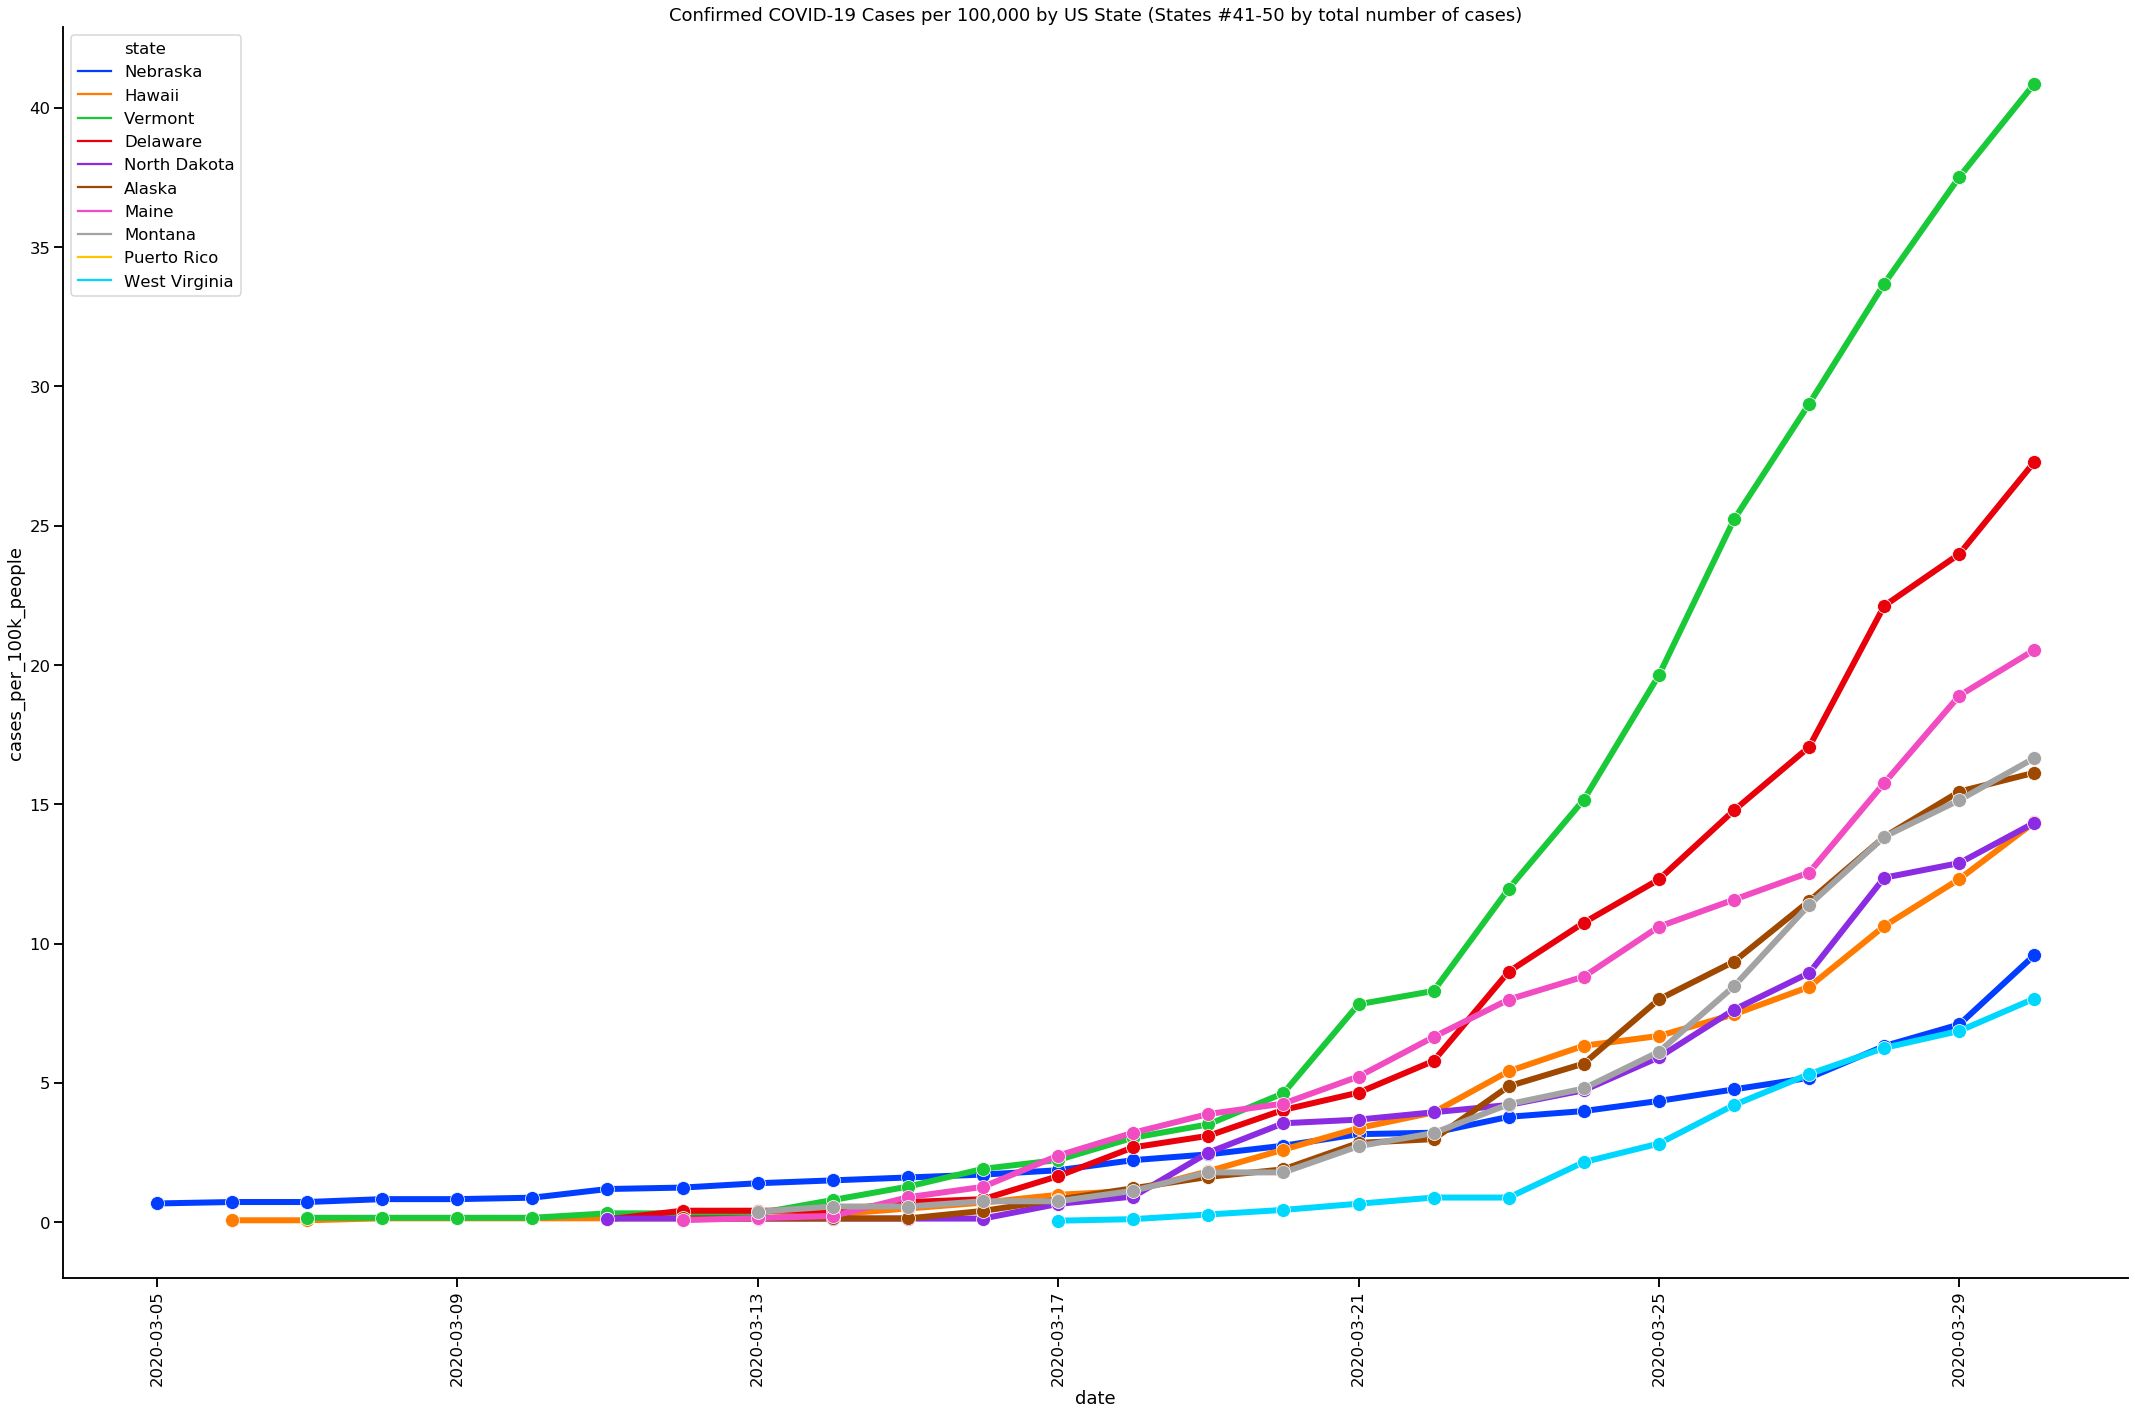

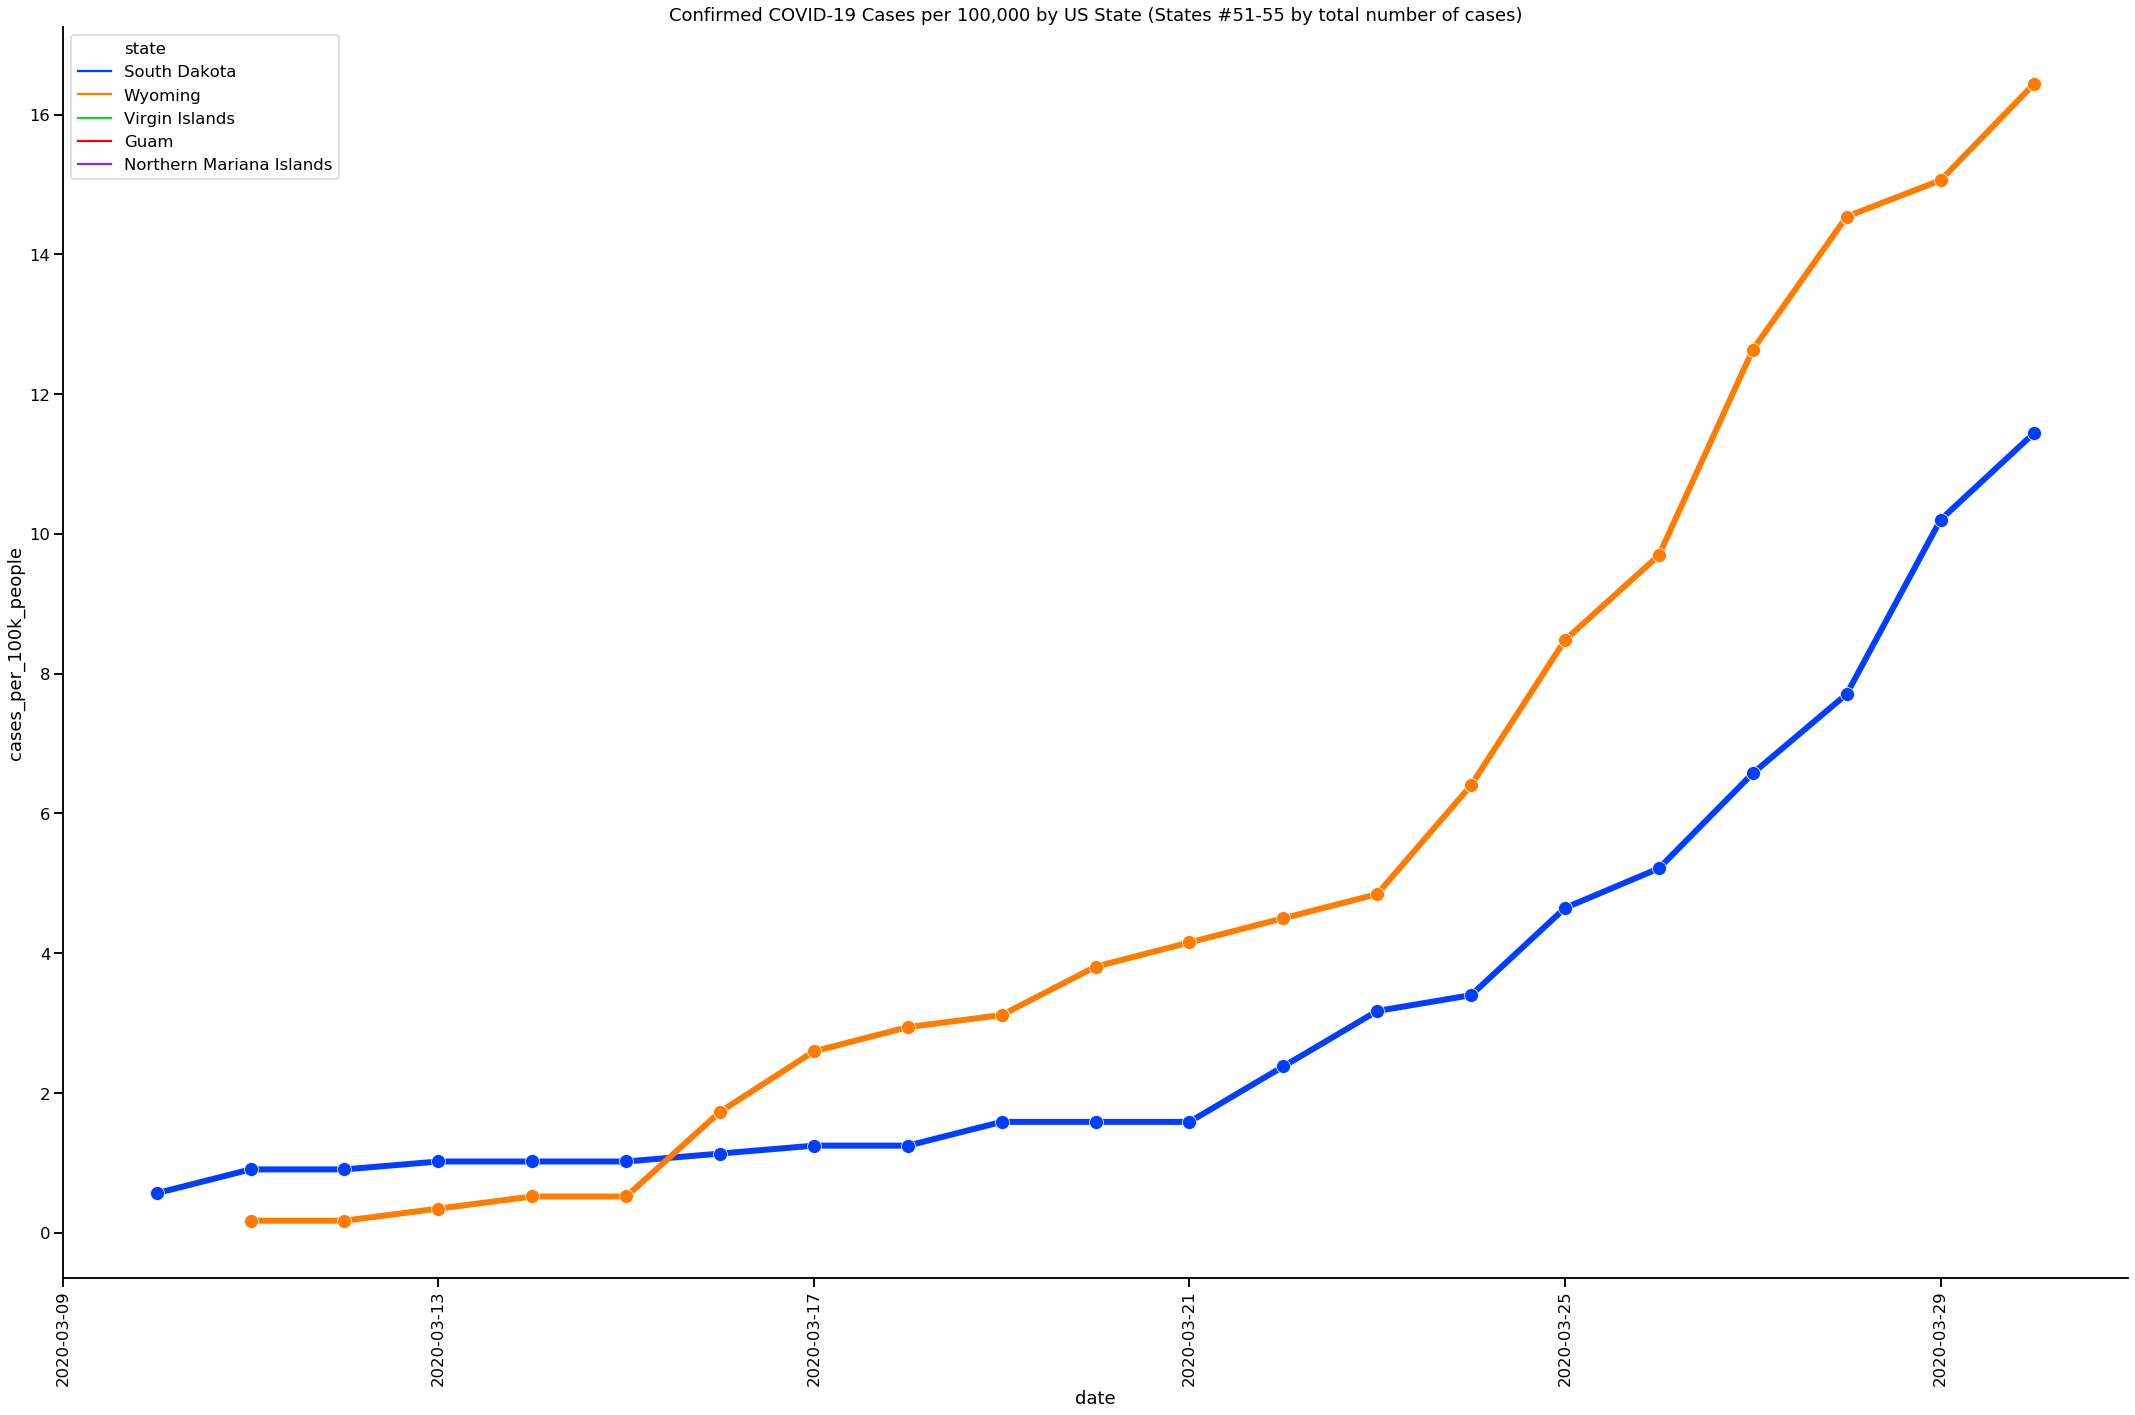

In [64]:
for i, group in enumerate(state_groups):
    states_to_plot = df_states.loc[df_states['state'].isin(group)]
    
    plt.figure(figsize=(30,20))
    sns.lineplot(x=states_to_plot['date'], y=states_to_plot['cases_per_100k_people'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False, palette=SEABORN_PALETTE[:len(group)])
    plt.xticks(rotation=90);
    plt.title(f'Confirmed COVID-19 Cases per 100,000 by US State (States #{i*group_size+1}-{i*group_size+len(group)} by total number of cases)')
    plt.tight_layout()
    sns.despine()
    plt.show()

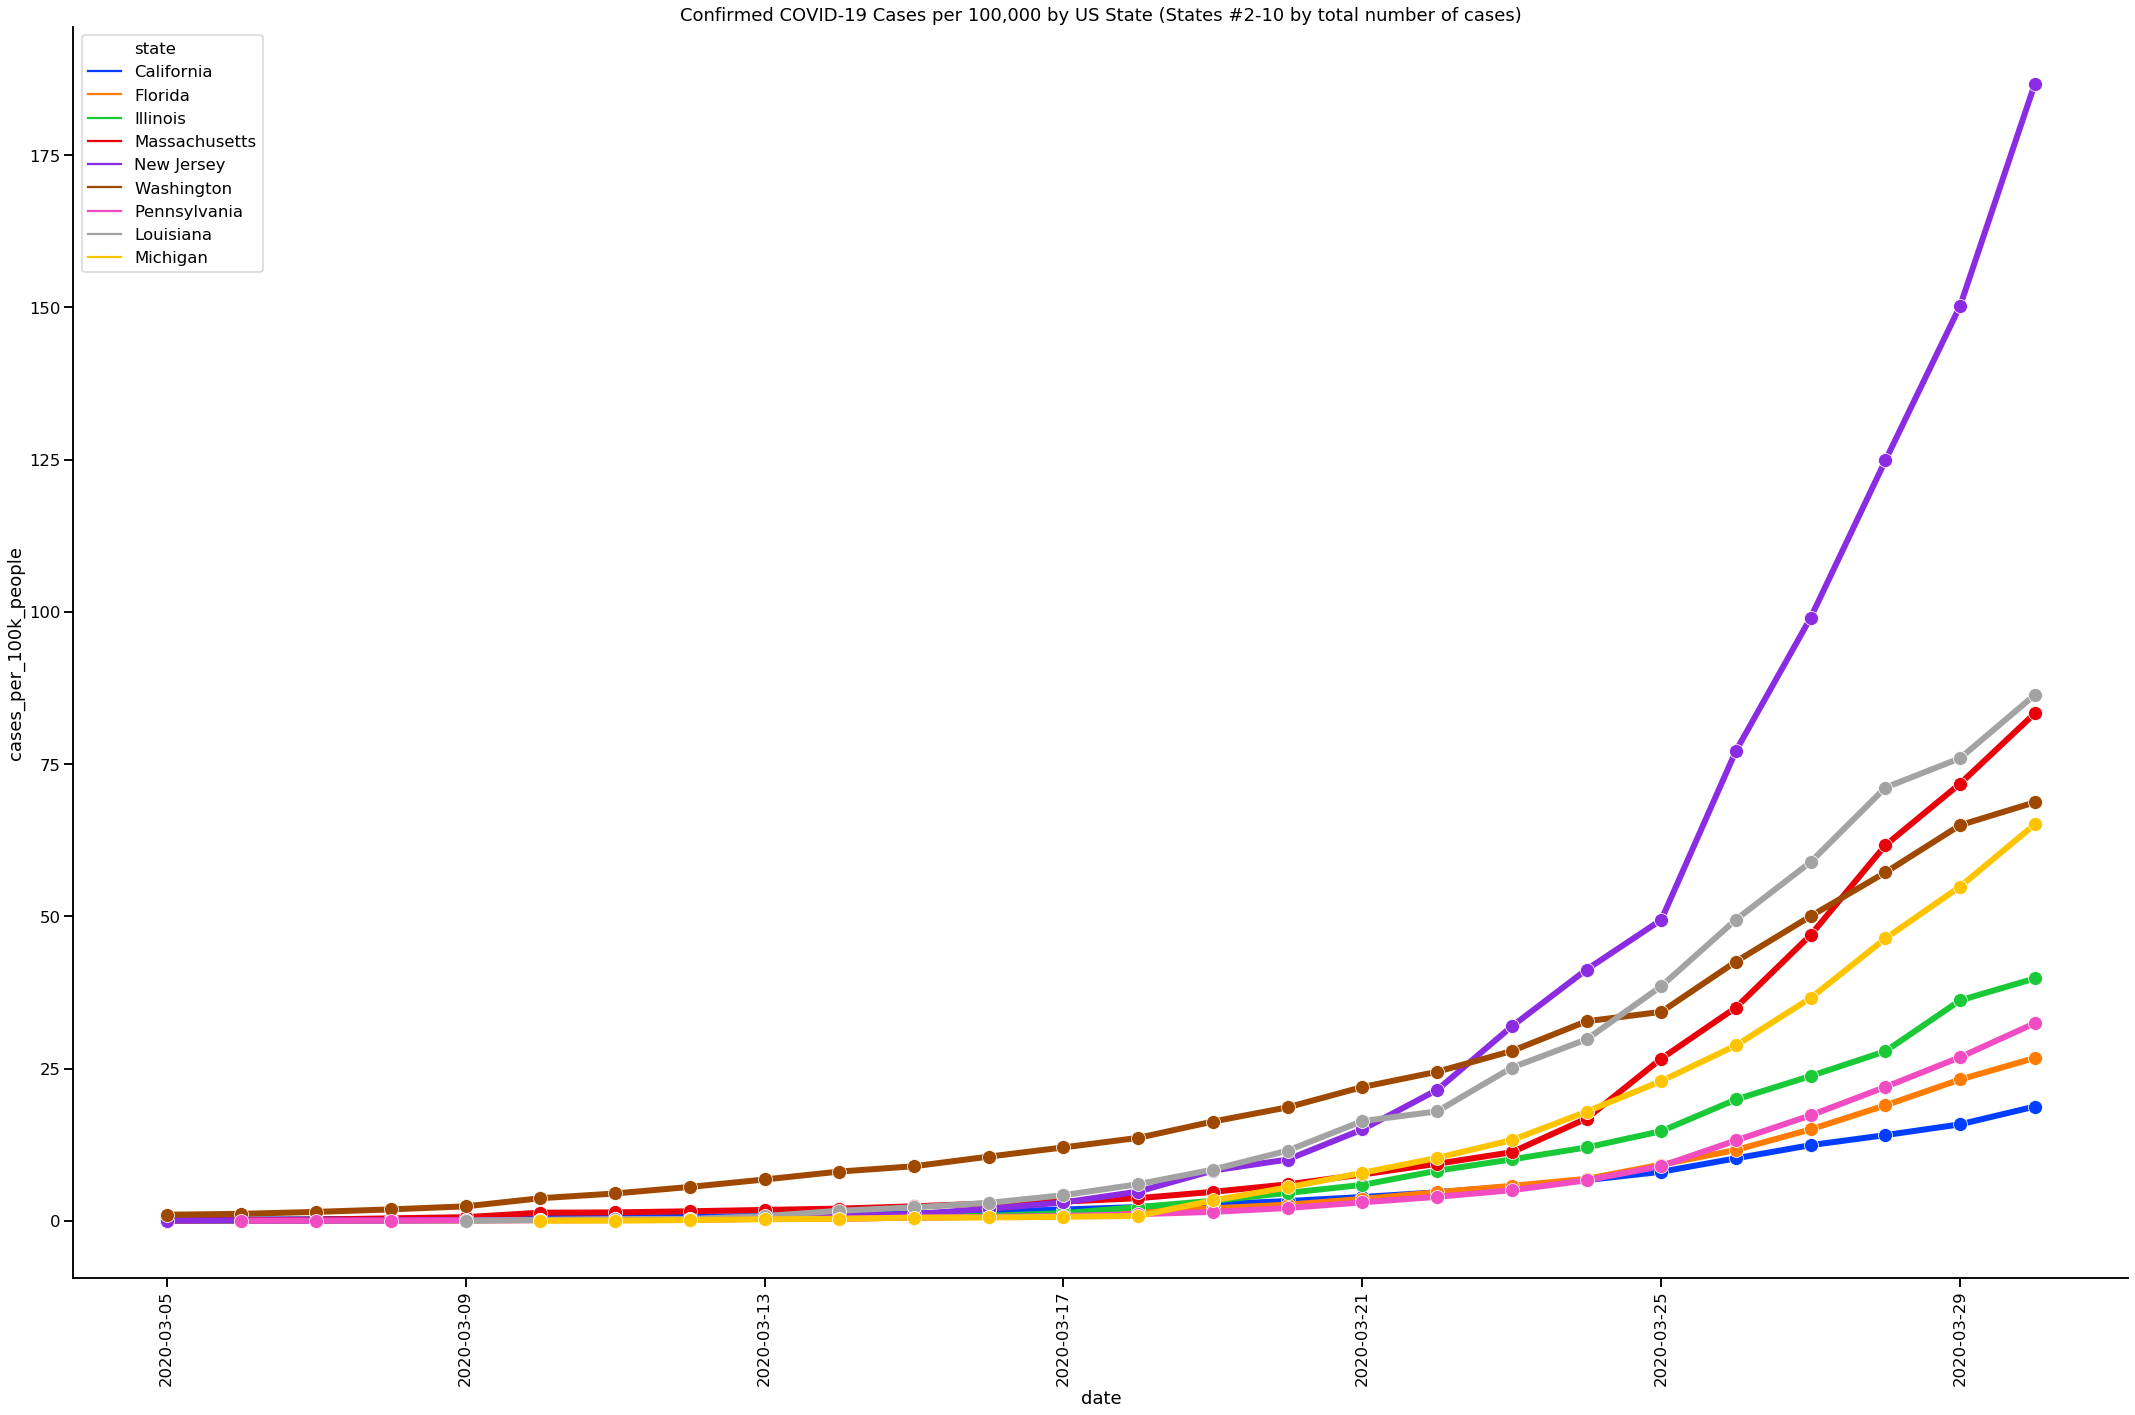

In [65]:
states_to_plot = df_states.loc[df_states['state'].isin(states_2_thru_10)]

plt.figure(figsize=(30,20))
sns.lineplot(x=states_to_plot['date'], y=states_to_plot['cases_per_100k_people'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False, palette=SEABORN_PALETTE[:len(states_2_thru_10)])
plt.xticks(rotation=90);
plt.title(f'Confirmed COVID-19 Cases per 100,000 by US State (States #2-10 by total number of cases)')
plt.tight_layout()
sns.despine()
plt.show()

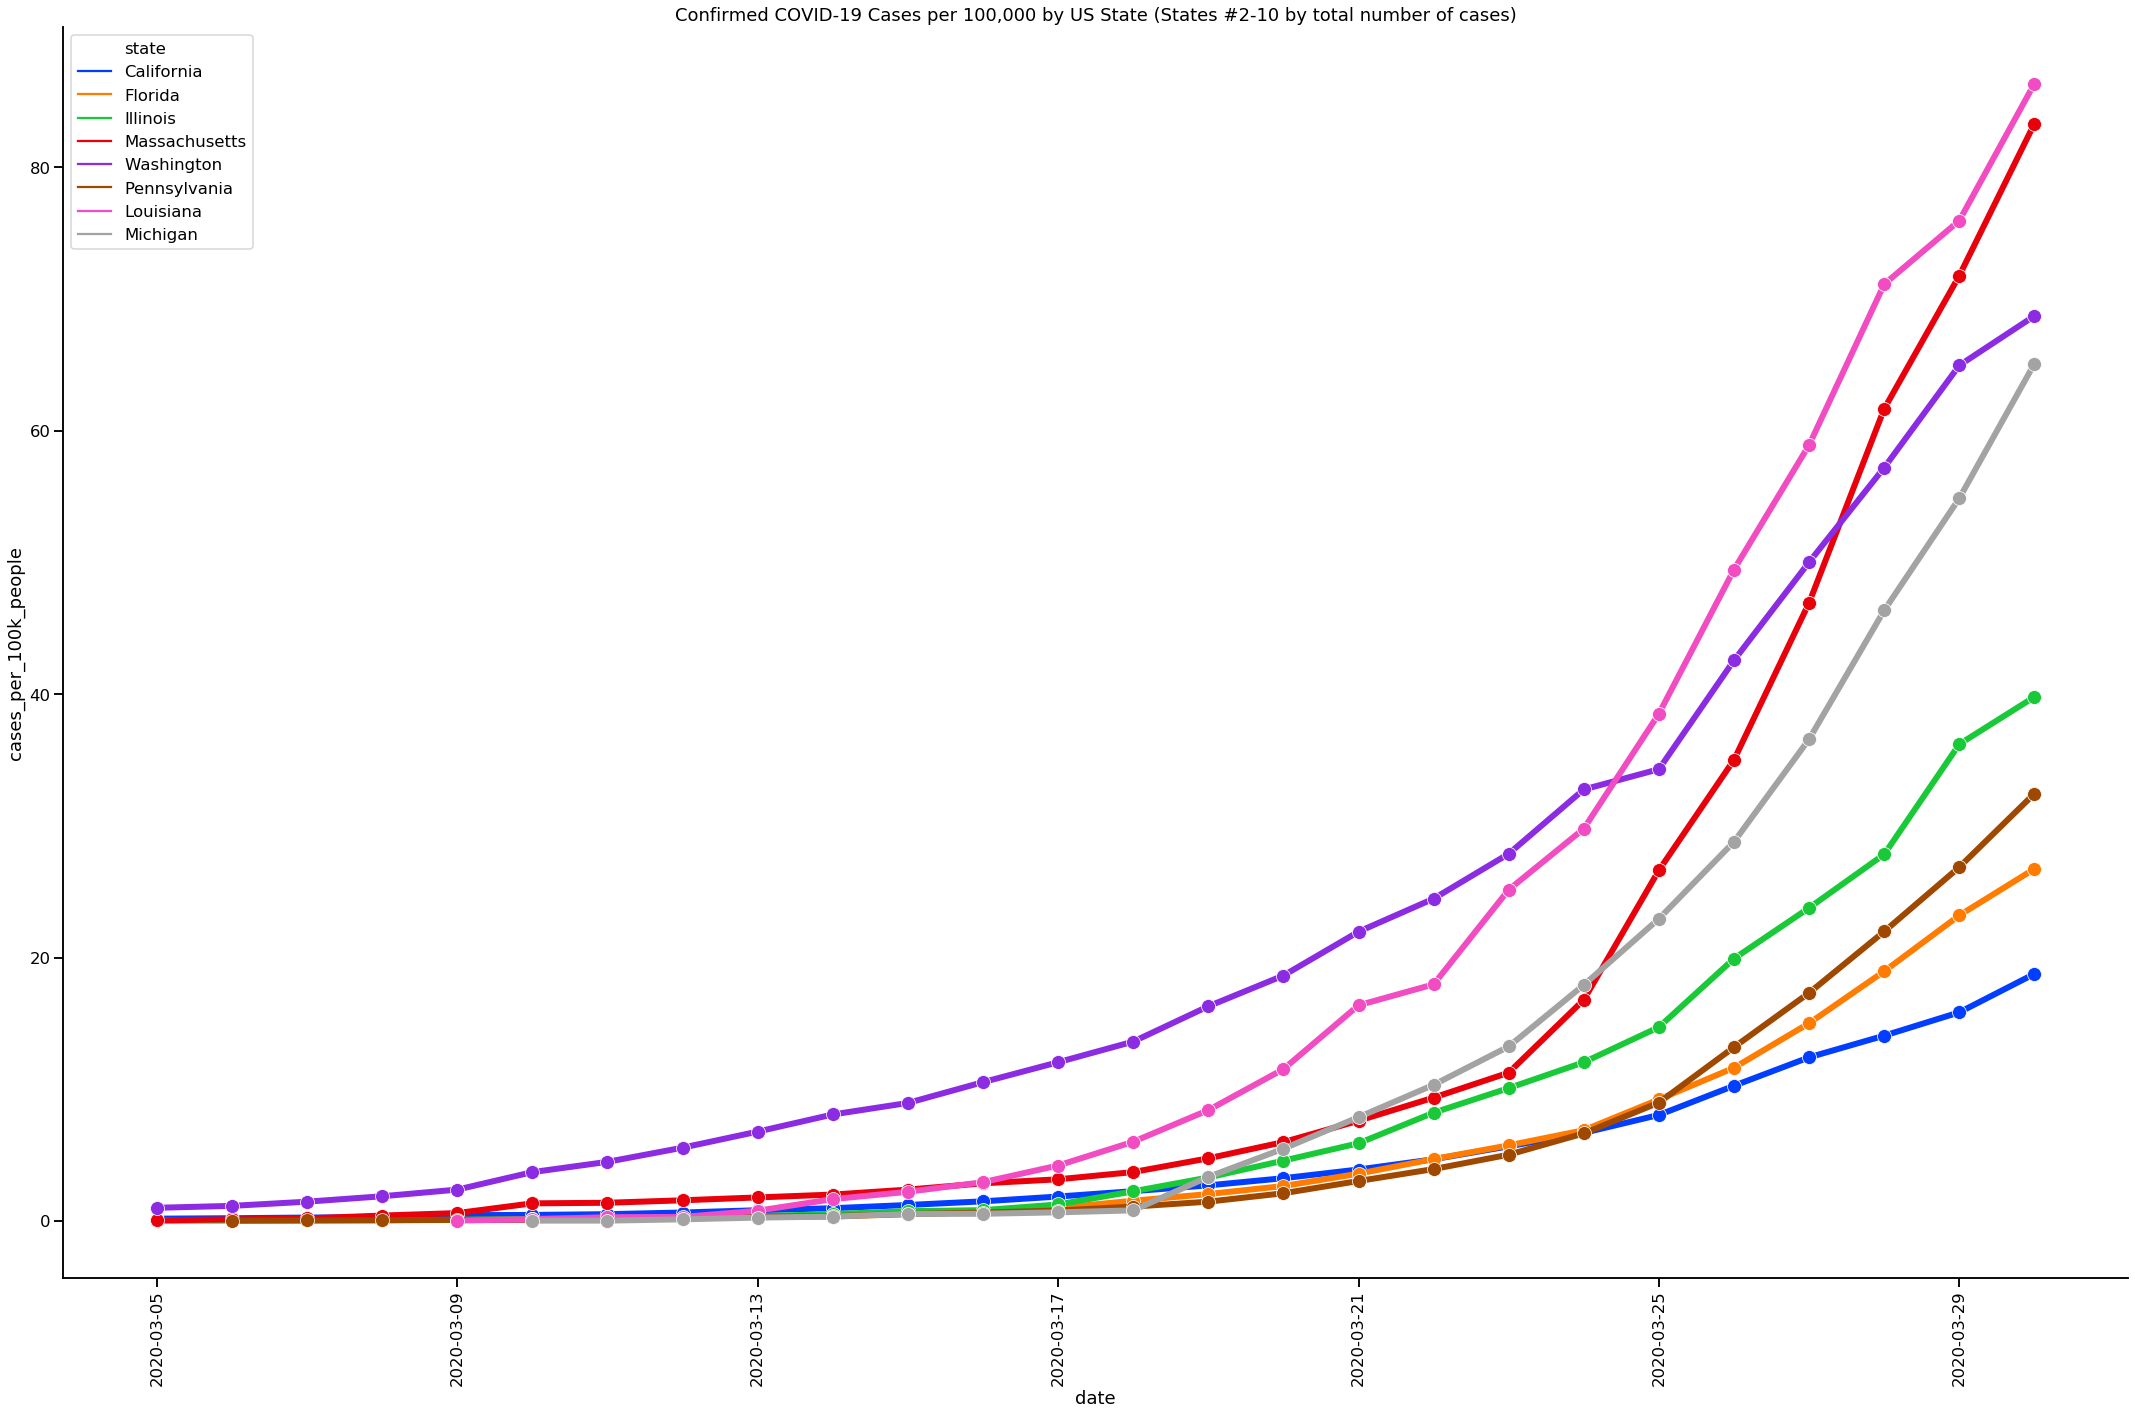

In [66]:
states_to_plot = df_states.loc[df_states['state'].isin(states_3_thru_10)]

plt.figure(figsize=(30,20))
sns.lineplot(x=states_to_plot['date'], y=states_to_plot['cases_per_100k_people'], hue=states_to_plot['state'], linewidth=6, markersize=14, marker='o', ci=False, palette=SEABORN_PALETTE[:len(states_3_thru_10)])
plt.xticks(rotation=90);
plt.title(f'Confirmed COVID-19 Cases per 100,000 by US State (States #2-10 by total number of cases)')
plt.tight_layout()
sns.despine()
plt.show()